# **United States Quarterly Nominal Gross Domestic Product (GDP) Growth Prediction**

Nominal GDP (NGDP) growth is a key economic indicator widely used by academics, investors, and policymakers. It plays a crucial role in shaping economic policies, guiding business and investment strategies, influencing inflation and wage trends, impacting financial markets, and ensuring debt and currency stability. Given its significance, accurate and timely forecasting of NGDP growth is essential for informed decision-making. 

In this report, we assess the predictive power of accounting information in US quarterly GDP growth forecasting and evaluate its robustness in the face of economic disruptions, such as the unprecedented volatility of the COVID-19 pandemic. . Our model is trained on data from 1990 to 2015 and tested on the 2016–2020 period, which includes a significant GDP shock —most notably the sharp decline and rebound in 2020— that the model has not encountered during training. This approach evaluates how well our models (with a focus on accounting variables) can predict outcomes under conditions they have never seen before, offering valuable insights into their real-world applicability, unpredictable scenarios. 

We assume predictions are made in the second month after the target quarter, just before the Bureau of Economic Analysis (BEA) releases its final GDP estimate in the third month.[BEA,202x]. This timing ensures that the most relevant data is available while allowing for timely forecasts that provide valuable insights into proactive decision-making. 

Model performance is evaluated using Root Mean Squared Error (RMSE), which calculates the square root of the average squared differences between predicted and actual values. RMSE is particularly useful in our context as it is more sensitive to large errors, making it well-suited for capturing the impact of rare economic shocks [Hyndman & Koehler, 2006].  

To develop our forecasts, we consider three sets of independent variables: (i) **SPF & BEA estimates** – expert forecasts and preliminary government estimates. (ii) **Macroeconomic variables** – broad economic indicators that influence GDP. (iii) **Accounting variables** – financial statement data that may offer predictive insights into GDP trends. These feature sets are inspired by Datar et al. (2020) [Datar et al., 2020] which aims to address the central question: Is accounting information useful for GDP forecasting? 

 

To address the short fat data problem—where the number of variables exceeds the number of observations, leading to overfitting—we employ Lasso, Ridge, and Elastic Net regression models. These techniques are well-suited for high-dimensional data and can interpolate beyond the observed range of the target variable, which is a limitation of tree-based models. Throughout this report, we build on a BEA-based baseline, incrementally test these variable sets, and explore techniques to optimize predictive accuracy, providing a comprehensive analysis of their effectiveness in forecasting GDP growth under varying economic conditions. 

------ **SUMMARY** -------

**Objective:**  
- Predict US quarterly nominal GDP growth **with minimal error.**
- Assess the **usefulness of accounting information** in GDP forecasting and evaluate **its robustness in the face of economic shocks.**

**Definition of Nominal GDP Growth:**  
- The **increase in the total value of goods and services produced** in an economy **at current market prices (without inflation adjustment).**  

**Impact of Nominal GDP Growth**  

It is widely used by **academics, investors, and policymakers** as a **key economic indicator** to:
- **Guides economic policy decisions**  
- **Influences business & investment strategies**  
- **Affects inflation & wage trends**  
- **Impacts stock & financial markets**  
- **Plays a role in debt & currency stability**  

**GDP Components:**  

- **GDP = Consumption (C) + Investment (I) + Government Spending (G) + Net Exports (NX)**  

- **GDP = Trend × Seasonal × Cyclical × Irregular**  
      
**Prediction Timing**

- Predictions are made **in the second month of the following quarter**—prior to the BEA’s final estimate released in the third month.
    - Rationale: This timing leverages most of the available data for the target quarter, ensuring timely yet robust forecasts.

**Value of Our Prediction**

- Releasing forecasts one month in advance equips investors and businesses with critical insights for proactive decision-making.

---

**Machine Learning Problem Setup:**


- **Problem Type:**  Regression

- **Target Variable:**  United States Quarterly Nominal GDP Growth **(NGDP)**, derived from the BEA final estimate.

- **Dataset Split:**

  **Training Set:** 1990–2015 (104 observations)

  **Test Set:** 2016–2020 (20 observations)  

- **Evaluation Metric:** **Root Mean Squared Error (RMSE)**

  → Calculates the square root of the average of the squared differences between predicted and actual values, making it **more sensitive to larger errors.**

- **Models to Consider:**  (*Potential techniques: stacking, blending, weighted ensemble models*)

    1. Elastic Net Regression 
    2. Lasso Regression  
    3. Ridge Regression  
    4. K-Nearest Neighbors (KNN)  
    5. Decision Tree  
    6. Random Forest  
    7. Gradient Boosting (e.g., XGBoost, LightGBM)  
    8. Other advanced models (if needed)  
    
- **Predictor Variables to Consider:**  
    1. Expert and Government Estimates 
    2. Additional Macroeconomic Data 
    3. Accounting Information (e.g., profitability, investment, capital allocation, write-offs)  


- **Project Structure:**  

    1. Import Packages, Target Variables & User-Defined Functions

    2. **Baseline Model** built using **Expert and Government Estimates** as predictors  
    
    3. **Model Version 2** built using **Additional Macroeconomic Variables** as predictors   
    
    4. **Model Version 3** built using **Accounting Variables** as predictors  
    
    5. **Model Enhancement**

--------
--------

Before beginning to build our baseline model, we will set up the project by:

- **importing all necessary packages**
  
- **defining reusable functions**
  
- **preparing target variables**  

this will ensure a smooth workflow throughout the project.

## **1. Import Packages, Target Variables & User Defined Functions**

Import all the **necessary libraries for preprocessing, visualization, modeling, and settings**:

In [1]:
# Import all libraries/packages considered for use

# Preprocessing
import pandas as pd,numpy as np                                                   
from sklearn.preprocessing import StandardScaler
import requests

# Visuals
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
import missingno as msno
import plotly.io as pio
from IPython.core.display import display, HTML
from IPython.display import display
import plotly.graph_objects as go

# Models
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, ExtraTreesRegressor, StackingRegressor, VotingRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV, KFold,TimeSeriesSplit
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.metrics import mean_squared_error, make_scorer,r2_score
from bayes_opt import BayesianOptimization
from sklearn.metrics import mean_squared_error

# Settings
import os
import warnings
import time
warnings.filterwarnings(action="ignore")

pd.set_option('display.max_colwidth', None)  # Set pandas to display the full content in any column without truncation
pd.set_option('display.max_columns', None)   # Ensure all columns are displayed when printing a DataFrame
pd.set_option('display.width', None)         # Set the output width to expand to fit the entire DataFrame without wrapping lines
pd.set_option('display.max_rows', None)      # Display all rows of the DataFrame without truncation
pd.set_option('display.float_format', '{:.6f}'.format) # Format floating-point numbers to display with 6 decimal places

now = time.time()

We will now process the **BEA estimate data** for use in **test set evaluation** and **plotting** throughout the project.  
- *the test set is used for deeper analysis of covid's impact, which is not present in the train set. Note that the test set and metric may differ from what is being actually used in final evaluation, and as a result test RMSE shown here may be slightly different from final test RMSE*

The following steps have been completed:  
1. **Downloaded** the Excel file containing BEA's **first, second, and third GDP estimates** using the provided URL.  
2. **Saved** the file to the local directory and **loaded** it into the workspace.  
3. **Renamed** the `"Most_Recent"` column to `"NGDP"` for consistency.  
4. **Created** a `"YQ"` column for plotting (to match the format of other datasets) and **split** it into `"YEAR"` and `"QUARTER"`.  
5. **Retained** the original dataset (`file2`) for later use and **copied** it to a new variable (`filtered_gdpchg`) for test set evaluation and plotting.  
6. **Filtered** `filtered_gdpchg` to include only data from **2016 to 2020** and **removed unnecessary columns**, keeping only the relevant ones.

In [2]:
# Downloaded the Excel file containing BEA's first, second, and third GDP estimates using the provided URL.
# Saved the file to the local directory and loaded it into the workspace.

url = "https://www.philadelphiafed.org/-/media/FRBP/Assets/Surveys-And-Data/real-time-data/data-files/xlsx/noutput_first_second_third.xlsx"
file_path = "/kaggle/working/noutput_first_second_third.xlsx"

response = requests.get(url)

with open(file_path, "wb") as file:
    file.write(response.content)

file2 = pd.read_excel(file_path, sheet_name="DATA", skiprows=4)
display(file2.head())


,Date,First,Second,Third,Most_Recent
0,1965:Q3,6.773100,7.152200,7.152200,10.880600
1,1965:Q4,7.913500,9.538300,9.538300,12.621500
2,1966:Q1,10.054200,9.931000,9.931000,12.915400
3,1966:Q2,6.125900,6.300000,6.300000,4.757700
4,1966:Q3,7.695900,6.889700,6.889700,7.454400


In [3]:
# Renamed the "Most_Recent" column to "NGDP" for consistency.
# Created a "YQ" column for plotting (to match the format of other datasets) and split it into "YEAR" and "QUARTER".

file2.columns = file2.columns[:-1].tolist() +["NGDP"]

file2['YEAR'] = file2['Date'].str[:4]
file2['QUARTER'] = file2['Date'].str[-1:]
file2["YQ"] = file2['YEAR'].astype(str) + "Q" + file2['QUARTER'].astype(str)
file2["YEAR"] = pd.to_datetime(file2["YQ"]).dt.year
file2["QUARTER"] = pd.to_datetime(file2["YQ"]).dt.quarter
display(file2.head())

,Date,First,Second,Third,NGDP,YEAR,QUARTER,YQ
0,1965:Q3,6.773100,7.152200,7.152200,10.880600,1965,3,1965Q3
1,1965:Q4,7.913500,9.538300,9.538300,12.621500,1965,4,1965Q4
2,1966:Q1,10.054200,9.931000,9.931000,12.915400,1966,1,1966Q1
3,1966:Q2,6.125900,6.300000,6.300000,4.757700,1966,2,1966Q2
4,1966:Q3,7.695900,6.889700,6.889700,7.454400,1966,3,1966Q3


In [4]:
# Retained the original dataset (file2) for later use and copied it to a new variable (filtered_gdpchg) for test set evaluation and plotting.
# Filtered filtered_gdpchg to include only data from 2016 to 2020 and removed unnecessary columns, keeping only the relevant ones.

filtered_gdpchg = file2.copy()

filtered_gdpchg = filtered_gdpchg.loc[(filtered_gdpchg["YEAR"] >= 2016) & (filtered_gdpchg["YEAR"] <= 2020), :]
filtered_gdpchg = filtered_gdpchg.drop(["Date",'First','Second','Third'],axis=1)

display(filtered_gdpchg.head())

,NGDP,YEAR,QUARTER,YQ
202,1.984800,2016,1,2016Q1
203,4.072400,2016,2,2016Q2
204,3.923500,2016,3,2016Q3
205,4.232300,2016,4,2016Q4
206,4.056200,2017,1,2017Q1


We also **define reusable functions** to **improve code efficiency and maintainability** throughout the project. 
These functions will **streamline** data preprocessing, visualization, and modeling tasks.

In [5]:
# Following are all user-defined functions used in this project

# Preprocessing Functions -------------------------------------------------------------------------------------------------------

# reads an excel file and filters data between 1990 and 2020.
def read_excel_and_filter_years(file_path):
    df = pd.read_excel(file_path)
    df = df.loc[(df['YEAR'] >= 1990) & (df['YEAR'] <= 2020),]
    return df

# splits a "YQ" (year-quarter) string column into separate "YEAR" and "QUARTER" columns.("YQ" is used by target set as date column)
def split_YQ(df, col_to_split="YQ", char_to_split="Q"):
    df[['YEAR', 'QUARTER']] = df[col_to_split].str.split(char_to_split, expand=True).astype("int")
    return df

# converts a date column into separate "YEAR" and "QUARTER" columns.(to process date column of predictor set)
def split_obs_date(df, date_column):
    df = df.copy()
    df[date_column] = pd.to_datetime(df[date_column], format='mixed')
    df['YEAR'] = df[date_column].dt.year
    df['QUARTER'] = df[date_column].dt.quarter
    df.drop(date_column, axis=1, inplace=True)
    return df

# extracts features that are highly correlated (above 0.9) with other features but have a weaker correlation with the target variable.(used with data_overview function)
def extract_highly_correlated_features(num_stats_df):
    selected_features = set()
    extracted_list = []

    for _, row in num_stats_df.iterrows():
        highest_corr_target_value = num_stats_df.loc[
            num_stats_df['Feature'] == row['Highest_Corr_Feature'], 'Correlation_with_Target'
        ].values[0]

        if row['Highest_Corr_Value'] >= 0.9 and row['Correlation_with_Target'] < highest_corr_target_value:
            if row['Feature'] not in selected_features:
                extracted_list.append(row['Feature'])
                selected_features.add(row['Feature'])
                selected_features.add(row['Highest_Corr_Feature'])

    return extracted_list

# loads data, aggregates values by year and quarter, and computes the difference.(specifically for processing of macroeconomic data gotten from FRED)
def preprocess_macro_data(file_path, date_col, value_col, include_std=True):
    df = pd.read_csv(file_path)
    df = split_obs_date(df, date_col)

    agg_funcs = ['mean', 'std'] if include_std else ['mean']
    df = df.groupby(['YEAR', 'QUARTER'], as_index=False).agg(agg_funcs)

    df.columns = ['_'.join(col).strip('_') for col in df.columns]
    df = df.reset_index(drop=True)
    df[f"{value_col}_mean"] = df[f"{value_col}_mean"].diff()

    return df

# computes quarter-over-quarter (qoq) and year-over-year (yoy) percentage changes for a given column. (specifically for macro data)
def compute_growth(df, col):
    df[f'{col}_dif'] = df.groupby('gvkey', as_index=False)[col].pct_change()
    df[f'{col}_yoy'] = df.groupby('gvkey', as_index=False)[col].pct_change(4)
    return df

# provides an overview of numerical and categorical features, including missing values, duplicates, and outliers.
def data_overview(df1, df2, target_column=None, remove_duplicates=True):
    print("Data types categorizing...")
    
    common_cols = df1.columns.intersection(df2.columns)
    cat_cols = df1[common_cols].select_dtypes(include=["object", "category"]).columns.tolist()
    num_cols = df1[common_cols].select_dtypes(include=["number"]).columns.tolist()
    
    print("Checking for duplicates...")
    if df1.duplicated().sum() > 0:
        print(f"Duplicates exist: {df1.duplicated().sum()}")
        if remove_duplicates:
            df1.drop_duplicates(inplace=True)
            print(f"After removing duplicates: {df1.duplicated().sum()}")
    else:
        print("No duplicates.")
    
    print("Creating Stats DataFrame...")
    
    CATstats_df = pd.DataFrame()
    NUMstats_df = pd.DataFrame()
    
    # Categorical features statistics
    if len(cat_cols) != 0:
        for col in cat_cols:
            train_vals = pd.Series(df1[col].dropna().unique())
            test_vals = pd.Series(df2[col].dropna().unique())
    
            unique_train_only = train_vals[~train_vals.isin(test_vals)].tolist()
            unique_test_only = test_vals[~test_vals.isin(train_vals)].tolist()
            
            CATstats_row = pd.DataFrame({
                "Feature": [col],
                "Unique_val": [df1[col].dropna().unique()],
                "Unique_count": [df1[col].dropna().nunique()],
                "Mode": df1[col].dropna().mode().iloc[0] if not df1[col].mode().empty else np.nan,
                "Mode%": (df1[col][df1[col] == df1[col].dropna().mode().iloc[0]].count()) / df1[col].notna().sum() if not df1[col].mode().empty else np.nan,
                "Unique_in_Train_only": [unique_train_only],
                "Unique_in_Test_only": [unique_test_only],
                "Train_Missing_val%": [np.round(df1[col].isna().sum() * 100 / len(df1), 2)],
                "Test_Missing_val%": [np.round(df2[col].isna().sum() * 100 / len(df2), 2)]
            })
            CATstats_df = pd.concat([CATstats_df, CATstats_row], ignore_index=True)
        CATstats_df = CATstats_df.sort_values(["Train_Missing_val%", "Test_Missing_val%", "Feature"], ascending=[False, False, True]).reset_index(drop=True)
    
    # Numerical features statistics
    correlation_matrix = df1[num_cols].corr()
    if len(num_cols) != 0:
        for col in num_cols:
            Q1 = df1[col].quantile(0.25)
            Q3 = df1[col].quantile(0.75)
            IQR = Q3 - Q1
            LB = Q1 - 1.5 * IQR
            UB = Q3 + 1.5 * IQR
            outliers = ((df1[col] < LB) | (df1[col] > UB)).sum()
            
            highest_corr_feature = correlation_matrix[col].drop(labels=[col]).idxmax()
            highest_corr_value = correlation_matrix[col].drop(labels=[col]).max()
            
            mode_value = df1[col].mode().iloc[0] if not df1[col].mode().empty else np.nan
            
            # Correlation with target column
            target_corr = df1[col].corr(df1[target_column]) if target_column and target_column in df1.columns else np.nan
            
            NUMstats_row = pd.DataFrame({
                "Feature": [col],
                "Highest_Corr_Feature": [highest_corr_feature],
                "Highest_Corr_Value": [highest_corr_value],
                "Correlation_with_Target": [target_corr],
                "Outliers_No": [outliers],
                "Outliers_%": [np.round(outliers * 100 / len(df1), 0)],
                "Train_Missing_val%": [np.round(df1[col].isna().sum() * 100 / len(df1), 2)],
                "Test_Missing_val%": [np.round(df2[col].isna().sum() * 100 / len(df2), 2)],
                "Mode": [mode_value],
                "Mode%": [(df1[col] == mode_value).sum() / df1[col].notna().sum()],
                "Min": [df1[col].min()],
                "Median": [df1[col].median()],
                "Mean": [df1[col].mean()],
                "Max": [df1[col].max()],
                "Std": [df1[col].std()],
                "Var": [df1[col].var()],
                "Range": [df1[col].max() - df1[col].min()],
                "LowerB": [LB],
                "UpperB": [UB]
            })
            NUMstats_df = pd.concat([NUMstats_df, NUMstats_row], ignore_index=True)
        NUMstats_df = NUMstats_df.sort_values(["Train_Missing_val%", "Test_Missing_val%", "Feature","Correlation_with_Target"],\
                                              ascending=[False, False, True,False]).reset_index(drop=True)
    
    if target_column and target_column in df1.columns:
        target_stats = df1[target_column].describe()
        print(f"\nTarget column '{target_column}' statistics:")
        print(target_stats)
    
    print("Stats DataFrame is created.")
    
    return CATstats_df, NUMstats_df


# handles missing values by forward-filling (ffill) and backward-filling (bfill) within groups.
# if any values remain missing, they are filled with 0 by default.
def fill_missing_values(df_train, df_test, cols, groupby_cols,remaining=0):

    # create copies and sort by key identifiers
    df_train = df_train.copy().sort_values(by=['gvkey', 'fyearq', 'fqtr'])
    df_test = df_test.copy().sort_values(by=['gvkey', 'fyearq', 'fqtr'])

    # forward-fill missing values within each group
    df_train[cols] = df_train.groupby(groupby_cols, as_index=False)[cols].ffill()
    df_train[cols] = df_train.groupby(groupby_cols, as_index=False)[cols].bfill()

    df_test[cols] = df_test.groupby(groupby_cols, as_index=False)[cols].ffill()
    df_test[cols] = df_test.groupby(groupby_cols, as_index=False)[cols].bfill()

    # fill any remaining missing values with 0
    df_train = df_train.fillna(remaining)
    df_test = df_test.fillna(remaining)

    return df_train, df_test


# computes quarter-over-quarter (qoq) and year-over-year (yoy) growth rates.(specifically for accounting data)
# it allows two methods: 'diff' (absolute change) and 'pct_change' (percentage change).
def compute_qoq_yoy_changes(train_df, test_df, cols, groupby_col, method="diff"): 
    
    train_df = train_df.copy()
    test_df = test_df.copy()

    for col in cols:
        if method == "diff":
            # calculate absolute differences
            train_df[f'dif_{col}'] = train_df.groupby(groupby_col)[col].diff(1)  # qoq growth
            train_df[f'yoy_{col}'] = train_df.groupby(groupby_col)[col].diff(4)  # yoy growth

            test_df[f'dif_{col}'] = test_df.groupby(groupby_col)[col].diff(1)  # qoq growth
            test_df[f'yoy_{col}'] = test_df.groupby(groupby_col)[col].diff(4)  # yoy growth

        elif method == "pct_change":
            # calculate percentage change
            train_df[f'dif_{col}'] = train_df.groupby(groupby_col)[col].pct_change(1)  # qoq %
            train_df[f'yoy_{col}'] = train_df.groupby(groupby_col)[col].pct_change(4)  # yoy %

            test_df[f'dif_{col}'] = test_df.groupby(groupby_col)[col].pct_change(1)  # qoq %
            test_df[f'yoy_{col}'] = test_df.groupby(groupby_col)[col].pct_change(4)  # yoy %

        else:
            raise ValueError("method must be 'diff' or 'pct_change'")

    return train_df, test_df

# converts infinite values to nan and drops columns that have all missing values.
def clean_infs_and_drop_nans(train_df, test_df):

    # replace infinite values with nan
    train_df = train_df.replace([np.inf, -np.inf], np.nan)
    test_df = test_df.replace([np.inf, -np.inf], np.nan)

    # identify columns that are completely nan in train and test datasets
    nan_cols_train = train_df.columns[train_df.isna().all(axis=0)].tolist()
    nan_cols_test = test_df.columns[test_df.isna().all(axis=0)].tolist()

    # combine both sets of nan columns and remove them
    nan_cols_all = list(set(nan_cols_train) | set(nan_cols_test))

    train_df = train_df.drop(nan_cols_all, axis=1)
    test_df = test_df.drop(nan_cols_all, axis=1)

    return train_df, test_df

# drops specified columns from both training and testing datasets.
def drop_columns(train_df, test_df, cols_to_drop):

    train_df = train_df.drop(columns=cols_to_drop, axis=1, errors='ignore') 
    test_df = test_df.drop(columns=cols_to_drop, axis=1, errors='ignore')   

    # display the first few rows of both datasets after dropping columns
    display(train_df.head(), test_df.head())

    return train_df, test_df



# Modelling Functions -------------------------------------------------------------------------------------------------------

# trains an elastic net model with bayesian optimization to find the best alpha (regularization strength) and l1_ratio (l1/l2 mix).
# return all the necessary data (best model, best hyperparameters,train and test predictions, train and test rmse,feature importance) for reusability
def train_elastic_net_bayesian(train_df, test_df, target_column="NGDP", to_drop=["YEAR", "QUARTER", "YQ"], 
                               test_target=filtered_gdpchg['NGDP'], seed=123, cv_splits=5, n_iter=30, w=20, h=10):
    
    X = train_df.drop(columns=[target_column] + to_drop)
    y = train_df[target_column]
    X_test = test_df.drop(columns=[target_column] + to_drop)

    tscv = TimeSeriesSplit(n_splits=cv_splits)

    # defines objective function for bayesian optimization
    def objective(alpha, l1_ratio):
        model = ElasticNet(alpha=alpha, l1_ratio=l1_ratio, random_state=seed, max_iter=10000)
        scores = cross_val_score(model, X, y, cv=tscv, scoring='neg_mean_squared_error')
        return np.mean(scores)

    # defines hyperparameter search space
    pbounds = {
        'alpha': (1e-4, 10),  
        'l1_ratio': (0.0, 1.0)  
    }

    # runs bayesian optimization
    optimizer = BayesianOptimization(f=objective, pbounds=pbounds, random_state=seed)
    optimizer.maximize(init_points=5, n_iter=n_iter)

    # retrieves best parameters
    best_params = optimizer.max['params']
    best_alpha = best_params['alpha']
    best_l1_ratio = best_params['l1_ratio']

    print(f"best alpha: {best_alpha:.6f}, best l1_ratio: {best_l1_ratio:.4f}")

    # trains the final model using the best hyperparameters
    best_model = ElasticNet(alpha=best_alpha, l1_ratio=best_l1_ratio, random_state=seed, max_iter=10000)
    best_model.fit(X, y)

    # computes predictions and errors
    train_pred = best_model.predict(X)
    train_rmse = mean_squared_error(y, train_pred, squared=False)

    test_pred = best_model.predict(X_test)
    test_rmse = mean_squared_error(test_target, test_pred, squared=False)

    # feature importance analysis
    feature_importance = best_model.coef_
    feature_names = X.columns
    coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': feature_importance})
    coef_df = coef_df[coef_df['Coefficient'] != 0]  
    coef_df_sorted = coef_df.reindex(coef_df['Coefficient'].abs().sort_values(ascending=False).index)

    print(f"in-sample rmse: {train_rmse:.4f}")
    print(f"out-of-sample rmse: {test_rmse:.4f}")

    # plots feature importance
    plt.figure(figsize=(w, h))
    plt.barh(coef_df_sorted['Feature'], coef_df_sorted['Coefficient'], color='blue')
    plt.xlabel('coefficient value')
    plt.ylabel('feature')
    plt.title('elastic net feature importance')
    plt.gca().invert_yaxis()
    plt.show()

    return {
        'model': best_model,
        'best_alpha': best_alpha,
        'best_l1_ratio': best_l1_ratio,
        'train_rmse': train_rmse,
        'test_rmse': test_rmse,
        'feature_importance': dict(zip(feature_names, feature_importance)),
        'train_prediction': train_pred,
        'test_prediction': test_pred
    }

# trains a lasso regression model using bayesian optimization to find the best alpha value.
# return all the necessary data (best model, best hyperparameters,train and test predictions, train and test rmse,feature importance) for reusability
def train_lasso_bayesian(train_df, test_df, target_column="NGDP", to_drop=["YEAR", "QUARTER", "YQ"], 
                         test_target=filtered_gdpchg['NGDP'], seed=123, cv_splits=5, n_iter=30, w=20, h=10):

    X = train_df.drop(columns=[target_column] + to_drop)
    y = train_df[target_column]
    X_test = test_df.drop(columns=[target_column] + to_drop)

    tscv = TimeSeriesSplit(n_splits=cv_splits)

    # objective function for bayesian optimization
    def objective(alpha):
        model = Lasso(alpha=alpha, random_state=seed, max_iter=10000)
        scores = cross_val_score(model, X, y, cv=tscv, scoring='neg_mean_squared_error')
        return np.mean(scores)

    pbounds = {'alpha': (1e-4, 10)}  

    # runs bayesian optimization
    optimizer = BayesianOptimization(f=objective, pbounds=pbounds, random_state=seed)
    optimizer.maximize(init_points=5, n_iter=n_iter)

    best_params = optimizer.max['params']
    best_alpha = best_params['alpha']

    print(f"best alpha: {best_alpha:.6f}")

    # trains the final model
    best_model = Lasso(alpha=best_alpha, random_state=seed, max_iter=10000)
    best_model.fit(X, y)

    # computes predictions and errors
    train_pred = best_model.predict(X)
    train_rmse = mean_squared_error(y, train_pred, squared=False)

    test_pred = best_model.predict(X_test)
    test_rmse = mean_squared_error(test_target, test_pred, squared=False)

    # feature importance analysis
    feature_importance = best_model.coef_
    feature_names = X.columns
    coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': feature_importance})
    coef_df = coef_df[coef_df['Coefficient'] != 0]  
    coef_df_sorted = coef_df.reindex(coef_df['Coefficient'].abs().sort_values(ascending=False).index)

    print(f"in-sample rmse: {train_rmse:.4f}")
    print(f"out-of-sample rmse: {test_rmse:.4f}")

    # plots feature importance
    plt.figure(figsize=(w, h))
    plt.barh(coef_df_sorted['Feature'], coef_df_sorted['Coefficient'], color='blue')
    plt.xlabel('coefficient value')
    plt.ylabel('feature')
    plt.title('lasso feature importance')
    plt.gca().invert_yaxis()
    plt.show()

    return {
        'model': best_model,
        'best_alpha': best_alpha,
        'train_rmse': train_rmse,
        'test_rmse': test_rmse,
        'feature_importance': dict(zip(feature_names, feature_importance)),
        'train_prediction': train_pred,
        'test_prediction': test_pred
    }


# trains a ridge regression model using bayesian optimization to find the best alpha value.
# return all the necessary data (best model, best hyperparameters,train and test predictions, train and test rmse,feature importance) for reusability
def train_ridge_bayesian(train_df, test_df, target_column="NGDP", to_drop=["YEAR", "QUARTER", "YQ"], 
                         test_target=filtered_gdpchg['NGDP'], seed=123, cv_splits=5, n_iter=30, w=20, h=10):
    
    # extracts features and target variable
    X = train_df.drop(columns=[target_column] + to_drop)
    y = train_df[target_column]
    X_test = test_df.drop(columns=[target_column] + to_drop)

    # sets up time series cross-validation
    tscv = TimeSeriesSplit(n_splits=cv_splits)
    
    # defines objective function for bayesian optimization
    def objective(alpha):
        model = Ridge(alpha=alpha, random_state=seed)
        scores = cross_val_score(model, X, y, cv=tscv, scoring='neg_mean_squared_error')
        return np.mean(scores)
    
    # defines hyperparameter search space
    pbounds = {'alpha': (1e-4, 10)}  
    
    # runs bayesian optimization
    optimizer = BayesianOptimization(f=objective, pbounds=pbounds, random_state=seed)
    optimizer.maximize(init_points=5, n_iter=n_iter)
    
    # retrieves best parameters
    best_params = optimizer.max['params']
    best_alpha = best_params['alpha']
    
    print(f"best alpha: {best_alpha:.6f}")
    
    # trains the final model using the best hyperparameters
    best_model = Ridge(alpha=best_alpha, random_state=seed)
    best_model.fit(X, y)
    
    # computes predictions and errors
    train_pred = best_model.predict(X)
    train_rmse = mean_squared_error(y, train_pred, squared=False)

    test_pred = best_model.predict(X_test)
    test_rmse = mean_squared_error(test_target, test_pred, squared=False) if test_target is not None else None

    # feature importance analysis
    feature_importance = best_model.coef_
    feature_names = X.columns
    coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': feature_importance})
    coef_df_sorted = coef_df.reindex(coef_df['Coefficient'].abs().sort_values(ascending=False).index)

    print(f"in-sample rmse: {train_rmse:.4f}")
    if test_rmse is not None:
        print(f"out-of-sample rmse: {test_rmse:.4f}")

    # plots feature importance
    plt.figure(figsize=(w, h))
    plt.barh(coef_df_sorted['Feature'], coef_df_sorted['Coefficient'], color='blue')
    plt.xlabel('coefficient value')
    plt.ylabel('feature')
    plt.title('ridge feature importance')
    plt.gca().invert_yaxis()
    plt.show()
    
    return {
        'model': best_model,
        'best_alpha': best_alpha,
        'train_rmse': train_rmse,
        'test_rmse': test_rmse,
        'feature_importance': dict(zip(feature_names, feature_importance)),
        'train_prediction': train_pred,
        'test_prediction': test_pred
    }

# trains an extra trees regressor model using bayesian optimization to find the best number of estimators and max features.
# return all the necessary data (best model, best hyperparameters,train and test predictions, train and test rmse,feature importance) for reusability
def train_extratrees_bayesian(train_df, test_df, target_column="NGDP", to_drop=["YEAR", "QUARTER", "YQ"], 
                              test_target=filtered_gdpchg['NGDP'], seed=123, cv_splits=5, n_iter=30, w=20, h=10):
    
    # extracts features and target variable
    X = train_df.drop(columns=[target_column] + to_drop)
    y = train_df[target_column]
    X_test = test_df.drop(columns=[target_column] + to_drop)

    # sets up time series cross-validation
    tscv = TimeSeriesSplit(n_splits=cv_splits)
    
    # defines objective function for bayesian optimization
    def objective(n_estimators, max_features):
        model = ExtraTreesRegressor(n_estimators=int(n_estimators), max_features=max_features, random_state=seed, n_jobs=-1)
        scores = cross_val_score(model, X, y, cv=tscv, scoring='neg_mean_squared_error')
        return np.mean(scores)
    
    # defines hyperparameter search space
    pbounds = {'n_estimators': (50, 500), 'max_features': (0.1, 1.0)}  
    
    # runs bayesian optimization
    optimizer = BayesianOptimization(f=objective, pbounds=pbounds, random_state=seed)
    optimizer.maximize(init_points=5, n_iter=n_iter)
    
    # retrieves best parameters
    best_params = optimizer.max['params']
    best_n_estimators = int(best_params['n_estimators'])
    best_max_features = best_params['max_features']
    
    print(f"best n_estimators: {best_n_estimators}, best max_features: {best_max_features:.4f}")
    
    # trains the final model using the best hyperparameters
    best_model = ExtraTreesRegressor(n_estimators=best_n_estimators, max_features=best_max_features, random_state=seed, n_jobs=-1)
    best_model.fit(X, y)
    
    # computes predictions and errors
    train_pred = best_model.predict(X)
    train_rmse = mean_squared_error(y, train_pred, squared=False)

    test_pred = best_model.predict(X_test)
    test_rmse = mean_squared_error(test_target, test_pred, squared=False)

    # feature importance analysis
    feature_importance = best_model.feature_importances_
    feature_names = X.columns
    coef_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
    coef_df_sorted = coef_df.reindex(coef_df['Importance'].sort_values(ascending=False).index)

    print(f"in-sample rmse: {train_rmse:.4f}")
    print(f"out-of-sample rmse: {test_rmse:.4f}")

    # plots feature importance
    plt.figure(figsize=(w, h))
    plt.barh(coef_df_sorted['Feature'], coef_df_sorted['Importance'], color='blue')
    plt.xlabel('feature importance')
    plt.ylabel('feature')
    plt.title('extratrees feature importance')
    plt.gca().invert_yaxis()
    plt.show()
    
    return {
        'model': best_model,
        'best_n_estimators': best_n_estimators,
        'best_max_features': best_max_features,
        'train_rmse': train_rmse,
        'test_rmse': test_rmse,
        'feature_importance': dict(zip(feature_names, feature_importance)),
        'train_prediction': train_pred,
        'test_prediction': test_pred
    }


# trains an xgboost model using bayesian optimization to find the best number of estimators, max depth, and learning rate.
# return all the necessary data (best model, best hyperparameters,train and test predictions, train and test rmse,feature importance) for reusability
def train_xgboost_linear_bayesian(train_df, test_df, target_column="NGDP", to_drop=["YEAR", "QUARTER", "YQ"], 
                                  test_target=filtered_gdpchg['NGDP'], seed=123, cv_splits=5, n_iter=30, w=20, h=10):
    
    # extracts features and target variable
    X = train_df.drop(columns=[target_column] + to_drop)
    y = train_df[target_column]
    X_test = test_df.drop(columns=[target_column] + to_drop)

    # sets up time series cross-validation
    tscv = TimeSeriesSplit(n_splits=cv_splits)
    
    # defines objective function for bayesian optimization
    def objective(alpha, reg_lambda):
        model = XGBRegressor(booster="gblinear", alpha=alpha, reg_lambda=reg_lambda, random_state=seed, n_jobs=-1)
        scores = cross_val_score(model, X, y, cv=tscv, scoring='neg_mean_squared_error')
        return np.mean(scores)
    
    # defines hyperparameter search space (L1 and L2 regularization)
    pbounds = {'alpha': (1e-4, 10), 'reg_lambda': (1e-4, 10)}  
    
    # runs bayesian optimization
    optimizer = BayesianOptimization(f=objective, pbounds=pbounds, random_state=seed)
    optimizer.maximize(init_points=5, n_iter=n_iter)
    
    # retrieves best parameters
    best_params = optimizer.max['params']
    best_alpha = best_params['alpha']
    best_lambda = best_params['reg_lambda']
    
    print(f"best alpha (L1): {best_alpha:.6f}, best lambda (L2): {best_lambda:.6f}")
    
    # trains the final model using the best hyperparameters
    best_model = XGBRegressor(booster="gblinear", alpha=best_alpha, reg_lambda=best_lambda, random_state=seed, n_jobs=-1)
    best_model.fit(X, y)
    
    # computes predictions and errors
    train_pred = best_model.predict(X)
    train_rmse = mean_squared_error(y, train_pred, squared=False)

    test_pred = best_model.predict(X_test)
    test_rmse = mean_squared_error(test_target, test_pred, squared=False)

    print(f"in-sample rmse: {train_rmse:.4f}")
    print(f"out-of-sample rmse: {test_rmse:.4f}")

    return {
        'model': best_model,
        'best_alpha': best_alpha,
        'best_lambda': best_lambda,
        'train_rmse': train_rmse,
        'test_rmse': test_rmse,
        'train_prediction': train_pred,
        'test_prediction': test_pred
    }


# Visualization functions -------------------------------------------------------------------------------------------------------

# displays multiple dataframes side by side in a dictionary format using html.
# each dataframe is shown in a separate div container.
def display_side_by_side_dict(dfs_dict, width="24%", font_size="12px"):
    
    html_content = ""

    for name, df in dfs_dict.items():
        html_content += f"""
            <div style='display:inline-block; padding:5px; vertical-align:top; 
                        font-size:{font_size}; width:{width}; min-width:200px; overflow:auto;'>
                <h4 style='margin:5px 0;'>{name}</h4>
                {df.head().to_html(border=1)}
            </div>
        """

    display(HTML(f"<div style='display:flex; justify-content:space-between;'>{html_content}</div>"))

# displays multiple dataframes side by side dynamically adjusting the width for each dataframe.
# each dataframe appears as a separate table.
def display_side_by_side_df(*dfs, font_size="12px"):
   
    num_dfs = len(dfs)
    width = f"{100 // num_dfs}%"  # dynamically adjust width based on number of dataframes

    html_content = ""

    for i, df in enumerate(dfs):
        html_content += f"""
            <div style='flex: 1; padding:5px; margin-right:5px; vertical-align:top; 
                        font-size:{font_size}; min-width:150px; overflow:auto;'>
                <h4 style='margin:5px 0;'>table {i+1}</h4>
                {df.head().to_html(border=1)}
            </div>
        """

    display(HTML(f"<div style='display:flex; flex-wrap:wrap; gap:5px;'>{html_content}</div>"))


# generates histogram plots for numerical features in a dataframe.
# excludes specified columns and automatically arranges subplots in rows and columns.
def histogram_plots(df, exclude_cols=None, cols_per_row=4, figsize=(15, 3), bins=30,title=None):

    if exclude_cols is None:
        exclude_cols = []

    variables = df.drop(columns=exclude_cols, errors="ignore").columns
    num_cols = len(variables)
    num_rows = (num_cols // cols_per_row) + (num_cols % cols_per_row > 0)  

    fig, axes = plt.subplots(num_rows, cols_per_row, figsize=(figsize[0], num_rows * figsize[1]))
    axes = axes.flatten()  

    for i, col in enumerate(variables):
        sns.histplot(df[col], bins=bins, kde=True, ax=axes[i])
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('frequency')
        if title==None:
            axes[i].set_title(f'histogram of {col}')
        else:
            axes[i].set_title(title)

    for i in range(len(variables), len(axes)):  # hide unused subplots
        fig.delaxes(axes[i])

    plt.tight_layout()
    plt.show()

# generates scatter plots for numerical features against a target variable.
# excludes specified columns and automatically arranges subplots in rows and columns.
def scatter_plots(df, target, exclude_cols=None, cols_per_row=4, figsize=(15, 3), 
                  xtick_range=None, xtick_interval=None, 
                  ytick_range=None, ytick_interval=None):

    if exclude_cols is None:
        exclude_cols = []

    variables = df.drop(columns=exclude_cols, errors="ignore").columns
    num_cols = len(variables)
    num_rows = (num_cols // cols_per_row) + (num_cols % cols_per_row > 0)  

    fig, axes = plt.subplots(num_rows, cols_per_row, figsize=(figsize[0], num_rows * figsize[1]))
    axes = axes.flatten()  

    for i, col in enumerate(variables):
        sns.scatterplot(x=df[col], y=df[target], ax=axes[i])

        axes[i].set_xlabel(col)
        axes[i].set_ylabel(target)
        axes[i].set_title(f'scatter plot of {col} vs {target}')
        
        # Adjust x-ticks
        if xtick_range is not None:
            axes[i].set_xlim(xtick_range)
            if xtick_interval is not None:
                axes[i].set_xticks(np.arange(xtick_range[0], xtick_range[1] + xtick_interval, xtick_interval))
        
        # Adjust y-ticks
        if ytick_range is not None:
            axes[i].set_ylim(ytick_range)
            if ytick_interval is not None:
                axes[i].set_yticks(np.arange(ytick_range[0], ytick_range[1] + ytick_interval, ytick_interval))

    for i in range(len(variables), len(axes)):  # Hide unused subplots
        fig.delaxes(axes[i])

    plt.tight_layout()
    plt.show()

# plots the actual vs predicted ngdp values over time.
# combines train and test predictions and aligns them with time.
def plot_ngdp_over_time(results, filtered_gdpchg=filtered_gdpchg):
   
    plt.figure(figsize=(20, 5))

    # merges training and test data for plotting
    x_values = pd.concat([train_df1['YQ'], filtered_gdpchg['YQ']], axis=0)
    actual_values = pd.concat([train_df1['NGDP'], filtered_gdpchg['NGDP']], axis=0)
    predicted_values = pd.concat([pd.DataFrame(results['train_prediction']), pd.DataFrame(results['test_prediction'])], axis=0)

    # plots actual and predicted values
    plt.plot(x_values, actual_values, label="actual ngdp")
    plt.plot(x_values, predicted_values, label="prediction")

    plt.xlabel("yq")
    plt.ylabel("ngdp")
    plt.title("ngdp over time")
    plt.xticks(rotation=90)
    plt.legend()
    plt.show()


**Import train test set** and **sample submission** (provided by the competition)

In [6]:
# import target variables (train test set)

train_df = pd.read_csv("/kaggle/input/gdp/GDP_Forecast_train.csv")
test_df = pd.read_csv("/kaggle/input/gdp/GDP_Forecast_test.csv")
submission = pd.read_csv("/kaggle/input/gdp/GDP_Forecast_sampleSubmission.csv")

print("train set: \n",train_df.head(),"\n")
print("test set: \n",test_df.head(),"\n")
print("sample submission: \n",submission.head(),"\n")

train set: 
        YQ      NGDP
0  1990Q1  9.000000
1  1990Q2  6.100000
2  1990Q3  3.700000
3  1990Q4 -0.700000
4  1991Q1  2.000000 

test set: 
        YQ  NGDP
0  2016Q1     0
1  2016Q2     0
2  2016Q3     0
3  2016Q4     0
4  2017Q1     0 

sample submission: 
        YQ  NGDP
0  2016Q1     0
1  2016Q2     0
2  2016Q3     0
3  2016Q4     0
4  2017Q1     0 



**Preprocess** the train test set for **later merging** (split the date column ('YQ') to 'YEAR' and 'QUARTER' for consistency)

In [7]:
train_df1 = split_YQ(train_df)
test_df1 = split_YQ(test_df)

display_side_by_side_df(train_df1,test_df1)

,YQ,NGDP,YEAR,QUARTER
0,1990Q1,9.000000,1990,1
1,1990Q2,6.100000,1990,2
2,1990Q3,3.700000,1990,3
3,1990Q4,-0.700000,1990,4
4,1991Q1,2.000000,1991,1
,YQ,NGDP,YEAR,QUARTER
0,2016Q1,0,2016,1
1,2016Q2,0,2016,2
2,2016Q3,0,2016,3
3,2016Q4,0,2016,4


**Distribution and Statistics** of train and test target variable **(NGDP)**:

FIGURE 1:



<Figure size 640x480 with 0 Axes>

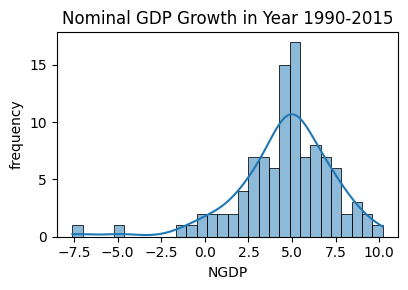

<Figure size 640x480 with 0 Axes>

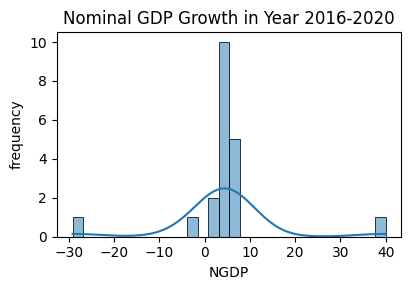

In [8]:
print("FIGURE 1:\n")
plt.figure()
histogram_plots(train_df, exclude_cols=["YQ", "YEAR", "QUARTER"],title="Nominal GDP Growth in Year 1990-2015")
plt.figure()
histogram_plots(filtered_gdpchg, exclude_cols=["YQ", "YEAR", "QUARTER"],title="Nominal GDP Growth in Year 2016-2020")

In [9]:
stats = pd.DataFrame({"Statistics":train_df['NGDP'].describe().index.tolist(),"Train_NGDP":train_df['NGDP'].describe().tolist(),\
                      "Test_NGDP":filtered_gdpchg['NGDP'].describe().tolist()})
display(stats)

,Statistics,Train_NGDP,Test_NGDP
0,count,104.000000,20.000000
1,mean,4.594231,4.280265
2,std,2.728769,11.454347
3,min,-7.600000,-29.132900
4,25%,3.350000,3.649125
5,50%,5.000000,4.152350
6,75%,6.250000,5.638775
7,max,10.200000,39.992800


The **distribution of nominal GDP growth (NGDP)** in the **training set (1990-2015)** ranges between **-7.6 and 10.2** with a **mean of 4.59** and **standard deviation of 2.73**. In contrast, the **test set (2016-2020)** has a much wider range **(-29 to 40)** and a **higher standard deviation (11.45 vs. 2.73 in train)**, indicating a **distribution shift**. This shift is **primarily driven by extreme GDP shocks observed during the COVID-19 period (Q2 and Q3 2020)**. This highlights the presence of outliers in the test period that exceed the training range, as shown in FIGURE 1. 

This poses a challenge for our model since the test set contains target values that fall outside the range seen during training, as a result the model may struggle to extrapolate effectively. To address this, we implement **feature engineering techniques** and **carefully select robust regression models** to **enhance generalizability even in unexpected rare real-world scenarios** like covid-induced economic shocks. 

FIGURE 2:

Shock induced by Covid:


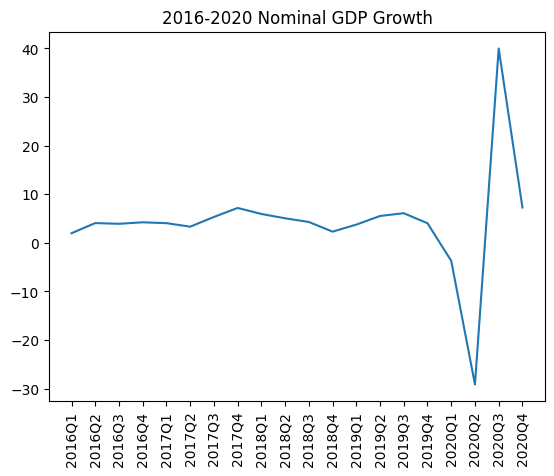

In [10]:
print("FIGURE 2:\n")
print("Shock induced by Covid:")
plt.plot(filtered_gdpchg['YQ'],filtered_gdpchg['NGDP'])
plt.xticks(rotation=90)
plt.title("2016-2020 Nominal GDP Growth")
plt.show()

## **2. Baseline Model**  (built using **Expert Estimates**)



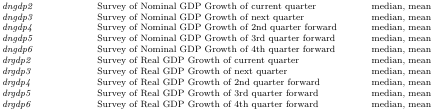

To establish a strong foundation for our project, we have considered expert GDP estimates from two key sources—Survey of Professional Forecasters (SPF) and Bureau of Economic Analysis (BEA). These estimates serve as reliable benchmarks, leveraging both forward-looking expert opinions and official government data.  The use of these variables are inspired by Datar et al 2020.

#### **1. Survey of Professional Forecasters (SPF) Estimate:**

The Survey of Professional Forecasters (SPF) is the oldest and most widely followed economic forecasting survey in the U.S. It compiles predictions from multiple forecasters to produce consensus estimates, providing a broad measure of economic expectations. These forecasts are forward-looking and often align closely with final GDP estimates, making them valuable for early assessment.

**Variables considered**: Current-quarter estimates—both mean and median—for real and nominal GDP *(DNGDP2_mean, DNGDP2_median, DRGDP2_mean, DRGDP2_median)*

**Data Availability**: Released in the second month of the target quarter

**Data Source**: [Philadelphia Fed - SPF](https://www.philadelphiafed.org/surveys-and-data/real-time-data-research/survey-of-professional-forecasters)  (downloadable in excel form)

#### **2. Bureau of Economic Analysis (BEA) Estimate:**

The BEA’s GDP estimates are the official U.S. government measures of economic activity, released in a three-stage revision process as more complete data becomes available. These estimates provide a structured and increasingly accurate measure of GDP.

First estimate: Released in the first month of the following quarter, based on preliminary and incomplete data

Second estimate: Released in the second month of the following quarter, incorporating additional source data for greater accuracy

Third estimate: Released in the third month of the following quarter, further refining GDP calculations

**Variables considered:** First and second estimates *(First, Second)*

**Data availability:** Available by the second month of the following quarter

**Data Source**: [Philadelphia Fed - Real-Time NOutput](https://www.philadelphiafed.org/surveys-and-data/real-time-data-research/noutput) (downloadable in excel form)

---

**Processing of SPF data:**

Import data:

1. Store file paths in `"to_process"` (key: variable name, value: file path).
2. Loop through the dictionary, apply the processing function on the file path, and save results to `"processed_data"`.
3. Display `"processed_data"`, which contains all four processed datasets.

In [11]:
# 1. import feature set 1 SPF estimate (x4) & filter the date range to between 1990 - 2020

to_process = {
    "mean_ngdp": "/kaggle/input/f1-nominal-gdp-growth-spf/Mean_NGDP_Growth.xlsx",
    "median_ngdp": "/kaggle/input/f1-nominal-gdp-growth-spf/Median_NGDP_Growth.xlsx",
    "mean_rgdp": "/kaggle/input/f1-real-gdp-growth-spf/Mean_RGDP_Growth.xlsx",
    "median_rgdp": "/kaggle/input/f1-real-gdp-growth-spf/Median_RGDP_Growth.xlsx"
}

processed_data = {}

for name,file_path in to_process.items():

    processed_data[name] = read_excel_and_filter_years(file_path)

display_side_by_side_dict(processed_data)

,YEAR,QUARTER,DNGDP2,DNGDP3,DNGDP4,DNGDP5,DNGDP6
85,1990,1,5.489800,5.955000,6.494000,6.895900,6.858500
86,1990,2,6.488700,6.092800,5.930900,5.963500,5.737600
87,1990,3,5.387100,5.152400,5.398300,5.214800,6.291900
88,1990,4,3.687600,3.910600,4.133900,5.585900,6.135900
89,1991,1,2.644900,3.757400,5.350200,6.113300,6.278600
,YEAR,QUARTER,DNGDP2,DNGDP3,DNGDP4,DNGDP5,DNGDP6
85,1990,1,5.272600,5.550300,6.045400,7.541800,7.030200
86,1990,2,5.782000,6.002300,6.436600,6.555800,6.305100
87,1990,3,5.311700,5.166900,6.518600,3.783600,6.317000
88,1990,4,3.602300,3.607000,4.014500,5.656000,6.446200


Loop through `"processed_data"` and rename columns by appending "mean" or "median" based on `"to_rename"`.

In [12]:
# 2. rename column name to include 'mean' or 'median'

to_rename = {
    "mean_ngdp": "mean",
    "mean_rgdp": "mean",
    "median_ngdp": "median",
    "median_rgdp": "median"
}

for name,df in processed_data.items():

      df.rename(
        columns={each: each + "_" + to_rename[name] for each in df.columns if each not in ["YEAR", "QUARTER"]},
        inplace=True
    )

Merge all four datasets into `"F1_df"` using left join on `"YEAR", "QUARTER"`, then extract current quarter estimates and merge with `"train_df1"` to form `"train_df2"`.

In [13]:
# 3. merge 4 sets of 'feature set 1 SPF estimate' 

F1_df = processed_data['mean_ngdp'].merge(processed_data['median_ngdp'],on=["YEAR","QUARTER"],how="left")\
                            .merge(processed_data['mean_rgdp'],on=["YEAR","QUARTER"],how="left")\
                            .merge(processed_data['median_rgdp'],on=["YEAR","QUARTER"],how="left")

F1_df = F1_df[["YEAR","QUARTER","DNGDP2_mean","DNGDP2_median","DRGDP2_mean","DRGDP2_median"]]

train_df2 = train_df1.merge(F1_df,on=["YEAR","QUARTER"],how="left")
test_df2 = test_df1.merge(F1_df,on=["YEAR","QUARTER"],how="left")

display(train_df2.head(),test_df2.head())


,YQ,NGDP,YEAR,QUARTER,DNGDP2_mean,DNGDP2_median,DRGDP2_mean,DRGDP2_median
0,1990Q1,9.000000,1990,1,5.489800,5.272600,1.613700,1.301900
1,1990Q2,6.100000,1990,2,6.488700,5.782000,2.313700,1.649800
2,1990Q3,3.700000,1990,3,5.387100,5.311700,1.121900,1.449100
3,1990Q4,-0.700000,1990,4,3.687600,3.602300,-1.282500,-1.377600
4,1991Q1,2.000000,1991,1,2.644900,2.413300,-1.925100,-1.876900


,YQ,NGDP,YEAR,QUARTER,DNGDP2_mean,DNGDP2_median,DRGDP2_mean,DRGDP2_median
0,2016Q1,0,2016,1,3.467800,3.199100,2.025000,2.021600
1,2016Q2,0,2016,2,3.755500,3.697700,2.163400,2.065800
2,2016Q3,0,2016,3,4.130800,4.172600,2.802600,2.593200
3,2016Q4,0,2016,4,4.069200,4.101700,2.191800,2.164700
4,2017Q1,0,2017,1,4.274300,4.233300,2.316200,2.200000


Copy `"file2"`, which contains BEA estimates, to `"file3"` for further processing. Since the first and second estimates are very similar in value, fill in the missing values of `"First"` using `"Second"` and vice versa. Then, merge the processed data into `"train_df2"`, which contains SPF estimates and NGDP.

In [14]:
file3 = file2.copy()

file3['First'] = file3['First'].fillna(file3['Second'])  
file3['Second'] = file3['Second'].fillna(file3['First'])  

train_df3 = train_df2.merge(file3.drop(['Date','Third','NGDP','YQ'],axis=1),on=["YEAR","QUARTER"],how="left")
test_df3 = test_df2.merge(file3.drop(['Date','Third','NGDP','YQ'],axis=1),on=["YEAR","QUARTER"],how="left")

display(train_df3.head(),test_df3.head())


,YQ,NGDP,YEAR,QUARTER,DNGDP2_mean,DNGDP2_median,DRGDP2_mean,DRGDP2_median,First,Second
0,1990Q1,9.000000,1990,1,5.489800,5.272600,1.613700,1.301900,7.782600,7.008200
1,1990Q2,6.100000,1990,2,6.488700,5.782000,2.313700,1.649800,5.792000,5.815300
2,1990Q3,3.700000,1990,3,5.387100,5.311700,1.121900,1.449100,5.328000,5.802500
3,1990Q4,-0.700000,1990,4,3.687600,3.602300,-1.282500,-1.377600,0.312300,0.486900
4,1991Q1,2.000000,1991,1,2.644900,2.413300,-1.925100,-1.876900,2.557000,2.512800


,YQ,NGDP,YEAR,QUARTER,DNGDP2_mean,DNGDP2_median,DRGDP2_mean,DRGDP2_median,First,Second
0,2016Q1,0,2016,1,3.467800,3.199100,2.025000,2.021600,1.245500,1.432400
1,2016Q2,0,2016,2,3.755500,3.697700,2.163400,2.065800,3.457200,3.432500
2,2016Q3,0,2016,3,4.130800,4.172600,2.802600,2.593200,4.431700,4.581800
3,2016Q4,0,2016,4,4.069200,4.101700,2.191800,2.164700,4.032800,3.915900
4,2017Q1,0,2017,1,4.274300,4.233300,2.316200,2.200000,2.955500,3.396000


Now that we have all the variables needed for building the baseline model, we will conduct a quick exploratory data analysis (EDA) and perform variable selection. Since the estimates come from professional sources, the data is expected to be relatively clean, requiring minimal additional preprocessing.

In [15]:
# No missing values as expected, no additional handling required

display(train_df3.info(),test_df3.info())
display(train_df3.describe(),test_df3.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   YQ             104 non-null    object 
 1   NGDP           104 non-null    float64
 2   YEAR           104 non-null    int64  
 3   QUARTER        104 non-null    int64  
 4   DNGDP2_mean    104 non-null    float64
 5   DNGDP2_median  104 non-null    float64
 6   DRGDP2_mean    104 non-null    float64
 7   DRGDP2_median  104 non-null    float64
 8   First          104 non-null    float64
 9   Second         104 non-null    float64
dtypes: float64(7), int64(2), object(1)
memory usage: 8.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   YQ             20 non-null     object 
 1   NGDP           20 non-null     int64  
 2   YEAR           20 non

None

None

,NGDP,YEAR,QUARTER,DNGDP2_mean,DNGDP2_median,DRGDP2_mean,DRGDP2_median,First,Second
count,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000
mean,4.594231,2002.500000,2.500000,4.457328,4.448254,2.267147,2.235088,4.339225,4.493542
std,2.728769,7.536320,1.123448,1.537943,1.554352,1.463087,1.500971,2.203818,2.364785
min,-7.600000,1990.000000,1.000000,-3.801800,-4.197300,-4.907800,-5.189200,-4.050000,-5.768400
25%,3.350000,1996.000000,1.750000,3.885650,3.869625,1.841425,1.815000,3.325450,3.402350
50%,5.000000,2002.500000,2.500000,4.470750,4.494300,2.517150,2.491850,4.515750,4.637900
75%,6.250000,2009.000000,3.250000,5.514875,5.500000,3.099200,3.120900,5.797100,5.842075
max,10.200000,2015.000000,4.000000,6.759900,6.786200,4.423000,4.497000,9.017300,9.060200


,NGDP,YEAR,QUARTER,DNGDP2_mean,DNGDP2_median,DRGDP2_mean,DRGDP2_median,First,Second
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,0.000000,2018.000000,2.500000,3.395240,3.368440,1.631310,1.519200,3.646990,3.768620
std,0.000000,1.450953,1.147079,9.081436,9.079250,8.734924,8.793311,11.942472,11.770450
min,0.000000,2016.000000,1.000000,-31.468800,-31.270100,-31.757300,-32.220800,-34.338500,-33.280700
25%,0.000000,2017.000000,1.750000,3.739550,3.668700,1.863100,1.879450,3.506250,3.457775
50%,0.000000,2018.000000,2.500000,4.186750,4.206650,2.465100,2.391050,4.189250,4.097200
75%,0.000000,2019.000000,3.250000,4.839450,4.884925,3.039300,3.014350,4.942775,4.934800
max,0.000000,2020.000000,4.000000,21.482600,21.897300,19.291100,19.093100,38.018500,38.005500


FIGURE 3:



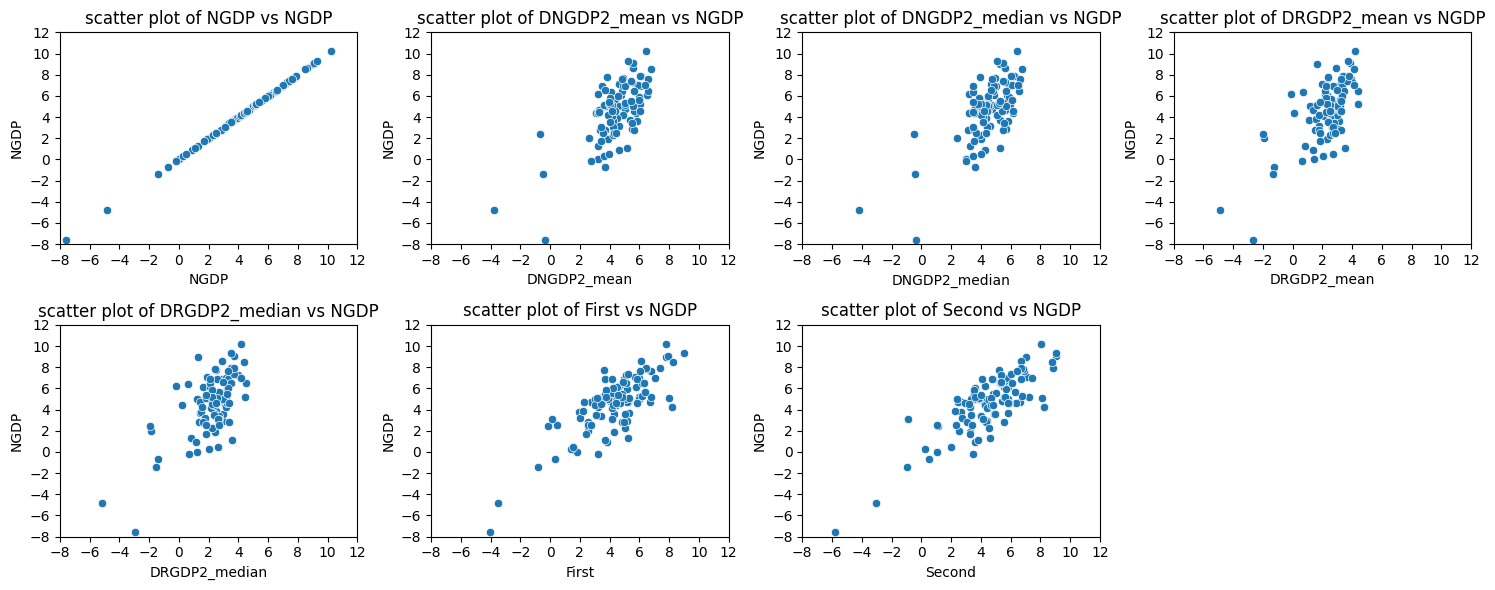

In [16]:
print("FIGURE 3:\n")

scatter_plots(train_df3, "NGDP", exclude_cols=["YQ",'YEAR','QUARTER'], cols_per_row=4, figsize=(15, 3), 
                  xtick_range=(-8,11), xtick_interval=2, 
                  ytick_range=(-8,11), ytick_interval=2)

The scatterplot shows that SPF estimates have a narrower range (approximately -4 to 7) compared to BEA estimates (approximately -5 to 9) and actual NGDP (approximately -7 to 10). While SPF forecasts are available earlier, they tend to be smoother and less volatile due to their survey-based nature, which reflects broad economic expectations rather than real-time data. However, this stability comes at the cost of reduced sensitivity to economic fluctuations.

In contrast, BEA estimates are based on actual economic data and undergo periodic revisions, making them more responsive to short-term fluctuations. The scatterplot further supports this, as BEA estimates show a stronger and more positive alignment with actual NGDP, with points more centered. SPF estimates, on the other hand, exhibit greater dispersion, indicating lower accuracy.

That said, SPF forecasts could serve as a viable alternative when early predictions are required. However, since our prediction is made just one month before the final release, we choose to use the **second BEA estimate**, which is available to us by then and incorporates the latest revisions and is better suited for capturing real-time economic fluctuations, particularly **unforeseen shocks like COVID-19**.

|   iter    |  target   |   alpha   | l1_ratio  |
-------------------------------------------------
| 1         | -7.192    | 6.965     | 0.2861    |
| 2         | -5.035    | 2.269     | 0.5513    |
| 3         | -8.189    | 7.195     | 0.4231    |
| 4         | -8.527    | 9.808     | 0.6848    |
| 5         | -6.699    | 4.809     | 0.3921    |
| 6         | -5.068    | 2.255     | 0.5721    |
| 7         | -6.369    | 2.977     | 0.677     |
| 8         | -4.006    | 1.917     | 0.02157   |
| 9         | -3.516    | 0.9424    | 0.001948  |
| 10        | -3.116    | 0.005161  | 0.834     |
| 11        | -3.122    | 0.02468   | 0.007069  |
| 12        | -3.687    | 0.7289    | 0.9974    |
| 13        | -3.257    | 0.3207    | 0.4092    |
| 14        | -3.114    | 0.0002526 | 0.517     |
| 15        | -3.222    | 0.3011    | 0.00258   |
| 16        | -3.119    | 0.01104   | 0.9796    |
| 17        | -3.115    | 0.002211  | 0.3035    |
| 18        | -3.21     | 0.184     | 0.9916    |


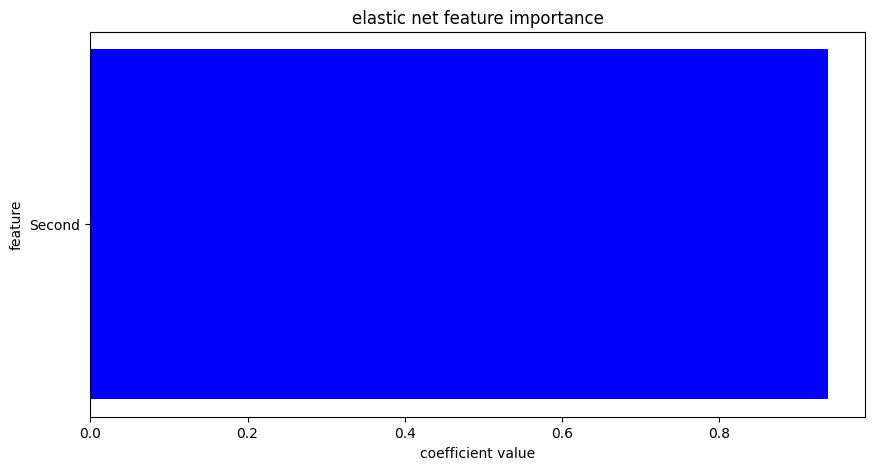

In [17]:
to_drop1 = ['DNGDP2_mean','DNGDP2_median','DRGDP2_mean','DRGDP2_median','First']


results1 = train_elastic_net_bayesian(train_df3.drop(to_drop1,axis=1), test_df3.drop(to_drop1,axis=1),w=10,h=5,test_target=filtered_gdpchg['NGDP'])
                            

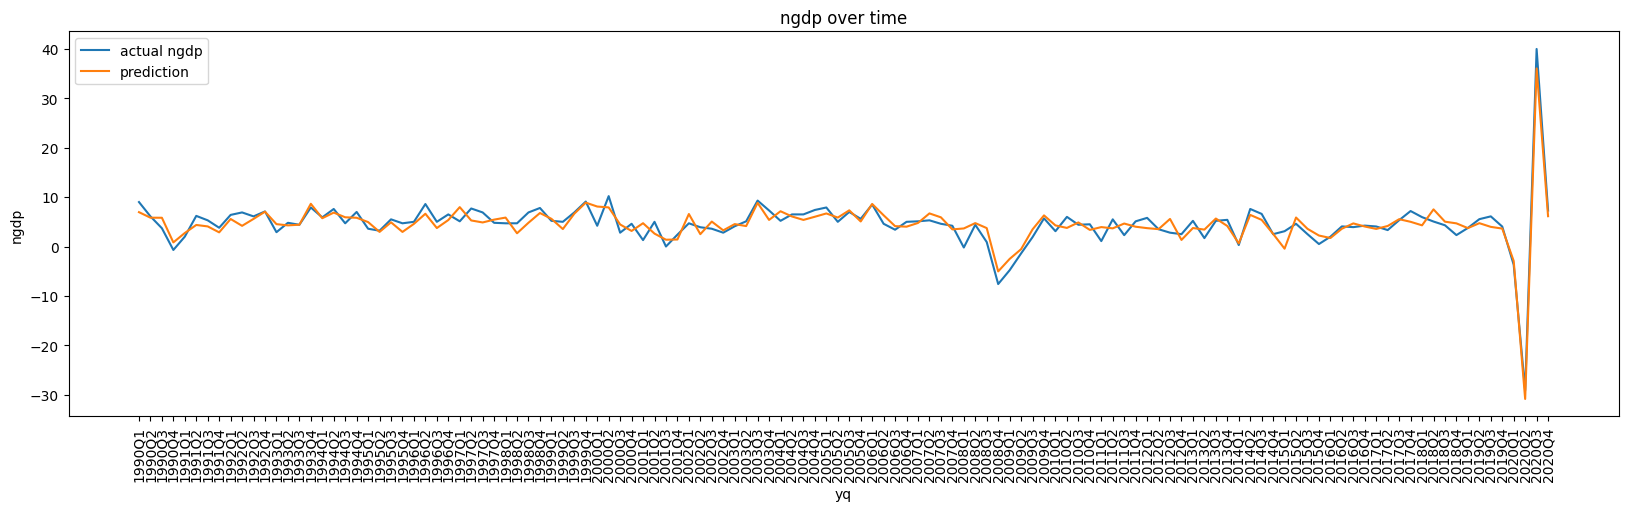

In [18]:
plot_ngdp_over_time(results1)


---
**Baseline model**

**Model**: Elastic Net

**Variables**: BEA Second Estimate

**Hyperparameters**: best alpha: 0.000197, best l1_ratio: 0.1162

**In-sample rmse**: 1.5792

**Out-of-sample rmse**: 1.5388

---

In [19]:
# Update the dataset retaining only required variables, which will be merged with other variables later

train_df4, test_df4 = drop_columns(train_df3, test_df3, to_drop1)

,YQ,NGDP,YEAR,QUARTER,Second
0,1990Q1,9.000000,1990,1,7.008200
1,1990Q2,6.100000,1990,2,5.815300
2,1990Q3,3.700000,1990,3,5.802500
3,1990Q4,-0.700000,1990,4,0.486900
4,1991Q1,2.000000,1991,1,2.512800


,YQ,NGDP,YEAR,QUARTER,Second
0,2016Q1,0,2016,1,1.432400
1,2016Q2,0,2016,2,3.432500
2,2016Q3,0,2016,3,4.581800
3,2016Q4,0,2016,4,3.915900
4,2017Q1,0,2017,1,3.396000


## **3. Model V2 (Expert Estimates + Market Variables)**

To further improve our baseline model, we introduce key market variables from **Compustat** and **CRSP**:  

**Compustat** (by Standard & Poor’s) provides comprehensive historical data on company fundamentals, including income statements, balance sheets, cash flow statements, and market data.  **CRSP** (Center for Research in Security Prices) (by the University of Chicago Booth School of Business) offers high-quality stock market data, including historical prices, returns, and volume for securities listed on NYSE, AMEX, NASDAQ, and ARCA.  

### **1. Stock Market Return (CRSP Monthly Stock Market Indexes)**  

**Variable Considered**: Value-weighted return including dividends *(vwretd)*  

**Data Availability**: Currently, only annual updates are available due to our limited data subscription. However, since monthly updates are accessible with a subscription, we assume a monthly frequency for feature engineering.  

**Data Source**:  
[WRDS - CRSP Monthly Stock Market Indexes](https://wrds-www.wharton.upenn.edu/pages/get-data/center-research-security-prices-crsp/annual-update/stock-version-2/monthly-stock-market-indexes/)  

### **2. Stock Price and Market Capitalization (Compustat & CRSP)**  

**Variables Considered**:  

- Price Close *(prccq)* *(Compustat)*  
- Price High *(prchq)* *(Compustat)*  
- Price Low *(prclq)* *(Compustat)*  
- Share Outstanding *(shrout)* *(CRSP)*  
- Market Cap - CRSP *(mcap_crsp)* *(derived from CRSP Price Close & Share Outstanding)*  
- Market Cap - Compustat *(mcap_compustat)* *(derived from Compustat Price Close & Share Outstanding)*  

**Data Availability**: **Quarterly/daily updates**, available by the second month of the following quarter.  

**Data Source**:  
[WRDS - Compustat Fundamentals Quarterly](https://wrds-www.wharton.upenn.edu/pages/get-data/compustat-capital-iq-standard-poors/compustat/north-america-daily/fundamentals-quarterly/) *(downloadable in CSV form, but retrieved using the specified code below)*  


In [20]:
# This is the code that we used to get 'Stock Price and Market Capitalization (Compustat & CRSP)'. We then save it to our directory and load it for processing.

'''
!pip install wrds
import wrds

db = wrds.Connection()

query = """
SELECT 
    c.gvkey, c.datadate, c.prccq, c.prchq, c.prclq,   -- Compustat stock price data
    link.lpermno AS permno, crsp.prc, crsp.shrout    -- CRSP price & shares outstanding
FROM comp.fundq AS c
JOIN crsp.ccmxpf_lnkhist AS link 
    ON c.gvkey = link.gvkey
    AND c.datadate BETWEEN link.linkdt AND COALESCE(link.linkenddt, '9999-12-31')
JOIN crsp.msf AS crsp  -- CRSP Monthly Stock File
    ON link.lpermno = crsp.permno
    AND c.datadate = crsp.date  -- Match dates for Compustat & CRSP
JOIN crsp.stocknames AS sn  -- Join to get `shrcd`
    ON crsp.permno = sn.permno
WHERE sn.shrcd IN (10, 11)  -- Filter for common stocks
AND c.datadate BETWEEN '1989-01-01' AND '2020-12-31'
ORDER BY c.datadate ASC
"""

df = db.raw_sql(query)
df['datadate'] = pd.to_datetime(df['datadate'])
df['mcap_crsp'] = abs(df['prc']) * df['shrout'] * 1000  
df['mcap_compustat'] = df['prccq'] * df['shrout'] * 1000 
display(df.head())
db.close()

df.to_csv("/kaggle/working/mkt_data.csv", index=False)
print("DataFrame saved.")
'''

'\n!pip install wrds\nimport wrds\n\ndb = wrds.Connection()\n\nquery = """\nSELECT \n    c.gvkey, c.datadate, c.prccq, c.prchq, c.prclq,   -- Compustat stock price data\n    link.lpermno AS permno, crsp.prc, crsp.shrout    -- CRSP price & shares outstanding\nFROM comp.fundq AS c\nJOIN crsp.ccmxpf_lnkhist AS link \n    ON c.gvkey = link.gvkey\n    AND c.datadate BETWEEN link.linkdt AND COALESCE(link.linkenddt, \'9999-12-31\')\nJOIN crsp.msf AS crsp  -- CRSP Monthly Stock File\n    ON link.lpermno = crsp.permno\n    AND c.datadate = crsp.date  -- Match dates for Compustat & CRSP\nJOIN crsp.stocknames AS sn  -- Join to get `shrcd`\n    ON crsp.permno = sn.permno\nWHERE sn.shrcd IN (10, 11)  -- Filter for common stocks\nAND c.datadate BETWEEN \'1989-01-01\' AND \'2020-12-31\'\nORDER BY c.datadate ASC\n"""\n\ndf = db.raw_sql(query)\ndf[\'datadate\'] = pd.to_datetime(df[\'datadate\'])\ndf[\'mcap_crsp\'] = abs(df[\'prc\']) * df[\'shrout\'] * 1000  \ndf[\'mcap_compustat\'] = df[\'prccq\'] * df

In [21]:
# Load both datasets 

mktreturn = pd.read_csv("/kaggle/input/f2-stock-market-return-crsp/Stock Market Return.csv") 
mktpxcap = pd.read_csv("/kaggle/input/mkt-data/mkt_data.csv") 

display_side_by_side_df(mktreturn,mktpxcap)

Split the `"vwretd"` date column into `"YEAR"` and `"QUARTER"`, then compute the percentage change over **1, 3, 6, 12, and 24 months**.

In [22]:
vwretd = mktreturn.copy()

vwretd = split_obs_date(vwretd, "MthCalDt")
time_periods = [1, 3, 6, 12, 24]
for period in time_periods:
    vwretd[f'vwretd_ret{period}m'] = vwretd["vwretd"].pct_change(period)


Since we set the date range much earlier than the training set (<1990), we successfully avoided a large number of missing values that would have resulted from percentage change calculations. As shown below, no additional missing value handling is required.

In [23]:
vwretd.loc[vwretd["YEAR"] >= 1990].isna().sum()

vwretd           0
YEAR             0
QUARTER          0
vwretd_ret1m     0
vwretd_ret3m     0
vwretd_ret6m     0
vwretd_ret12m    0
vwretd_ret24m    0
dtype: int64

Sort `"mkt_data"` and drop duplicates. Then, split the date column into `"YEAR"` and `"QUARTER"`. Compute firm level quarter-over-quarter and year-over-year percentage changes for the specified variables and drop the original columns. Perform firm level forward and backward filling for missing values. Since this is time series data, to prevent data leakage, we will consistently use backward and forward filling or zero throughout the project instead of mean or median. For remaining NaNs, assume they result from the first appearance of the variable with no prior value, and fill them with 0.

In [24]:
mkt_data = mktpxcap.copy()

mkt_data.sort_values(['gvkey','datadate'],inplace=True)
mkt_data.drop_duplicates(inplace=True)
mkt_data = split_obs_date(mkt_data, "datadate")

to_transform = ['mcap_crsp', 'mcap_compustat','prccq', 'prchq', 'prclq','shrout']
for col in to_transform:
    mkt_data = compute_growth(mkt_data, col)
mkt_data = mkt_data.drop(to_transform,axis=1)


to_transform2 = mkt_data.drop(['gvkey', 'permno', 'prc', 'YEAR', 'QUARTER'],axis=1).columns
mkt_data[to_transform2] = mkt_data.groupby('gvkey')[to_transform2].ffill()
mkt_data[to_transform2] = mkt_data.groupby('gvkey')[to_transform2].bfill()
mkt_data = mkt_data.fillna(0)

display(mkt_data.head(10))

,gvkey,permno,prc,YEAR,QUARTER,mcap_crsp_dif,mcap_crsp_yoy,mcap_compustat_dif,mcap_compustat_yoy,prccq_dif,prccq_yoy,prchq_dif,prchq_yoy,prclq_dif,prclq_yoy,shrout_dif,shrout_yoy
2039,1003,10031.000000,-2.000000,1989,1,-0.437500,0.000000,-0.571429,0.000000,-0.571429,0.000000,-0.727273,0.000000,-0.571429,0.000000,0.000000,0.000000
38549,1003,10031.000000,-1.125000,1989,3,-0.437500,0.000000,-0.571429,0.000000,-0.571429,0.000000,-0.727273,0.000000,-0.571429,0.000000,0.000000,0.000000
2390,1004,54594.000000,26.125000,1989,1,0.197075,0.199932,0.197076,0.199932,0.196173,0.191387,0.110132,0.308370,0.175141,0.355931,0.000755,0.007172
19916,1004,54594.000000,31.250000,1989,2,0.197075,0.199932,0.197076,0.199932,0.196173,0.191387,0.110132,0.308370,0.175141,0.355931,0.000755,0.007172
39086,1004,54594.000000,34.625000,1989,3,0.116080,0.199932,0.116080,0.199932,0.108000,0.191387,0.107143,0.308370,0.081730,0.355931,0.007292,0.007172
43210,1004,54594.000000,35.500000,1989,4,0.024375,0.199932,0.024375,0.199932,0.025271,0.191387,0.075269,0.308370,0.173333,0.355931,-0.000874,0.007172
48059,1004,54594.000000,31.125000,1990,1,-0.123239,0.199932,-0.123240,0.199932,-0.123240,0.191387,-0.010000,0.308370,-0.090909,0.355931,0.000000,0.007172
50948,1004,54594.000000,21.250000,1990,2,-0.314966,-0.313331,-0.314966,-0.313331,-0.317269,-0.320000,-0.144781,0.007937,-0.325000,-0.221154,0.003373,0.009807
55017,1004,54594.000000,15.875000,1990,3,-0.252616,-0.540171,-0.252616,-0.540171,-0.252941,-0.541516,-0.236221,-0.304659,-0.246914,-0.457777,0.000436,0.002933
57892,1004,54594.000000,11.875000,1990,4,-0.251410,-0.663968,-0.251410,-0.663968,-0.251968,-0.665493,-0.345360,-0.576666,-0.377049,-0.712121,0.000747,0.004560


Next, we group `"mkt_data2"` by `"YEAR"` and `"QUARTER"` to compute the mean and standard deviation for each group. The same processing is applied to `"vwretd2"`.

In [25]:
mkt_data2 = mkt_data.groupby(['YEAR','QUARTER'],as_index=False).agg({
    'mcap_crsp_dif': ['mean', 'std'], 
    'mcap_crsp_yoy': ['mean', 'std'],
    'mcap_compustat_dif': ['mean', 'std'], 
    'mcap_compustat_yoy': ['mean', 'std'],
    'prccq_dif': ['mean', 'std'],
    'prccq_yoy': ['mean', 'std'],
    'prchq_dif': ['mean', 'std'],
    'prchq_yoy': ['mean', 'std'],
    'prclq_dif': ['mean', 'std'],
    'prclq_yoy': ['mean', 'std'],
    'shrout_dif': ['mean', 'std'],
    'shrout_yoy': ['mean', 'std'],
})

# rename the columns
mkt_data2.columns = ["YEAR","QUARTER", 'mcap_crsp_dif_mean', 'mcap_crsp_dif_std',
       'mcap_crsp_yoy_mean', 'mcap_crsp_yoy_std', 'mcap_compustat_dif_mean',
       'mcap_compustat_dif_std', 'mcap_compustat_yoy_mean',
       'mcap_compustat_yoy_std', 'prccq_dif_mean', 'prccq_dif_std',
       'prccq_yoy_mean', 'prccq_yoy_std', 'prchq_dif_mean', 'prchq_dif_std',
       'prchq_yoy_mean', 'prchq_yoy_std', 'prclq_dif_mean', 'prclq_dif_std',
       'prclq_yoy_mean', 'prclq_yoy_std', 'shrout_dif_mean', 'shrout_dif_std',
       'shrout_yoy_mean', 'shrout_yoy_std']

display(mkt_data2.head())

vwretd2 = vwretd.dropna().groupby(['YEAR','QUARTER'],as_index=False).mean()
display(vwretd2.head())

,YEAR,QUARTER,mcap_crsp_dif_mean,mcap_crsp_dif_std,mcap_crsp_yoy_mean,mcap_crsp_yoy_std,mcap_compustat_dif_mean,mcap_compustat_dif_std,mcap_compustat_yoy_mean,mcap_compustat_yoy_std,prccq_dif_mean,prccq_dif_std,prccq_yoy_mean,prccq_yoy_std,prchq_dif_mean,prchq_dif_std,prchq_yoy_mean,prchq_yoy_std,prclq_dif_mean,prclq_dif_std,prclq_yoy_mean,prclq_yoy_std,shrout_dif_mean,shrout_dif_std,shrout_yoy_mean,shrout_yoy_std
0,1989,1,0.152584,2.960444,0.499402,3.632916,0.157389,3.281708,0.535447,3.993588,0.114321,2.220339,0.462786,5.588668,0.137563,2.729375,0.460168,5.816178,0.126067,2.116206,0.438620,5.871314,0.058453,0.631510,0.215337,0.762589
1,1989,2,0.125237,2.533884,0.546690,3.151755,0.093574,0.642298,0.583737,3.418823,0.077945,0.947310,0.452392,4.244470,0.091495,0.862546,0.437179,3.816365,0.092409,1.196408,0.423664,5.117830,0.038504,0.333613,0.236120,0.796610
2,1989,3,0.088135,0.438321,0.102618,1.418429,0.097053,0.523058,0.117579,1.689509,0.201368,4.341524,0.309204,8.522518,0.279457,5.643273,0.389690,9.965588,0.228741,3.930334,0.352961,7.450142,0.051508,0.299289,0.125408,0.516650
3,1989,4,-0.032863,0.339109,0.089751,1.393818,-0.033460,0.357654,0.105551,1.674780,-0.052351,0.414331,0.293810,8.606908,0.011140,0.401628,0.376339,10.065927,-0.010513,0.739587,0.338879,7.520399,0.034281,0.267544,0.130773,0.512021
4,1990,1,-0.045205,0.382119,0.084829,1.340938,-0.045060,0.409506,0.096355,1.565360,-0.031175,1.356731,0.292164,8.651294,-0.050696,0.780274,0.379005,10.125693,-0.030816,1.490376,0.336791,7.562014,0.040260,0.348387,0.136762,0.539933


,YEAR,QUARTER,vwretd,vwretd_ret1m,vwretd_ret3m,vwretd_ret6m,vwretd_ret12m,vwretd_ret24m
0,1990,1,-0.010355,-1.808154,0.516839,-6.543133,-1.280644,-1.909684
1,1990,2,0.018820,-2.454284,1.066180,0.909482,-0.154108,64.435142
2,1990,3,-0.051713,3.203682,3.046701,-3.754594,9.759527,0.041937
3,1990,4,0.027584,-2.526223,-0.977533,-2.952343,0.909985,-2.104573
4,1991,1,0.051284,0.196609,-1.597724,-3.196164,0.862707,-1.841039


We merge `"mkt_data2"` and `"vwretd2"` using a left join on `"YEAR"` and `"QUARTER"`.

In [26]:
marketdf = vwretd2.merge(mkt_data2,on=['YEAR','QUARTER'],how="left")

display(marketdf.head())

,YEAR,QUARTER,vwretd,vwretd_ret1m,vwretd_ret3m,vwretd_ret6m,vwretd_ret12m,vwretd_ret24m,mcap_crsp_dif_mean,mcap_crsp_dif_std,mcap_crsp_yoy_mean,mcap_crsp_yoy_std,mcap_compustat_dif_mean,mcap_compustat_dif_std,mcap_compustat_yoy_mean,mcap_compustat_yoy_std,prccq_dif_mean,prccq_dif_std,prccq_yoy_mean,prccq_yoy_std,prchq_dif_mean,prchq_dif_std,prchq_yoy_mean,prchq_yoy_std,prclq_dif_mean,prclq_dif_std,prclq_yoy_mean,prclq_yoy_std,shrout_dif_mean,shrout_dif_std,shrout_yoy_mean,shrout_yoy_std
0,1990,1,-0.010355,-1.808154,0.516839,-6.543133,-1.280644,-1.909684,-0.045205,0.382119,0.084829,1.340938,-0.045060,0.409506,0.096355,1.565360,-0.031175,1.356731,0.292164,8.651294,-0.050696,0.780274,0.379005,10.125693,-0.030816,1.490376,0.336791,7.562014,0.040260,0.348387,0.136762,0.539933
1,1990,2,0.018820,-2.454284,1.066180,0.909482,-0.154108,64.435142,0.071795,0.623985,0.071178,1.004925,0.163575,2.998728,0.169337,3.310146,0.190199,3.201853,0.365308,9.133616,0.083608,1.913555,0.394920,10.185683,0.137638,3.180587,0.390597,8.101113,0.030151,0.374627,0.149018,0.712882
2,1990,3,-0.051713,3.203682,3.046701,-3.754594,9.759527,0.041937,-0.008174,0.441890,-0.025472,0.879915,-0.007128,0.468917,-0.024836,0.928244,-0.035010,0.382537,-0.031843,1.983361,1.011034,33.334964,0.594082,19.086751,-0.018553,0.414272,-0.016914,1.885325,0.033179,0.268312,0.117434,0.559118
3,1990,4,0.027584,-2.526223,-0.977533,-2.952343,0.909985,-2.104573,-0.044426,1.042718,0.486706,2.608609,-0.036183,1.268166,0.532914,3.088978,0.011573,3.040380,0.447098,4.386478,0.083710,4.296700,0.453133,4.258852,-0.032915,2.754232,0.412919,4.906760,0.118816,0.627512,0.235876,0.791126
4,1991,1,0.051284,0.196609,-1.597724,-3.196164,0.862707,-1.841039,0.218207,0.627283,0.094005,1.572252,0.239011,0.729793,0.111388,1.892587,0.228122,0.909314,0.099834,1.893948,0.004884,1.028645,-0.007251,1.691186,0.028448,1.202778,-0.085742,1.542369,0.038489,0.545250,0.097183,0.677518


Filter the date range to 1990-2015 and 2016-2020, then merge the filtered datasets with `train_df4`, which contains the BEA second estimate.

In [27]:
mkt_train = marketdf.loc[(marketdf["YEAR"]>=1990)&(marketdf["YEAR"]<=2015),:]
mkt_test = marketdf.loc[(marketdf["YEAR"]>=2016)&(marketdf["YEAR"]<=2020),:]

mkt_train2 = train_df4.merge(mkt_train,on=["YEAR","QUARTER"],how="left")
mkt_test2 = test_df4.merge(mkt_test,on=["YEAR","QUARTER"],how="left")

display(mkt_train2.head(),mkt_test2.tail())

,YQ,NGDP,YEAR,QUARTER,Second,vwretd,vwretd_ret1m,vwretd_ret3m,vwretd_ret6m,vwretd_ret12m,vwretd_ret24m,mcap_crsp_dif_mean,mcap_crsp_dif_std,mcap_crsp_yoy_mean,mcap_crsp_yoy_std,mcap_compustat_dif_mean,mcap_compustat_dif_std,mcap_compustat_yoy_mean,mcap_compustat_yoy_std,prccq_dif_mean,prccq_dif_std,prccq_yoy_mean,prccq_yoy_std,prchq_dif_mean,prchq_dif_std,prchq_yoy_mean,prchq_yoy_std,prclq_dif_mean,prclq_dif_std,prclq_yoy_mean,prclq_yoy_std,shrout_dif_mean,shrout_dif_std,shrout_yoy_mean,shrout_yoy_std
0,1990Q1,9.000000,1990,1,7.008200,-0.010355,-1.808154,0.516839,-6.543133,-1.280644,-1.909684,-0.045205,0.382119,0.084829,1.340938,-0.045060,0.409506,0.096355,1.565360,-0.031175,1.356731,0.292164,8.651294,-0.050696,0.780274,0.379005,10.125693,-0.030816,1.490376,0.336791,7.562014,0.040260,0.348387,0.136762,0.539933
1,1990Q2,6.100000,1990,2,5.815300,0.018820,-2.454284,1.066180,0.909482,-0.154108,64.435142,0.071795,0.623985,0.071178,1.004925,0.163575,2.998728,0.169337,3.310146,0.190199,3.201853,0.365308,9.133616,0.083608,1.913555,0.394920,10.185683,0.137638,3.180587,0.390597,8.101113,0.030151,0.374627,0.149018,0.712882
2,1990Q3,3.700000,1990,3,5.802500,-0.051713,3.203682,3.046701,-3.754594,9.759527,0.041937,-0.008174,0.441890,-0.025472,0.879915,-0.007128,0.468917,-0.024836,0.928244,-0.035010,0.382537,-0.031843,1.983361,1.011034,33.334964,0.594082,19.086751,-0.018553,0.414272,-0.016914,1.885325,0.033179,0.268312,0.117434,0.559118
3,1990Q4,-0.700000,1990,4,0.486900,0.027584,-2.526223,-0.977533,-2.952343,0.909985,-2.104573,-0.044426,1.042718,0.486706,2.608609,-0.036183,1.268166,0.532914,3.088978,0.011573,3.040380,0.447098,4.386478,0.083710,4.296700,0.453133,4.258852,-0.032915,2.754232,0.412919,4.906760,0.118816,0.627512,0.235876,0.791126
4,1991Q1,2.000000,1991,1,2.512800,0.051284,0.196609,-1.597724,-3.196164,0.862707,-1.841039,0.218207,0.627283,0.094005,1.572252,0.239011,0.729793,0.111388,1.892587,0.228122,0.909314,0.099834,1.893948,0.004884,1.028645,-0.007251,1.691186,0.028448,1.202778,-0.085742,1.542369,0.038489,0.545250,0.097183,0.677518


,YQ,NGDP,YEAR,QUARTER,Second,vwretd,vwretd_ret1m,vwretd_ret3m,vwretd_ret6m,vwretd_ret12m,vwretd_ret24m,mcap_crsp_dif_mean,mcap_crsp_dif_std,mcap_crsp_yoy_mean,mcap_crsp_yoy_std,mcap_compustat_dif_mean,mcap_compustat_dif_std,mcap_compustat_yoy_mean,mcap_compustat_yoy_std,prccq_dif_mean,prccq_dif_std,prccq_yoy_mean,prccq_yoy_std,prchq_dif_mean,prchq_dif_std,prchq_yoy_mean,prchq_yoy_std,prclq_dif_mean,prclq_dif_std,prclq_yoy_mean,prclq_yoy_std,shrout_dif_mean,shrout_dif_std,shrout_yoy_mean,shrout_yoy_std
15,2019Q4,0,2019,4,3.466200,0.027582,0.277516,-0.439790,-0.878599,-0.562131,0.544840,0.198856,1.787473,0.695459,3.316668,0.756249,32.767368,1.307652,35.208126,0.173227,1.644964,0.435774,2.912306,0.091380,1.309618,0.315146,1.829187,0.055862,1.260758,0.381280,5.156703,0.645812,32.724214,0.847853,31.641429
16,2020Q1,0,2020,1,-3.527300,-0.073793,14.616594,-3.430345,-2.718296,-5.445046,2.211614,-0.163955,1.060532,0.329020,3.487896,-0.159769,1.141307,0.333933,3.609533,-0.173763,1.431819,0.085999,2.248558,0.206799,2.150821,0.371881,2.142785,-0.050506,10.686116,-0.055384,1.778740,0.085664,1.037480,0.285763,1.394532
17,2020Q2,0,2020,2,-33.280700,0.069571,-1.009909,-26.303669,2.052445,-0.024376,10.496743,0.483923,1.844567,0.548133,4.001247,1.060266,33.587542,0.559907,4.432764,0.445306,2.403941,0.452539,3.221419,0.034058,1.268852,0.229019,2.506152,0.332203,6.876142,0.064158,2.690263,0.672503,33.554328,0.215317,1.709872
18,2020Q3,0,2020,3,38.005500,0.029639,-0.028231,-0.894608,-11.922540,-1.288963,-27.154015,0.192763,1.616606,0.438082,3.001504,0.212918,1.891297,0.450127,3.269075,0.152591,1.495820,0.324048,2.498039,0.179599,1.444350,0.333150,2.411020,0.420316,1.430503,0.250659,2.655561,0.114720,1.439196,0.197168,1.288390
19,2020Q4,0,2020,4,6.137300,0.049526,-2.730347,-0.946972,0.309005,0.356001,1.151298,0.577973,6.256644,0.758305,3.701982,1.330635,38.422053,0.773479,3.842374,0.926748,27.153204,0.675110,4.786784,0.471123,9.745180,0.580932,3.071431,0.639830,17.944205,0.741439,14.733500,0.692441,35.470646,0.211292,1.488613


Apply data_overview function to have a look at the statistics of our datasets

In [28]:
_, num_stats_df =  data_overview(mkt_train2.drop(['YEAR','QUARTER','YQ'],axis=1), mkt_test2.drop(['YEAR','QUARTER','YQ'],axis=1), \
                                            target_column="NGDP",remove_duplicates=False)
num_stats_df.sort_values("Correlation_with_Target",ascending=False)

Data types categorizing...
Checking for duplicates...
No duplicates.
Creating Stats DataFrame...

Target column 'NGDP' statistics:
count   104.000000
mean      4.594231
std       2.728769
min      -7.600000
25%       3.350000
50%       5.000000
75%       6.250000
max      10.200000
Name: NGDP, dtype: float64
Stats DataFrame is created.


,Feature,Highest_Corr_Feature,Highest_Corr_Value,Correlation_with_Target,Outliers_No,Outliers_%,Train_Missing_val%,Test_Missing_val%,Mode,Mode%,Min,Median,Mean,Max,Std,Var,Range,LowerB,UpperB
0,NGDP,Second,0.813535,1.000000,3,3.000000,0.000000,0.000000,5.000000,0.057692,-7.600000,5.000000,4.594231,10.200000,2.728769,7.446180,17.800000,-1.000000,10.600000
1,Second,NGDP,0.813535,0.813535,4,4.000000,0.000000,0.000000,5.336300,0.019231,-5.768400,4.637900,4.493542,9.060200,2.364785,5.592206,14.828600,-0.257238,9.501663
16,prchq_yoy_mean,prccq_yoy_mean,0.860145,0.431926,3,3.000000,0.000000,0.000000,-0.358722,0.009615,-0.358722,0.270144,0.263389,0.971413,0.241452,0.058299,1.330135,-0.347477,0.834720
8,mcap_crsp_yoy_mean,mcap_compustat_yoy_mean,0.850097,0.391107,2,2.000000,0.000000,0.000000,-0.360139,0.009615,-0.360139,0.459785,0.492897,1.798770,0.352683,0.124385,2.158909,-0.426927,1.360862
4,mcap_compustat_yoy_mean,mcap_crsp_yoy_mean,0.850097,0.387278,0,0.000000,0.000000,0.000000,-0.365975,0.009615,-0.365975,0.522627,0.520395,1.406143,0.345370,0.119280,1.772118,-0.486627,1.464614
12,prccq_yoy_mean,prchq_yoy_mean,0.860145,0.375387,5,5.000000,0.000000,0.000000,-0.396163,0.009615,-0.396163,0.290593,0.314416,1.306518,0.312032,0.097364,1.702681,-0.423234,0.970607
26,vwretd,prccq_dif_mean,0.590837,0.287454,6,6.000000,0.000000,0.000000,-0.082427,0.009615,-0.082427,0.011645,0.008257,0.066488,0.027639,0.000764,0.148915,-0.044246,0.065475
20,prclq_yoy_mean,prclq_yoy_std,0.998090,0.160340,11,11.000000,0.000000,0.000000,-0.466509,0.009615,-0.466509,0.351011,1.081389,64.387690,6.302916,39.726752,64.854199,-0.518735,1.189610
10,prccq_dif_mean,mcap_compustat_dif_mean,0.645344,0.152755,4,4.000000,0.000000,0.000000,-0.275675,0.009615,-0.275675,0.072321,0.096946,0.546473,0.145967,0.021306,0.822148,-0.236333,0.418333
21,prclq_yoy_std,prclq_yoy_mean,0.998090,0.141474,12,12.000000,0.000000,0.000000,0.482958,0.009615,0.482958,3.294531,52.668889,4439.456079,435.162264,189366.196149,4438.973120,-7.242749,16.436613


In [29]:
# retrieve those x having high correlation with other x but lower correlation with y

extracted_features = extract_highly_correlated_features(num_stats_df)
print(extracted_features)

['prclq_dif_std', 'prclq_yoy_std', 'shrout_dif_std']


In [30]:
# remove those x and mcap_compustat_dif_std (not captured by the function in the first round of retrieval)

mkt_train3 = mkt_train2.drop(extracted_features+['mcap_compustat_dif_std'],axis=1)
mkt_test3 = mkt_test2.drop(extracted_features+['mcap_compustat_dif_std'],axis=1)

We drop predictors that have a high correlation with other predictors but a lower correlation with the target variable.  

Regarding outliers, since they are likely meaningful rather than errors, removing them may reduce the model’s ability to capture fluctuations. Therefore, we will not apply winsorization or log transformation. Additionally, all missing values appear to have been handled.

Now, we will also include additional macroeconomic variables into the model.

---
**Additional Macroeconomic Variables included:**

#### **1. FRED Macroeconomic Indicators:**

The Federal Reserve Economic Data (FRED) is a comprehensive database maintained by the Federal Reserve Bank of St. Louis. It provides access to a vast collection of economic data, including macroeconomic indicators, financial market data, and monetary statistics, widely used for research and policy analysis.

**Variables Considered:**  

- **Government Total Expenditure** *(W068RCQ027SBEA)*  
- **Net Export** *(NETEXP)*  
- **10-Year Treasury Constant Maturity Minus 2-Year Treasury Yield Spread** *(T10Y2Y)*  
- **Consumer Confidence** *(CSCICP03USM665S)*  
- **Unemployment Rate** *(UNRATE)*  
- **Personal Consumption Expenditure** *(PCE)*  
- **M2 Money Supply** *(M2SL)*  
- **CBOE Volatility Index (VIX)** *(VIXCLS)*  
- **Market Yield on 10-Year U.S. Treasury Securities** *(DGS10)*  
- **Disposable Personal Income** *(DSPI)*  

**Data Availability:**  
Variables are available by the end of the second month of the following quarter.

**Data Frequency:**  
- **Daily**: *VIXCLS, DGS10*  
- **Quarterly**: *W068RCQ027SBEA, NETEXP, T10Y2Y*  
- **Monthly**: *CSCICP03USM665S, UNRATE, PCE, M2SL, DSPI*  

**Data Source:**  
All data are retrieved directly from the **FRED** website: [FRED Economic Data](https://fred.stlouisfed.org/). The datasets can be accessed by searching for the variable names.

Import datasets

In [31]:
# put all 'path','date column', 'predictor column' and 'whether to generate standard deviation column' into a tuple, and put all tuples into a list
# use for loop to loop through the list, and apply preprocess_macro_data function, put the output into a dictionary
# display all the imported datasets

datasets = [
    ("/kaggle/input/government-total-expenditures2/W068RCQ027SBEA.csv", "observation_date", "W068RCQ027SBEA", False),
    ("/kaggle/input/net-exports-of-goods-and-services2/NETEXP.csv", "observation_date", "NETEXP", False),
    ("/kaggle/input/10-year-treasury-constant-maturity-minus-2-year-tr/T10Y2Y.csv", "observation_date", "T10Y2Y", False),
    ("/kaggle/input/consumer-confidence/CSCICP03USM665S.csv", "observation_date", "CSCICP03USM665S", True),
    ("/kaggle/input/unemployment-rate/UNRATE (1).csv", "observation_date", "UNRATE", True),
    ("/kaggle/input/personal-consumption-expenditures2/PCE.csv", "observation_date", "PCE", True),
    ("/kaggle/input/m2-money-supply/M2SL.csv", "observation_date", "M2SL", True),
    ("/kaggle/input/cboe-volatility-index-vix/VIXCLS.csv", "observation_date", "VIXCLS", True),
    ("/kaggle/input/marketyield-on-u-s-treasury-securities-at-10-year/DGS10.csv", "observation_date", "DGS10", True),
    ("/kaggle/input/disposable-personal-income2/DSPI (1).csv", "observation_date", "DSPI", True)
]

processed_data = {}

for file_path, date_col, value_col, include_std in datasets:
    processed_data[value_col] = preprocess_macro_data(file_path, date_col, value_col, include_std)

display_side_by_side_df(
    processed_data["W068RCQ027SBEA"].head(),
    processed_data["NETEXP"].head(),
    processed_data["T10Y2Y"].head(),
    processed_data["CSCICP03USM665S"].head(),
    processed_data["UNRATE"].head()
)

display_side_by_side_df(
    processed_data["PCE"].head(),
    processed_data["M2SL"].head(),
    processed_data["VIXCLS"].head(),
    processed_data["DGS10"].head(),
    processed_data["DSPI"].head()
)


,YEAR,QUARTER,W068RCQ027SBEA_mean
0,1989,4,NaN
1,1990,1,51.856000
2,1990,2,34.939000
3,1990,3,26.742000
4,1990,4,70.591000
,YEAR,QUARTER,NETEXP_mean
0,1989,4,NaN
1,1990,1,-5.771000
2,1990,2,19.703000
3,1990,3,-6.120000


,YEAR,QUARTER,PCE_mean,PCE_std
0,1989,4,NaN,26.855353
1,1990,1,84.233333,14.746638
2,1990,2,45.500000,18.473314
3,1990,3,63.266667,24.239637
4,1990,4,21.233333,5.781292
,YEAR,QUARTER,M2SL_mean,M2SL_std
0,1989,1,NaN,4.481443
1,1989,2,20.633333,11.377317
2,1989,3,57.933333,20.081584
3,1989,4,60.200000,19.200000


Merge all the macroeconomic datasets together

In [32]:
merged_macro = processed_data["CSCICP03USM665S"].merge(processed_data["UNRATE"],on=['YEAR','QUARTER'],how='left')\
                                                .merge(processed_data["PCE"],on=['YEAR','QUARTER'],how='left')\
                                                .merge(processed_data["M2SL"],on=['YEAR','QUARTER'],how='left')\
                                                .merge(processed_data["W068RCQ027SBEA"],on=['YEAR','QUARTER'],how='left')\
                                                .merge(processed_data["NETEXP"],on=['YEAR','QUARTER'],how='left')\
                                                .merge(processed_data["VIXCLS"],on=['YEAR','QUARTER'],how='left')\
                                                .merge(processed_data["DGS10"],on=['YEAR','QUARTER'],how='left')\
                                                .merge(processed_data["T10Y2Y"],on=['YEAR','QUARTER'],how='left')\
                                                .merge(processed_data["DSPI"],on=['YEAR','QUARTER'],how='left')

merged_macro.head()

,YEAR,QUARTER,CSCICP03USM665S_mean,CSCICP03USM665S_std,UNRATE_mean,UNRATE_std,PCE_mean,PCE_std,M2SL_mean,M2SL_std,W068RCQ027SBEA_mean,NETEXP_mean,VIXCLS_mean,VIXCLS_std,DGS10_mean,DGS10_std,T10Y2Y_mean,DSPI_mean,DSPI_std
0,1989,4,NaN,0.099993,0.133333,0.057735,NaN,26.855353,60.200000,19.200000,NaN,NaN,NaN,NaN,-0.200364,0.110637,0.033735,NaN,12.851589
1,1990,1,-0.082300,0.035679,-0.066667,0.100000,84.233333,14.746638,45.400000,11.658044,51.856000,-5.771000,NaN,2.561288,0.516774,0.206876,0.003710,93.733333,22.989345
2,1990,2,-0.089167,0.212056,0.033333,0.115470,45.500000,18.473314,26.600000,7.291776,34.939000,19.703000,-3.452540,2.266721,0.250256,0.199601,0.043984,70.000000,16.658631
3,1990,3,-1.476783,0.757226,0.366667,0.200000,63.266667,24.239637,35.066667,15.116327,26.742000,-6.120000,6.473492,5.620978,0.027143,0.212318,0.499524,55.266667,15.306970
4,1990,4,-1.464197,0.107958,0.433333,0.208167,21.233333,5.781292,24.200000,6.477911,70.591000,-4.143000,0.917726,3.703336,-0.295302,0.285258,0.197622,22.366667,19.899832


Merge the combined macroeconomic dataset with `"mkt_train3"` which contains BEA's Second Estimate and Market Variables

In [33]:
# merge feature set 1 SPF estimates and train test set

merged_macro_train = mkt_train3.merge(merged_macro,on=["YEAR",'QUARTER'],how="left")
merged_macro_test = mkt_test3.merge(merged_macro,on=["YEAR",'QUARTER'],how="left")

display(merged_macro_train.head())
display(merged_macro_test.head())

,YQ,NGDP,YEAR,QUARTER,Second,vwretd,vwretd_ret1m,vwretd_ret3m,vwretd_ret6m,vwretd_ret12m,vwretd_ret24m,mcap_crsp_dif_mean,mcap_crsp_dif_std,mcap_crsp_yoy_mean,mcap_crsp_yoy_std,mcap_compustat_dif_mean,mcap_compustat_yoy_mean,mcap_compustat_yoy_std,prccq_dif_mean,prccq_dif_std,prccq_yoy_mean,prccq_yoy_std,prchq_dif_mean,prchq_dif_std,prchq_yoy_mean,prchq_yoy_std,prclq_dif_mean,prclq_yoy_mean,shrout_dif_mean,shrout_yoy_mean,shrout_yoy_std,CSCICP03USM665S_mean,CSCICP03USM665S_std,UNRATE_mean,UNRATE_std,PCE_mean,PCE_std,M2SL_mean,M2SL_std,W068RCQ027SBEA_mean,NETEXP_mean,VIXCLS_mean,VIXCLS_std,DGS10_mean,DGS10_std,T10Y2Y_mean,DSPI_mean,DSPI_std
0,1990Q1,9.000000,1990,1,7.008200,-0.010355,-1.808154,0.516839,-6.543133,-1.280644,-1.909684,-0.045205,0.382119,0.084829,1.340938,-0.045060,0.096355,1.565360,-0.031175,1.356731,0.292164,8.651294,-0.050696,0.780274,0.379005,10.125693,-0.030816,0.336791,0.040260,0.136762,0.539933,-0.082300,0.035679,-0.066667,0.100000,84.233333,14.746638,45.400000,11.658044,51.856000,-5.771000,NaN,2.561288,0.516774,0.206876,0.003710,93.733333,22.989345
1,1990Q2,6.100000,1990,2,5.815300,0.018820,-2.454284,1.066180,0.909482,-0.154108,64.435142,0.071795,0.623985,0.071178,1.004925,0.163575,0.169337,3.310146,0.190199,3.201853,0.365308,9.133616,0.083608,1.913555,0.394920,10.185683,0.137638,0.390597,0.030151,0.149018,0.712882,-0.089167,0.212056,0.033333,0.115470,45.500000,18.473314,26.600000,7.291776,34.939000,19.703000,-3.452540,2.266721,0.250256,0.199601,0.043984,70.000000,16.658631
2,1990Q3,3.700000,1990,3,5.802500,-0.051713,3.203682,3.046701,-3.754594,9.759527,0.041937,-0.008174,0.441890,-0.025472,0.879915,-0.007128,-0.024836,0.928244,-0.035010,0.382537,-0.031843,1.983361,1.011034,33.334964,0.594082,19.086751,-0.018553,-0.016914,0.033179,0.117434,0.559118,-1.476783,0.757226,0.366667,0.200000,63.266667,24.239637,35.066667,15.116327,26.742000,-6.120000,6.473492,5.620978,0.027143,0.212318,0.499524,55.266667,15.306970
3,1990Q4,-0.700000,1990,4,0.486900,0.027584,-2.526223,-0.977533,-2.952343,0.909985,-2.104573,-0.044426,1.042718,0.486706,2.608609,-0.036183,0.532914,3.088978,0.011573,3.040380,0.447098,4.386478,0.083710,4.296700,0.453133,4.258852,-0.032915,0.412919,0.118816,0.235876,0.791126,-1.464197,0.107958,0.433333,0.208167,21.233333,5.781292,24.200000,6.477911,70.591000,-4.143000,0.917726,3.703336,-0.295302,0.285258,0.197622,22.366667,19.899832
4,1991Q1,2.000000,1991,1,2.512800,0.051284,0.196609,-1.597724,-3.196164,0.862707,-1.841039,0.218207,0.627283,0.094005,1.572252,0.239011,0.111388,1.892587,0.228122,0.909314,0.099834,1.893948,0.004884,1.028645,-0.007251,1.691186,0.028448,-0.085742,0.038489,0.097183,0.677518,0.984120,0.679276,0.466667,0.200000,5.633333,36.487852,40.133333,17.100877,-60.686000,31.956000,-3.597448,5.152893,-0.383134,0.138651,0.187005,36.466667,8.701724


,YQ,NGDP,YEAR,QUARTER,Second,vwretd,vwretd_ret1m,vwretd_ret3m,vwretd_ret6m,vwretd_ret12m,vwretd_ret24m,mcap_crsp_dif_mean,mcap_crsp_dif_std,mcap_crsp_yoy_mean,mcap_crsp_yoy_std,mcap_compustat_dif_mean,mcap_compustat_yoy_mean,mcap_compustat_yoy_std,prccq_dif_mean,prccq_dif_std,prccq_yoy_mean,prccq_yoy_std,prchq_dif_mean,prchq_dif_std,prchq_yoy_mean,prchq_yoy_std,prclq_dif_mean,prclq_yoy_mean,shrout_dif_mean,shrout_yoy_mean,shrout_yoy_std,CSCICP03USM665S_mean,CSCICP03USM665S_std,UNRATE_mean,UNRATE_std,PCE_mean,PCE_std,M2SL_mean,M2SL_std,W068RCQ027SBEA_mean,NETEXP_mean,VIXCLS_mean,VIXCLS_std,DGS10_mean,DGS10_std,T10Y2Y_mean,DSPI_mean,DSPI_std
0,2016Q1,0,2016,1,1.432400,0.004675,37.751552,-2.229385,-3.271083,-2.555759,4.813879,0.059433,1.439439,-0.009095,1.344358,0.064977,0.471037,28.335876,0.023042,0.921612,-0.049962,0.850874,-0.037550,0.616880,-0.050307,0.905598,-0.080906,0.342219,0.100975,0.559041,26.047840,0.078700,0.038707,-0.133333,0.100000,99.800000,40.082207,264.966667,64.711359,66.721000,11.556000,3.452948,4.208330,-0.276222,0.143846,-0.274225,117.533333,20.759897
1,2016Q2,0,2016,2,3.432500,0.009668,-0.468166,6.655189,0.996950,-0.140379,1.754273,0.193334,2.172805,0.025024,1.413730,0.640623,0.025966,1.433115,0.134041,1.626981,0.003753,1.173449,0.128775,1.404441,-0.006379,1.164968,0.274417,-0.042812,0.554830,0.113925,1.347321,0.057400,0.065401,0.033333,0.152753,141.966667,60.810882,217.366667,68.729712,3.658000,22.312000,-4.810292,2.641323,-0.164106,0.109421,-0.099127,59.466667,23.566289
2,2016Q3,0,2016,3,4.581800,0.014876,3.773077,0.510026,0.292974,0.023250,-1.646096,0.221479,1.471624,0.311062,2.506736,0.220653,0.310881,2.509960,0.183427,1.474413,0.303783,2.014982,0.141301,1.669531,0.116701,1.325236,0.134392,0.220655,0.098985,0.117736,1.410814,-0.198100,0.067600,-0.033333,0.100000,132.000000,45.625687,206.100000,73.287539,88.857000,8.141000,-2.442031,1.574944,-0.185781,0.077703,-0.142656,126.300000,47.557649
3,2016Q4,0,2016,4,3.915900,0.012569,-3.855415,5.710768,1.450569,4.235236,-2.409120,0.030664,0.632138,0.191839,0.952130,0.028922,0.189159,0.938979,0.018394,0.486328,0.184923,1.357035,0.037390,0.735311,0.152487,0.975323,0.021111,0.157766,0.044988,0.084775,0.560743,0.361733,0.334259,-0.133333,0.115470,124.833333,73.841745,190.500000,52.333577,47.862000,-49.577000,0.864030,2.399317,0.574314,0.330285,0.292930,155.200000,53.564167
4,2017Q1,0,2017,1,3.396000,0.018938,-0.094859,-1.037748,3.299081,16.406200,-1.143631,0.280329,2.190879,0.392695,2.027859,0.803857,0.901994,30.855460,0.312084,3.869656,0.427501,2.619182,0.259783,2.168656,0.327229,2.290859,0.726214,0.515105,0.599422,0.576510,26.767747,0.465767,0.022133,-0.200000,0.152753,175.366667,38.877543,182.400000,66.860477,43.209000,-2.614000,-2.406001,0.608995,0.307924,0.067967,0.073078,229.733333,57.224325


Look at the statistics of the merged datasets to ensure data are properly processed before trainig the model

In [34]:
cat_stats_df, num_stats_df =  data_overview(merged_macro_train.drop(['YEAR','QUARTER','YQ'],axis=1), merged_macro_test.drop(['YEAR','QUARTER','YQ'],axis=1), target_column="NGDP",remove_duplicates=False)
num_stats_df.sort_values("Correlation_with_Target",ascending=False)

Data types categorizing...
Checking for duplicates...
No duplicates.
Creating Stats DataFrame...

Target column 'NGDP' statistics:
count   104.000000
mean      4.594231
std       2.728769
min      -7.600000
25%       3.350000
50%       5.000000
75%       6.250000
max      10.200000
Name: NGDP, dtype: float64
Stats DataFrame is created.


,Feature,Highest_Corr_Feature,Highest_Corr_Value,Correlation_with_Target,Outliers_No,Outliers_%,Train_Missing_val%,Test_Missing_val%,Mode,Mode%,Min,Median,Mean,Max,Std,Var,Range,LowerB,UpperB
10,NGDP,Second,0.813535,1.000000,3,3.000000,0.000000,0.000000,5.000000,0.057692,-7.600000,5.000000,4.594231,10.200000,2.728769,7.446180,17.800000,-1.000000,10.600000
13,Second,NGDP,0.813535,0.813535,4,4.000000,0.000000,0.000000,5.336300,0.019231,-5.768400,4.637900,4.493542,9.060200,2.364785,5.592206,14.828600,-0.257238,9.501663
11,PCE_mean,NGDP,0.602287,0.602287,2,2.000000,0.000000,0.000000,106.300000,0.019231,-252.133333,89.550000,84.323718,166.966667,53.781956,2892.498806,419.100000,-23.787500,201.979167
32,prchq_yoy_mean,prccq_yoy_mean,0.860145,0.431926,3,3.000000,0.000000,0.000000,-0.358722,0.009615,-0.358722,0.270144,0.263389,0.971413,0.241452,0.058299,1.330135,-0.347477,0.834720
24,mcap_crsp_yoy_mean,mcap_compustat_yoy_mean,0.850097,0.391107,2,2.000000,0.000000,0.000000,-0.360139,0.009615,-0.360139,0.459785,0.492897,1.798770,0.352683,0.124385,2.158909,-0.426927,1.360862
20,mcap_compustat_yoy_mean,mcap_crsp_yoy_mean,0.850097,0.387278,0,0.000000,0.000000,0.000000,-0.365975,0.009615,-0.365975,0.522627,0.520395,1.406143,0.345370,0.119280,1.772118,-0.486627,1.464614
28,prccq_yoy_mean,prchq_yoy_mean,0.860145,0.375387,5,5.000000,0.000000,0.000000,-0.396163,0.009615,-0.396163,0.290593,0.314416,1.306518,0.312032,0.097364,1.702681,-0.423234,0.970607
3,DGS10_mean,Second,0.325812,0.313831,1,1.000000,0.000000,0.000000,-0.871132,0.009615,-0.871132,-0.035353,-0.054967,0.999194,0.372273,0.138587,1.870325,-1.035368,0.934655
39,vwretd,prccq_dif_mean,0.590837,0.287454,6,6.000000,0.000000,0.000000,-0.082427,0.009615,-0.082427,0.011645,0.008257,0.066488,0.027639,0.000764,0.148915,-0.044246,0.065475
1,CSCICP03USM665S_mean,vwretd,0.379528,0.175433,4,4.000000,0.000000,0.000000,-1.476783,0.009615,-1.476783,-0.027447,-0.001476,1.188250,0.538205,0.289665,2.665033,-1.249995,1.233081


In [35]:
# to handle the first missing value of VIXCLS_mean (since the value looks volatile, we will just fill in 0 instead of backward fill)

merged_macro_train['VIXCLS_mean'] = merged_macro_train['VIXCLS_mean'].fillna(0)

Based on our **manual greedy search (backward elimination)** approach, we have identified the following additional variables as significant for improving our baseline model:  

- **vwretd_ret24m** *(24-month return on value-weighted market index)*  
- **VIXCLS_mean** *(average volatility index)*  
- **DSPI_std** *(standard deviation of disposable personal income)*  

The results show a clear improvement in model performance:  

- **In-sample RMSE** decreased from **1.5792** to **1.5652**  
- **Out-of-sample RMSE** dropped from **1.5388** to **1.4530**  

This indicates enhanced predictive accuracy on both **training** (seen data) and **test** (unseen data) sets, demonstrating that the features contribute valuable information to the model.

We opted for **manual feature elimination** because we observed that the model tends to **overfit** to certain macroeconomic variables, such as **personal consumption expenditure (PCE) and net exports (NETEXP)**, by assigning them disproportionately high weights.  

While these variables are **major components of GDP growth**, the **BEA second estimate** already integrates these components along with other key economic factors in a more **realistic and balanced** manner. When these variables are included, the model shifts its focus towards them, **reducing the relative weight of the second estimate**, which ultimately **removes the comprehensive macroeconomic insights it provides**. This **overemphasis on individual macro variables** results in a **higher test RMSE**, indicating poor generalization and an inability to accurately capture fluctuations in GDP.  

To **address this**, we chose to **manually remove these variables** and adopt a **stepwise testing approach**, where we **evaluate each variable individually** to determine which ones **complement** the second estimate **without distorting its overall informational value**. Our goal was to improve the accuracy by **filling the missing gaps** in the second estimate rather than replace its core insights, ensuring the model remains both **robust and accurate** in predicting **actual NGDP**.


|   iter    |  target   |   alpha   | l1_ratio  |
-------------------------------------------------
| 1         | -8.21     | 6.965     | 0.2861    |
| 2         | -5.845    | 2.269     | 0.5513    |
| 3         | -8.877    | 7.195     | 0.4231    |
| 4         | -8.94     | 9.808     | 0.6848    |
| 5         | -7.781    | 4.809     | 0.3921    |
| 6         | -6.19     | 2.723     | 0.4825    |
| 7         | -4.424    | 1.546     | 0.0006874 |
| 8         | -3.69     | 0.274     | 0.01024   |
| 9         | -3.608    | 0.09344   | 0.999     |
| 10        | -4.244    | 0.8139    | 0.9959    |
| 11        | -3.601    | 0.005238  | 0.4704    |
| 12        | -3.768    | 0.4469    | 0.4298    |
| 13        | -3.601    | 0.004972  | 0.01438   |
| 14        | -3.601    | 0.003418  | 0.8375    |
| 15        | -3.602    | 0.008665  | 0.9882    |
| 16        | -3.604    | 0.01677   | 0.1934    |
| 17        | -3.613    | 0.08877   | 0.6288    |
| 18        | -3.601    | 0.00535   | 0.6266    |


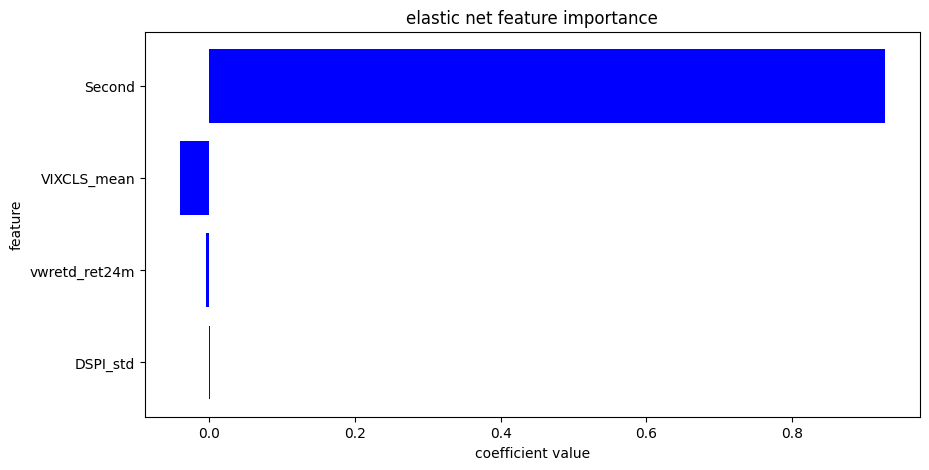

In [36]:
# to keep : 'NGDP', 'Second', 'vwretd_ret24m', 'VIXCLS_mean', 'DSPI_std'

to_drop2 = [ 'vwretd', 'vwretd_ret1m', 'vwretd_ret3m','vwretd_ret6m',  'mcap_crsp_dif_std', 'mcap_crsp_yoy_mean', 'mcap_crsp_yoy_std',
       'mcap_compustat_yoy_mean','mcap_compustat_yoy_std',  'prccq_dif_std', 'prccq_yoy_mean', 'prccq_yoy_std', 'prchq_dif_std',
       'prchq_yoy_mean', 'prchq_yoy_std',  'prclq_yoy_mean', 'shrout_yoy_mean', 'shrout_yoy_std','CSCICP03USM665S_mean',  'shrout_dif_mean',
        'UNRATE_mean', 'UNRATE_std', 'PCE_mean', 'PCE_std', 'M2SL_mean', 'M2SL_std','W068RCQ027SBEA_mean', 'NETEXP_mean',  'VIXCLS_std',
       'DGS10_mean', 'DGS10_std', 'T10Y2Y_mean','CSCICP03USM665S_std', 'DSPI_mean',  'mcap_crsp_dif_mean', 'mcap_compustat_dif_mean', 'prccq_dif_mean',
       'prchq_dif_mean', 'prclq_dif_mean', 'vwretd_ret12m']

results2 = train_elastic_net_bayesian(merged_macro_train.drop(to_drop2,axis=1), merged_macro_test.drop(to_drop2,axis=1),w=10,h=5)


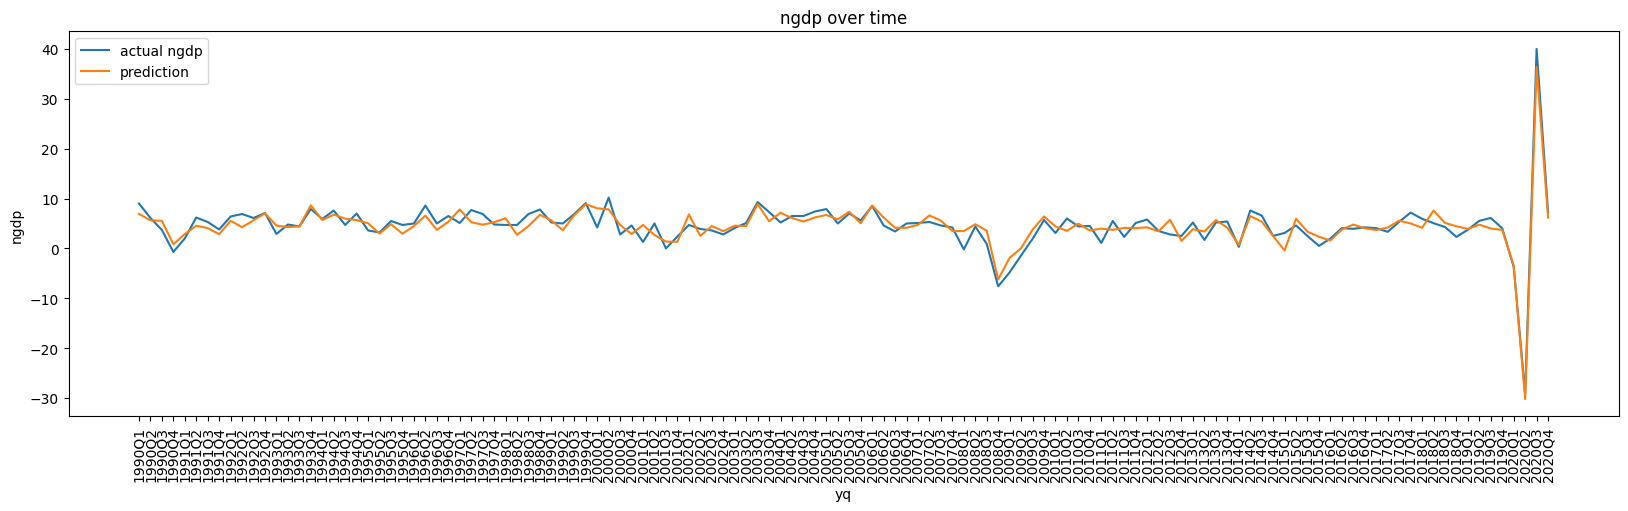

In [37]:
plot_ngdp_over_time(results2)

In [38]:
# retrieve coefficient

results2['feature_importance']

{'Second': 0.9268181861449342,
 'vwretd_ret24m': -0.004601219223515753,
 'VIXCLS_mean': -0.040122555532320844,
 'DSPI_std': 0.0008162558770177078}

The three selected variables—vwretd_ret24m, VIXCLS_mean, and DSPI_std—complement the BEA second estimate by capturing economic dimensions that are not fully reflected in the estimates. While the BEA second estimate is a strong predictor of final GDP, it primarily relies on historical economic data and may not fully incorporate forward-looking market sentiment, financial uncertainty, or income variability. By integrating these variables, the model enhances predictive accuracy by addressing potential gaps in the BEA estimate, effectively reducing RMSE on both seen and unseen data.

**vwretd_ret24m (24-Month Return on Value-Weighted Market Index)**

The negative coefficient suggests that high past medium-long term stock returns slightly lower future GDP growth, which could indicate that strong past market performance is often followed by slower GDP growth. When stock prices rise significantly over 24 months, it often reflects strong past economic growth, low interest rates, and high investor confidence. However, these booms are not indefinitely sustainable—eventually, corporate profits slow down, monetary policies tighten, and economic activity moderates, leading to slower GDP growth in subsequent periods,aligning with economic cycle theories - mean reversion. It captures business cycle effects (booms followed by slowdowns) and helps predict GDP turning points. However, it is worth noting that no definitive research has conclusively established a strong predictive relationship between stock market returns and GDP growth.

**VIXCLS_mean (Average Volatility Index)**

The CBOE Volatility Index (VIX), often called the "fear index", reflects expected market volatility over the next 30 days. A high VIX signals economic uncertainty, market distress, or financial instability, which can be early warning signs of GDP contractions. BEA estimates do not account for financial risk sentiment, which can significantly affect business investment, hiring, and consumer spending. The moderate negative coefficient suggests that higher market volatility correlates with lower GDP growth, which makes sense since uncertainty discourages economic activity.

**DSPI_std (Standard Deviation of Disposable Personal Income)**

Disposable personal income (DSPI) is a major driver of consumer spending, which accounts for a large portion of GDP. The standard deviation (DSPI_std) measures income variability—high variability indicates economic instability, while low variability suggests steady financial conditions. BEA estimates include aggregate income and spending data, but they do not explicitly measure income stability at the household level. During crises, income uncertainty rises due to layoffs, wage cuts, and government stimulus programs, affecting consumer behavior. Even if the average disposable income remains stable, its fluctuation may indicate underlying economic distress that traditional GDP estimates do not capture.


To further investigate why the three selected variables effectively reduce RMSE despite their small coefficients, we did another prediction by removing the year 2020 from the test set and evaluating the performance of both the baseline model (only using the BEA second estimate) and Model V2 (which includes the three additional variables) separately.

**Before including 2020:**

**Use only Second Estimate:**

train set result:

in-sample rmse: 1.5792

out-of-sample rmse: 1.2979

**Use Second Estimate + 3 additional variables:**

test set result:

in-sample rmse: 1.5652

out-of-sample rmse: 1.2923

**After including 2020:**

**Use only Second Estimate:**

train set result:

in-sample rmse: 1.5792

out-of-sample rmse: 1.5388

**Use Second Estimate + 3 additional variables:**

test set result:

in-sample rmse: 1.5652

out-of-sample rmse: 1.4530

The results reveal that when 2020 is excluded, the performance gap between the two models is relatively small, suggesting that under normal economic conditions, these three variables provide only marginal improvements over the BEA second estimate. However, when 2020 is included, which contains the COVID-19 shock, the model with the additional variables performs significantly better, with a much larger improvement in RMSE compared to the baseline model.

This suggests that while these variables may not be strong drivers of GDP growth in typical periods (hence their small coefficients), they are highly effective in capturing sharp fluctuations and economic disruptions, such as those caused by COVID-19. The BEA second estimate is a backward-looking measure that incorporates past economic data, whereas market-based indicators (vwretd_ret24m & VIXCLS_mean) and household income variability (DSPI_std) respond more immediately to external shocks, allowing the model to react faster and more accurately to sudden GDP downturns.

Thus, these variables do not strongly impact GDP in stable times but become highly valuable during crisis periods, helping the model adapt to extreme economic conditions that the BEA second estimate alone may not fully capture. This explains why their inclusion leads to substantial RMSE reductions despite small coefficient, especially when predicting GDP during times of heightened economic uncertainty.

---

**Model version 2**

**Model**: Elastic Net

**Variables**: BEA Second Estimate, 24-month return on value-weighted market index, average volatility index,standard deviation of disposable personal income

**Hyperparameters**: best alpha: 0.000197, best l1_ratio: 0.1162

**In-sample rmse**: 1.5652

**Out-of-sample rmse**: 1.4530

---

In [39]:
merged_macro_train2, merged_macro_test2 = drop_columns(merged_macro_train, merged_macro_test, to_drop2)

,YQ,NGDP,YEAR,QUARTER,Second,vwretd_ret24m,VIXCLS_mean,DSPI_std
0,1990Q1,9.000000,1990,1,7.008200,-1.909684,0.000000,22.989345
1,1990Q2,6.100000,1990,2,5.815300,64.435142,-3.452540,16.658631
2,1990Q3,3.700000,1990,3,5.802500,0.041937,6.473492,15.306970
3,1990Q4,-0.700000,1990,4,0.486900,-2.104573,0.917726,19.899832
4,1991Q1,2.000000,1991,1,2.512800,-1.841039,-3.597448,8.701724


,YQ,NGDP,YEAR,QUARTER,Second,vwretd_ret24m,VIXCLS_mean,DSPI_std
0,2016Q1,0,2016,1,1.432400,4.813879,3.452948,20.759897
1,2016Q2,0,2016,2,3.432500,1.754273,-4.810292,23.566289
2,2016Q3,0,2016,3,4.581800,-1.646096,-2.442031,47.557649
3,2016Q4,0,2016,4,3.915900,-2.409120,0.864030,53.564167
4,2017Q1,0,2017,1,3.396000,-1.143631,-2.406001,57.224325


## **4. Model V3 (Expert Estimates + Market Variables + Accounting Variables)**

We now include the final feature set—**accounting variables from Compustat**—to assess whether financial data can enhance GDP prediction, particularly during periods of economic shock.

### **1. Accounting Data (Compustat)**  

**Variables Considered**:  

- **Balance Sheet Variables**:  
  - Total Assets *(atq)*  
  - Total Liabilities *(ltq)*  
  - Shareholder Equity *(seqq)*  
  - Common Equity *(req)*  
  - Retained Earnings *(revtq)*  
  - Total Debt *(teqq)*  
  - Capital Expenditures *(capxy)*  

- **Profitability & Income Statement Variables**:  
  - Sales Revenue *(saleq)*  
  - Operating Income Before Depreciation *(oibdpq)*  
  - Net Income *(niq)*  
  - Earnings Before Interest & Taxes *(ibq)*  
  - Operating Income After Depreciation *(oiadpy)*  
  - Net Operating Profit *(nopiq)*  
  - Pretax Income *(piq)*  
  - Minority Interest *(miiq, mibtq)*  
  - Earnings Per Share (Basic & Diluted) *(epsx12, epsf12, epspiq, epspxq, epsfxq, epsfiq, epspxy, epsfiy)*  
  - Dividends *(dvpq, dvpsxq)*  

- **Leverage & Financing Variables**:  
  - Long-Term Debt *(ltq)*  
  - Capital Structure *(icaptq, tieq, mibq, cstkq, pstkq)*  
  - Interest Expense *(xintq)*  
  - Income Taxes *(txtq, xidoq)*  

- **Cash Flow & Liquidity Variables**:  
  - Cash & Short-Term Investments *(cheq, cshoq, cshprq, cshtrq, cshfdq, csh12q)*  
  - Depreciation & Amortization *(dpq)*  
  - Working Capital *(ncoq, rectq, rllq)*  

- **Operating & Expense Variables**:  
  - Cost of Goods Sold *(xoprq)*  
  - Selling, General & Administrative Expenses *(xsgaq)*  
  - Research & Development Expenses *(pllq)*  

**Data Availability**:  
Compustat quarterly data is updated daily, and we will use all available data as of the second month following the target quarter.  

**Data Source**:  
[WRDS - Compustat Fundamentals Quarterly](https://wrds-www.wharton.upenn.edu/pages/get-data/compustat-capital-iq-standard-poors/compustat/north-america-daily/fundamentals-quarterly/) *(downloadable in CSV form, but retrieved using the specified code below)*.

In [40]:
# This is the code that we used to get the accounting data. We then save it to our directory and load it for processing.

'''db = wrds.Connection()

df_sample = db.get_table(library='comp', table='fundq', obs=1)

columns_list = df_sample.columns.tolist()

print("Available columns in comp.fundq:")
print(columns_list)

query = """
SELECT c.gvkey, c.datadate, c.rdq, c.fyearq, c.fqtr, c.apq, c.capsq, c.cheq, c.csh12q, c.cshfdq, 
       c.cshoq, c.cshprq, c.cshtrq, c.cstkq, c.dpq, c.dvpq, c.dvpsxq, c.epsf12, 
       c.epsfiq, c.epsfxq, c.epspiq, c.epspxq, c.epsx12, c.ibq, c.icaptq, c.loq, 
       c.lseq, c.ltq, c.mibq, c.mibtq, c.miiq, c.ncoq, c.niq, c.nopiq, c.oibdpq, 
       c.piq, c.pllq, c.ppentq, c.pstkq, c.cshpry, c.epsfiy, c.epspxy, c.ibcomy, 
       c.iby, c.niy, c.nopiy, c.oiadpy, c.saley, c.rectq, c.req, c.rllq, c.saleq, 
       c.seqq, c.teqq, c.tieq, c.txtq, c.xidoq, c.xintq, c.xoprq, c.xsgaq,c.atq, c.revtq, c.ltq, c.capxy,
       s.permno, s.shrcd
FROM comp.fundq AS c
JOIN crsp.ccmxpf_lnkhist AS link 
    ON c.gvkey = link.gvkey
    AND c.datadate BETWEEN link.linkdt AND COALESCE(link.linkenddt, '9999-12-31')
JOIN crsp.stocknames AS s  -- Using stocknames to get shrcd
    ON link.lpermno = s.permno
WHERE s.shrcd IN (10, 11)  -- Only common stocks
AND c.datadate BETWEEN '1989-01-01' AND '2021-12-31'
ORDER BY c.datadate ASC

"""
df = db.raw_sql(query)

df['rdq'] = pd.to_datetime(df['rdq'])
df['datadate'] = pd.to_datetime(df['datadate'])

display(df.head())

df.to_csv("/kaggle/working/fundamental_data.csv", index=False)

print("DataFrame saved.")'''

'db = wrds.Connection()\n\ndf_sample = db.get_table(library=\'comp\', table=\'fundq\', obs=1)\n\ncolumns_list = df_sample.columns.tolist()\n\nprint("Available columns in comp.fundq:")\nprint(columns_list)\n\nquery = """\nSELECT c.gvkey, c.datadate, c.rdq, c.fyearq, c.fqtr, c.apq, c.capsq, c.cheq, c.csh12q, c.cshfdq, \n       c.cshoq, c.cshprq, c.cshtrq, c.cstkq, c.dpq, c.dvpq, c.dvpsxq, c.epsf12, \n       c.epsfiq, c.epsfxq, c.epspiq, c.epspxq, c.epsx12, c.ibq, c.icaptq, c.loq, \n       c.lseq, c.ltq, c.mibq, c.mibtq, c.miiq, c.ncoq, c.niq, c.nopiq, c.oibdpq, \n       c.piq, c.pllq, c.ppentq, c.pstkq, c.cshpry, c.epsfiy, c.epspxy, c.ibcomy, \n       c.iby, c.niy, c.nopiy, c.oiadpy, c.saley, c.rectq, c.req, c.rllq, c.saleq, \n       c.seqq, c.teqq, c.tieq, c.txtq, c.xidoq, c.xintq, c.xoprq, c.xsgaq,c.atq, c.revtq, c.ltq, c.capxy,\n       s.permno, s.shrcd\nFROM comp.fundq AS c\nJOIN crsp.ccmxpf_lnkhist AS link \n    ON c.gvkey = link.gvkey\n    AND c.datadate BETWEEN link.linkdt AND COA

Load the data

In [41]:
fundata = pd.read_csv("/kaggle/input/fundamental-dataacct/fundamental_data.csv")
fundata.head()

,gvkey,datadate,rdq,fyearq,fqtr,apq,capsq,cheq,csh12q,cshfdq,cshoq,cshprq,cshtrq,cstkq,dpq,dvpq,dvpsxq,epsf12,epsfiq,epsfxq,epspiq,epspxq,epsx12,ibq,icaptq,loq,lseq,ltq,mibq,mibtq,miiq,ncoq,niq,nopiq,oibdpq,piq,pllq,ppentq,pstkq,cshpry,epsfiy,epspxy,ibcomy,iby,niy,nopiy,oiadpy,saley,rectq,req,rllq,saleq,seqq,teqq,tieq,txtq,xidoq,xintq,xoprq,xsgaq,atq,revtq,ltq.1,capxy,permno,shrcd
0,4072,1989-01-31,1989-02-27,1989,2.000000,11.139000,4.772000,32.240000,22.249000,NaN,22.274000,22.269000,7101000.000000,1.114000,0.886000,0.000000,0.000000,NaN,0.220000,0.220000,0.220000,0.220000,0.800000,4.821000,66.089000,0.000000,85.767000,19.678000,0.000000,0.000000,0.000000,NaN,4.821000,0.583000,7.929000,7.626000,NaN,24.932000,0.000000,22.264000,0.450000,0.450000,NaN,NaN,NaN,NaN,14.691000,NaN,0.000000,60.203000,NaN,63.054000,66.089000,NaN,NaN,2.805000,0.000000,0.000000,55.125000,17.163000,85.767000,63.054000,19.678000,5.125000,30737,11
1,8475,1989-01-31,1989-03-28,1988,4.000000,41.809000,27.686000,20.007000,55.431000,NaN,54.603000,55.456000,5425300.000000,54.653000,4.914000,0.000000,0.025000,NaN,0.180000,0.180000,0.180000,0.180000,0.680000,10.074000,462.652000,0.000000,581.804000,306.151000,0.000000,0.000000,0.000000,NaN,10.074000,1.862000,22.347000,16.012000,NaN,416.108000,0.000000,55.431000,0.760000,0.680000,NaN,NaN,NaN,NaN,65.899000,NaN,2.634000,193.939000,NaN,168.067000,275.653000,NaN,NaN,5.938000,0.000000,3.283000,145.720000,42.607000,581.804000,168.067000,306.151000,123.189000,35238,11
2,2897,1989-01-31,1989-02-23,1989,1.000000,1.053000,1.818000,0.096000,3.198000,NaN,3.062000,3.201000,330300.000000,3.078000,0.108000,0.000000,0.000000,NaN,0.030000,0.030000,0.030000,0.030000,0.030000,0.083000,6.243000,0.000000,9.624000,3.381000,0.000000,0.000000,0.000000,NaN,0.083000,0.000000,0.287000,0.116000,NaN,0.934000,0.000000,3.201000,0.030000,0.030000,0.083000,0.083000,0.083000,0.000000,0.179000,7.247000,5.383000,1.347000,NaN,7.247000,6.243000,NaN,NaN,0.033000,0.000000,0.063000,6.960000,1.300000,9.624000,7.247000,3.381000,0.059000,50366,10
3,8439,1989-01-31,1989-04-02,1988,4.000000,94.348000,34.156000,42.072000,4.132000,NaN,5.134000,5.134000,160000.000000,6.417000,6.857000,0.011000,0.000000,NaN,NaN,NaN,-0.630000,-0.630000,-2.210000,-3.198000,581.730000,9.710000,743.311000,684.829000,25.900000,25.900000,NaN,NaN,-3.198000,-0.518000,20.421000,-3.639000,NaN,278.691000,0.550000,4.132000,NaN,-2.210000,NaN,NaN,NaN,NaN,40.843000,NaN,34.137000,-8.541000,NaN,440.387000,32.582000,NaN,NaN,-0.441000,0.000000,18.628000,419.966000,65.511000,743.311000,440.387000,684.829000,21.638000,75310,11
4,3084,1989-01-31,1989-03-22,1988,4.000000,15.208000,65.835000,10.016000,11.374000,NaN,17.107000,13.450000,660500.000000,1.779000,NaN,3.414000,0.000000,NaN,1.850000,-0.510000,1.850000,-0.510000,-1.720000,-3.411000,94.929000,13.860000,154.120000,162.492000,8.543000,8.543000,NaN,NaN,28.250000,NaN,NaN,NaN,NaN,46.399000,89.565000,11.374000,1.040000,-1.720000,NaN,-5.936000,25.426000,1.357000,5.055000,179.359000,16.842000,-170.314000,NaN,39.080000,-16.915000,NaN,NaN,NaN,31.661000,NaN,NaN,NaN,154.120000,39.080000,162.492000,9.308000,60417,11


We will use the **Report Date of Quarterly Earnings (rdq)** as the key for merging. To prepare the data, we first **drop missing values** in the `rdq` column, **split the date into 'YEAR' and 'QUARTER'**, and **remove duplicates**. After processing, we will review the total number of rows and inspect the first few records to ensure correctness.

In [42]:
fundata.dropna(subset=['rdq'],inplace=True)
fundata2 = split_obs_date(fundata, date_column ='rdq')
fundata2.drop_duplicates(inplace=True)

print(fundata2.shape)
display(fundata2.head())

(630997, 67)


,gvkey,datadate,fyearq,fqtr,apq,capsq,cheq,csh12q,cshfdq,cshoq,cshprq,cshtrq,cstkq,dpq,dvpq,dvpsxq,epsf12,epsfiq,epsfxq,epspiq,epspxq,epsx12,ibq,icaptq,loq,lseq,ltq,mibq,mibtq,miiq,ncoq,niq,nopiq,oibdpq,piq,pllq,ppentq,pstkq,cshpry,epsfiy,epspxy,ibcomy,iby,niy,nopiy,oiadpy,saley,rectq,req,rllq,saleq,seqq,teqq,tieq,txtq,xidoq,xintq,xoprq,xsgaq,atq,revtq,ltq.1,capxy,permno,shrcd,YEAR,QUARTER
0,4072,1989-01-31,1989,2.000000,11.139000,4.772000,32.240000,22.249000,NaN,22.274000,22.269000,7101000.000000,1.114000,0.886000,0.000000,0.000000,NaN,0.220000,0.220000,0.220000,0.220000,0.800000,4.821000,66.089000,0.000000,85.767000,19.678000,0.000000,0.000000,0.000000,NaN,4.821000,0.583000,7.929000,7.626000,NaN,24.932000,0.000000,22.264000,0.450000,0.450000,NaN,NaN,NaN,NaN,14.691000,NaN,0.000000,60.203000,NaN,63.054000,66.089000,NaN,NaN,2.805000,0.000000,0.000000,55.125000,17.163000,85.767000,63.054000,19.678000,5.125000,30737,11,1989,1
1,8475,1989-01-31,1988,4.000000,41.809000,27.686000,20.007000,55.431000,NaN,54.603000,55.456000,5425300.000000,54.653000,4.914000,0.000000,0.025000,NaN,0.180000,0.180000,0.180000,0.180000,0.680000,10.074000,462.652000,0.000000,581.804000,306.151000,0.000000,0.000000,0.000000,NaN,10.074000,1.862000,22.347000,16.012000,NaN,416.108000,0.000000,55.431000,0.760000,0.680000,NaN,NaN,NaN,NaN,65.899000,NaN,2.634000,193.939000,NaN,168.067000,275.653000,NaN,NaN,5.938000,0.000000,3.283000,145.720000,42.607000,581.804000,168.067000,306.151000,123.189000,35238,11,1989,1
2,2897,1989-01-31,1989,1.000000,1.053000,1.818000,0.096000,3.198000,NaN,3.062000,3.201000,330300.000000,3.078000,0.108000,0.000000,0.000000,NaN,0.030000,0.030000,0.030000,0.030000,0.030000,0.083000,6.243000,0.000000,9.624000,3.381000,0.000000,0.000000,0.000000,NaN,0.083000,0.000000,0.287000,0.116000,NaN,0.934000,0.000000,3.201000,0.030000,0.030000,0.083000,0.083000,0.083000,0.000000,0.179000,7.247000,5.383000,1.347000,NaN,7.247000,6.243000,NaN,NaN,0.033000,0.000000,0.063000,6.960000,1.300000,9.624000,7.247000,3.381000,0.059000,50366,10,1989,1
3,8439,1989-01-31,1988,4.000000,94.348000,34.156000,42.072000,4.132000,NaN,5.134000,5.134000,160000.000000,6.417000,6.857000,0.011000,0.000000,NaN,NaN,NaN,-0.630000,-0.630000,-2.210000,-3.198000,581.730000,9.710000,743.311000,684.829000,25.900000,25.900000,NaN,NaN,-3.198000,-0.518000,20.421000,-3.639000,NaN,278.691000,0.550000,4.132000,NaN,-2.210000,NaN,NaN,NaN,NaN,40.843000,NaN,34.137000,-8.541000,NaN,440.387000,32.582000,NaN,NaN,-0.441000,0.000000,18.628000,419.966000,65.511000,743.311000,440.387000,684.829000,21.638000,75310,11,1989,2
4,3084,1989-01-31,1988,4.000000,15.208000,65.835000,10.016000,11.374000,NaN,17.107000,13.450000,660500.000000,1.779000,NaN,3.414000,0.000000,NaN,1.850000,-0.510000,1.850000,-0.510000,-1.720000,-3.411000,94.929000,13.860000,154.120000,162.492000,8.543000,8.543000,NaN,NaN,28.250000,NaN,NaN,NaN,NaN,46.399000,89.565000,11.374000,1.040000,-1.720000,NaN,-5.936000,25.426000,1.357000,5.055000,179.359000,16.842000,-170.314000,NaN,39.080000,-16.915000,NaN,NaN,NaN,31.661000,NaN,NaN,NaN,154.120000,39.080000,162.492000,9.308000,60417,11,1989,1


We merge the NGDP column from file2 with the processed accounting dataset. This allows us to apply the **`data_overview`** function and assess the relationship between accounting variables and NGDP.

In [43]:
fundata3 = file2[["YEAR","QUARTER","YQ","NGDP"]].merge(fundata2,on=["YEAR","QUARTER"],how="left")
display(fundata3.head())

,YEAR,QUARTER,YQ,NGDP,gvkey,datadate,fyearq,fqtr,apq,capsq,cheq,csh12q,cshfdq,cshoq,cshprq,cshtrq,cstkq,dpq,dvpq,dvpsxq,epsf12,epsfiq,epsfxq,epspiq,epspxq,epsx12,ibq,icaptq,loq,lseq,ltq,mibq,mibtq,miiq,ncoq,niq,nopiq,oibdpq,piq,pllq,ppentq,pstkq,cshpry,epsfiy,epspxy,ibcomy,iby,niy,nopiy,oiadpy,saley,rectq,req,rllq,saleq,seqq,teqq,tieq,txtq,xidoq,xintq,xoprq,xsgaq,atq,revtq,ltq.1,capxy,permno,shrcd
0,1965,3,1965Q3,10.880600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1965,4,1965Q4,12.621500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1966,1,1966Q1,12.915400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1966,2,1966Q2,4.757700,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1966,3,1966Q3,7.454400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We split the dataset into train and test sets (as required by the data_overview function), including extra years to prevent too many missing values resulted from percentage change calculations. Finally, we verify the years in both sets.

In [44]:
train_acct = fundata3.loc[(fundata3['YEAR']>=1989) & (fundata3['YEAR']<=2015),:].drop('datadate',axis=1)
test_acct = fundata3.loc[(fundata3['YEAR']>=2015) & (fundata3['YEAR']<=2020),:].drop('datadate',axis=1)

print(train_acct['YEAR'].unique())
print(test_acct['YEAR'].unique())

[1989 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002
 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015]
[2015 2016 2017 2018 2019 2020]


Apply data_overview function on train test set to see the statistics of the accounting variables

In [45]:
_, num_stats_df =  data_overview(train_acct.drop(['YEAR','QUARTER','YQ'],axis=1), test_acct.drop(['YEAR','QUARTER','YQ'],axis=1),\
                                            target_column="NGDP",remove_duplicates=False)

Data types categorizing...
Checking for duplicates...
No duplicates.
Creating Stats DataFrame...

Target column 'NGDP' statistics:
count   536076.000000
mean         4.794054
std          2.642934
min         -7.581600
25%          3.643500
50%          4.975500
75%          6.506900
max         10.185300
Name: NGDP, dtype: float64
Stats DataFrame is created.


We drop the accounting variables with missing values more than 15% in either train or test set

In [46]:
high_na = num_stats_df.loc[(num_stats_df['Train_Missing_val%']>=15) | (num_stats_df['Test_Missing_val%']>=15),:]['Feature']
print(high_na)

train_df_acct2, test_df_acct2 = drop_columns(train_acct, test_acct, high_na)

0       ncoq
1       rllq
2       pllq
3       tieq
4       teqq
5     cshfdq
6     epsf12
7     ibcomy
8      xintq
9      xsgaq
10     nopiy
11     saley
Name: Feature, dtype: object


,YEAR,QUARTER,YQ,NGDP,gvkey,fyearq,fqtr,apq,capsq,cheq,csh12q,cshoq,cshprq,cshtrq,cstkq,dpq,dvpq,dvpsxq,epsfiq,epsfxq,epspiq,epspxq,epsx12,ibq,icaptq,loq,lseq,ltq,mibq,mibtq,miiq,niq,nopiq,oibdpq,piq,ppentq,pstkq,cshpry,epsfiy,epspxy,iby,niy,oiadpy,rectq,req,saleq,seqq,txtq,xidoq,xoprq,atq,revtq,ltq.1,capxy,permno,shrcd
94,1989,1,1989Q1,8.543100,4072.000000,1989.000000,2.000000,11.139000,4.772000,32.240000,22.249000,22.274000,22.269000,7101000.000000,1.114000,0.886000,0.000000,0.000000,0.220000,0.220000,0.220000,0.220000,0.800000,4.821000,66.089000,0.000000,85.767000,19.678000,0.000000,0.000000,0.000000,4.821000,0.583000,7.929000,7.626000,24.932000,0.000000,22.264000,0.450000,0.450000,NaN,NaN,14.691000,0.000000,60.203000,63.054000,66.089000,2.805000,0.000000,55.125000,85.767000,63.054000,19.678000,5.125000,30737.000000,11.000000
95,1989,1,1989Q1,8.543100,8475.000000,1988.000000,4.000000,41.809000,27.686000,20.007000,55.431000,54.603000,55.456000,5425300.000000,54.653000,4.914000,0.000000,0.025000,0.180000,0.180000,0.180000,0.180000,0.680000,10.074000,462.652000,0.000000,581.804000,306.151000,0.000000,0.000000,0.000000,10.074000,1.862000,22.347000,16.012000,416.108000,0.000000,55.431000,0.760000,0.680000,NaN,NaN,65.899000,2.634000,193.939000,168.067000,275.653000,5.938000,0.000000,145.720000,581.804000,168.067000,306.151000,123.189000,35238.000000,11.000000
96,1989,1,1989Q1,8.543100,2897.000000,1989.000000,1.000000,1.053000,1.818000,0.096000,3.198000,3.062000,3.201000,330300.000000,3.078000,0.108000,0.000000,0.000000,0.030000,0.030000,0.030000,0.030000,0.030000,0.083000,6.243000,0.000000,9.624000,3.381000,0.000000,0.000000,0.000000,0.083000,0.000000,0.287000,0.116000,0.934000,0.000000,3.201000,0.030000,0.030000,0.083000,0.083000,0.179000,5.383000,1.347000,7.247000,6.243000,0.033000,0.000000,6.960000,9.624000,7.247000,3.381000,0.059000,50366.000000,10.000000
97,1989,1,1989Q1,8.543100,3084.000000,1988.000000,4.000000,15.208000,65.835000,10.016000,11.374000,17.107000,13.450000,660500.000000,1.779000,NaN,3.414000,0.000000,1.850000,-0.510000,1.850000,-0.510000,-1.720000,-3.411000,94.929000,13.860000,154.120000,162.492000,8.543000,8.543000,NaN,28.250000,NaN,NaN,NaN,46.399000,89.565000,11.374000,1.040000,-1.720000,-5.936000,25.426000,5.055000,16.842000,-170.314000,39.080000,-16.915000,NaN,31.661000,NaN,154.120000,39.080000,162.492000,9.308000,60417.000000,11.000000
98,1989,1,1989Q1,8.543100,10982.000000,1989.000000,1.000000,2.616000,25.012000,21.614000,4.318000,4.322000,4.320000,312600.000000,0.053000,0.451000,0.341000,0.000000,0.080000,-0.020000,0.080000,-0.020000,0.050000,0.288000,47.880000,0.000000,59.354000,34.083000,0.000000,0.000000,0.000000,0.679000,0.078000,1.704000,0.441000,20.202000,0.011000,4.320000,0.080000,-0.020000,0.288000,0.679000,1.253000,3.622000,11.199000,5.663000,25.271000,0.153000,0.391000,3.959000,59.354000,5.663000,34.083000,0.529000,66341.000000,11.000000


,YEAR,QUARTER,YQ,NGDP,gvkey,fyearq,fqtr,apq,capsq,cheq,csh12q,cshoq,cshprq,cshtrq,cstkq,dpq,dvpq,dvpsxq,epsfiq,epsfxq,epspiq,epspxq,epsx12,ibq,icaptq,loq,lseq,ltq,mibq,mibtq,miiq,niq,nopiq,oibdpq,piq,ppentq,pstkq,cshpry,epsfiy,epspxy,iby,niy,oiadpy,rectq,req,saleq,seqq,txtq,xidoq,xoprq,atq,revtq,ltq.1,capxy,permno,shrcd
520546,2015,1,2015Q1,3.424100,233491.000000,2013.000000,4.000000,75.059000,116.222000,153.610000,35.232000,34.048000,34.481000,17897413.000000,0.406000,7.750000,0.000000,0.000000,-0.640000,-0.640000,-0.640000,-0.640000,-1.820000,-22.197000,305.464000,157.631000,625.190000,543.649000,0.000000,0.000000,0.000000,-22.197000,16.324000,-19.668000,-20.939000,254.297000,0.000000,35.232000,-1.820000,-1.820000,-64.203000,-64.203000,-17.161000,84.909000,55.831000,175.510000,81.541000,1.258000,0.000000,195.178000,625.190000,175.510000,543.649000,42.483000,12629.000000,11.000000
520547,2015,1,2015Q1,3.424100,233491.000000,2014.000000,1.000000,73.682000,116.906000,104.772000,34.863000,34.056000,34.053000,23940821.000000,0.406000,7.268000,0.000000,0.000000,-0.630000,-0.630000,-0.630000,-0.630000,-1.960000,-21.605000,289.668000,155.226000,608.043000,542.326000,0.000000,0.000000,0.000000,-21.605000,-8.845000,-0.619000,-20.802000,251.584000,0.000000,34.053000,-0.630000,-0.630000,-21.605000,-21.605000,-7.887000,110.955000,39.323000,164.164000,65.717000,0.803000,0.000000,164.783000,608.043000,164.164000,542.326000,6.259000,12629.000000,11.000000
520548,2015,1,2015Q1,3.424100,28380.000000,2014.000000,2.000000,15.712000,228.502000,74.167000,18.222300,18.535000,18.445000,12087112.000000,1.854000,5.913000,0.000000,0.000000,-0.040000,0.180000,-0.040000,0.180000,-1.370000,3.266000,325.211000,12.367000,433.997000,128.786000,0.000000,NaN,NaN,-0.683000,0.363000,14.944000,6.575000,51.082000,0.000000,18.322000,-0.170000,0.070000,1.318000,-3.191000,17.308000,63.322000,74.855000,100.985000,305.211000,3.309000,-3.949000,86.041000,433.997000,100.985000,128.786000,6.138000,78756.000000,11.000000
520549,2015,1,2015Q1,3.424100,144383.000000,2014.000000,2.000000,3.025000,50.097000,5.728000,29.723000,29.723000,29.723000,1248728.000000,0.030000,0.704000,0.000000,0.000000,-3.090000,-3.090000,-3.090000,-3.090000,-4.020000,-91.725000,7.788000,0.000000,162.562000,154.774000,0.000000,0.355000,0.000000,-91.725000,0.426000,-90.716000,-91.725000,36.745000,0.000000,29.723000,-3.090000,-3.090000,-91.725000,-91.725000,-91.420000,93.825000,-42.694000,98.851000,7.433000,0.000000,0.000000,189.567000,162.562000,98.851000,154.774000,0.000000,92990.000000,11.000000
520550,2015,1,2015Q1,3.424100,18144.000000,2014.000000,2.000000,0.000000,59.393000,11.389000,10.756000,12.247000,11.316000,5014561.000000,0.012000,0.028000,0.000000,0.000000,-1.520000,-1.520000,-1.520000,-1.520000,-1.150000,-17.193000,74.872000,5.355000,101.168000,26.296000,0.000000,0.000000,0.000000,-17.193000,0.129000,-17.144000,-17.366000,0.197000,0.000000,10.936000,-1.470000,-1.470000,-16.099000,-16.099000,-15.706000,79.572000,15.467000,1.774000,74.872000,-0.173000,0.000000,18.918000,101.168000,1.774000,26.296000,0.015000,14093.000000,11.000000


Next, we generate the statistics again to identify the predictors that have high correlation with other predictors but low correlation with NGDP, which we will remove from our dataset

In [47]:
_, num_stats_df =  data_overview(train_df_acct2.drop(['YEAR','QUARTER','YQ'],axis=1), test_df_acct2.drop(['YEAR','QUARTER','YQ'],axis=1),\
                                            target_column="NGDP",remove_duplicates=False)

Data types categorizing...
Checking for duplicates...
No duplicates.
Creating Stats DataFrame...

Target column 'NGDP' statistics:
count   536076.000000
mean         4.794054
std          2.642934
min         -7.581600
25%          3.643500
50%          4.975500
75%          6.506900
max         10.185300
Name: NGDP, dtype: float64
Stats DataFrame is created.


In [48]:
# These are all the predictors that have high correlation with other predictors but low correlation with NGDP

extracted_features = extract_highly_correlated_features(num_stats_df)
print(extracted_features)

['iby', 'revtq', 'cshoq', 'piq', 'epspxy', 'epspxq', 'epspiq', 'niq', 'csh12q']


In [49]:
# Remove those predictors and as usual, assign to new variable to prevent accidental overwrite and the need to rerun

extracted_list = [ 'revtq','iby', 'cshoq', 'piq', 'epspxy', 'epspxq', 'epspiq', 'niq', 'csh12q','rectq',\
                  'xoprq','cshpry','atq','ltq','ltq.1','permno','shrcd','revtq','oiadpy']

train_df_acct3, test_df_acct3 = drop_columns(train_df_acct2, test_df_acct2, extracted_list)


,YEAR,QUARTER,YQ,NGDP,gvkey,fyearq,fqtr,apq,capsq,cheq,cshprq,cshtrq,cstkq,dpq,dvpq,dvpsxq,epsfiq,epsfxq,epsx12,ibq,icaptq,loq,lseq,mibq,mibtq,miiq,nopiq,oibdpq,ppentq,pstkq,epsfiy,niy,req,saleq,seqq,txtq,xidoq,capxy
94,1989,1,1989Q1,8.543100,4072.000000,1989.000000,2.000000,11.139000,4.772000,32.240000,22.269000,7101000.000000,1.114000,0.886000,0.000000,0.000000,0.220000,0.220000,0.800000,4.821000,66.089000,0.000000,85.767000,0.000000,0.000000,0.000000,0.583000,7.929000,24.932000,0.000000,0.450000,NaN,60.203000,63.054000,66.089000,2.805000,0.000000,5.125000
95,1989,1,1989Q1,8.543100,8475.000000,1988.000000,4.000000,41.809000,27.686000,20.007000,55.456000,5425300.000000,54.653000,4.914000,0.000000,0.025000,0.180000,0.180000,0.680000,10.074000,462.652000,0.000000,581.804000,0.000000,0.000000,0.000000,1.862000,22.347000,416.108000,0.000000,0.760000,NaN,193.939000,168.067000,275.653000,5.938000,0.000000,123.189000
96,1989,1,1989Q1,8.543100,2897.000000,1989.000000,1.000000,1.053000,1.818000,0.096000,3.201000,330300.000000,3.078000,0.108000,0.000000,0.000000,0.030000,0.030000,0.030000,0.083000,6.243000,0.000000,9.624000,0.000000,0.000000,0.000000,0.000000,0.287000,0.934000,0.000000,0.030000,0.083000,1.347000,7.247000,6.243000,0.033000,0.000000,0.059000
97,1989,1,1989Q1,8.543100,3084.000000,1988.000000,4.000000,15.208000,65.835000,10.016000,13.450000,660500.000000,1.779000,NaN,3.414000,0.000000,1.850000,-0.510000,-1.720000,-3.411000,94.929000,13.860000,154.120000,8.543000,8.543000,NaN,NaN,NaN,46.399000,89.565000,1.040000,25.426000,-170.314000,39.080000,-16.915000,NaN,31.661000,9.308000
98,1989,1,1989Q1,8.543100,10982.000000,1989.000000,1.000000,2.616000,25.012000,21.614000,4.320000,312600.000000,0.053000,0.451000,0.341000,0.000000,0.080000,-0.020000,0.050000,0.288000,47.880000,0.000000,59.354000,0.000000,0.000000,0.000000,0.078000,1.704000,20.202000,0.011000,0.080000,0.679000,11.199000,5.663000,25.271000,0.153000,0.391000,0.529000


,YEAR,QUARTER,YQ,NGDP,gvkey,fyearq,fqtr,apq,capsq,cheq,cshprq,cshtrq,cstkq,dpq,dvpq,dvpsxq,epsfiq,epsfxq,epsx12,ibq,icaptq,loq,lseq,mibq,mibtq,miiq,nopiq,oibdpq,ppentq,pstkq,epsfiy,niy,req,saleq,seqq,txtq,xidoq,capxy
520546,2015,1,2015Q1,3.424100,233491.000000,2013.000000,4.000000,75.059000,116.222000,153.610000,34.481000,17897413.000000,0.406000,7.750000,0.000000,0.000000,-0.640000,-0.640000,-1.820000,-22.197000,305.464000,157.631000,625.190000,0.000000,0.000000,0.000000,16.324000,-19.668000,254.297000,0.000000,-1.820000,-64.203000,55.831000,175.510000,81.541000,1.258000,0.000000,42.483000
520547,2015,1,2015Q1,3.424100,233491.000000,2014.000000,1.000000,73.682000,116.906000,104.772000,34.053000,23940821.000000,0.406000,7.268000,0.000000,0.000000,-0.630000,-0.630000,-1.960000,-21.605000,289.668000,155.226000,608.043000,0.000000,0.000000,0.000000,-8.845000,-0.619000,251.584000,0.000000,-0.630000,-21.605000,39.323000,164.164000,65.717000,0.803000,0.000000,6.259000
520548,2015,1,2015Q1,3.424100,28380.000000,2014.000000,2.000000,15.712000,228.502000,74.167000,18.445000,12087112.000000,1.854000,5.913000,0.000000,0.000000,-0.040000,0.180000,-1.370000,3.266000,325.211000,12.367000,433.997000,0.000000,NaN,NaN,0.363000,14.944000,51.082000,0.000000,-0.170000,-3.191000,74.855000,100.985000,305.211000,3.309000,-3.949000,6.138000
520549,2015,1,2015Q1,3.424100,144383.000000,2014.000000,2.000000,3.025000,50.097000,5.728000,29.723000,1248728.000000,0.030000,0.704000,0.000000,0.000000,-3.090000,-3.090000,-4.020000,-91.725000,7.788000,0.000000,162.562000,0.000000,0.355000,0.000000,0.426000,-90.716000,36.745000,0.000000,-3.090000,-91.725000,-42.694000,98.851000,7.433000,0.000000,0.000000,0.000000
520550,2015,1,2015Q1,3.424100,18144.000000,2014.000000,2.000000,0.000000,59.393000,11.389000,11.316000,5014561.000000,0.012000,0.028000,0.000000,0.000000,-1.520000,-1.520000,-1.150000,-17.193000,74.872000,5.355000,101.168000,0.000000,0.000000,0.000000,0.129000,-17.144000,0.197000,0.000000,-1.470000,-16.099000,15.467000,1.774000,74.872000,-0.173000,0.000000,0.015000


Look at the statistics again to see if further cleaning is required

In [50]:
cat_stats_df, num_stats_df =  data_overview(train_df_acct3.drop(['YEAR','QUARTER','YQ'],axis=1), test_df_acct3.drop(['YEAR','QUARTER','YQ'],axis=1),\
                                            target_column="NGDP",remove_duplicates=False)
num_stats_df.sort_values("Correlation_with_Target",ascending=False)

Data types categorizing...
Checking for duplicates...
Duplicates exist: 17524
Creating Stats DataFrame...

Target column 'NGDP' statistics:
count   536076.000000
mean         4.794054
std          2.642934
min         -7.581600
25%          3.643500
50%          4.975500
75%          6.506900
max         10.185300
Name: NGDP, dtype: float64
Stats DataFrame is created.


,Feature,Highest_Corr_Feature,Highest_Corr_Value,Correlation_with_Target,Outliers_No,Outliers_%,Train_Missing_val%,Test_Missing_val%,Mode,Mode%,Min,Median,Mean,Max,Std,Var,Range,LowerB,UpperB
32,NGDP,ibq,0.006419,1.000000,17255,3.000000,0.000000,0.000000,4.737600,0.013114,-7.581600,4.975500,4.794054,10.185300,2.642934,6.985100,17.766900,-0.651600,10.802000
26,ibq,niy,0.806505,0.006419,109992,21.000000,0.190000,0.140000,0.000000,0.000458,-61659.000000,1.135000,25.438160,22628.000000,313.557527,98318.322851,84287.000000,-14.874500,23.345500
13,nopiq,ppentq,0.292806,0.006388,151503,28.000000,1.350000,1.080000,0.000000,0.126539,-12321.000000,0.044000,0.205426,8118.000000,97.113865,9431.102724,20439.000000,-0.879500,1.428500
15,epsfiq,epsfxq,0.810292,0.003143,52325,10.000000,1.110000,0.220000,0.010000,0.020929,-2973.000000,0.120000,0.382875,13679.000000,32.333528,1045.457010,16652.000000,-0.680000,1.000000
14,epsfxq,epsfiq,0.810292,0.003050,48885,9.000000,1.190000,0.230000,0.010000,0.021156,-2973.000000,0.120000,0.359004,13397.000000,26.208364,686.878327,16370.000000,-0.680000,1.000000
24,xidoq,niy,0.175121,0.000253,78976,15.000000,0.210000,0.160000,0.000000,0.852367,-54236.000000,0.000000,-0.244766,24441.000000,115.977539,13450.789595,78677.000000,0.000000,0.000000
12,epsx12,epsfiy,0.710882,-0.000708,42713,8.000000,1.460000,1.130000,0.010000,0.004640,-30024.250000,0.480000,1.246473,21683.000000,86.946840,7559.753006,51707.250000,-2.655000,3.865000
16,epsfiy,epsfxq,0.728635,-0.001379,59266,11.000000,1.030000,0.230000,0.010000,0.011763,-2024.960000,0.230000,0.925059,24656.000000,61.708650,3807.957504,26680.960000,-1.440000,2.160000
1,miiq,mibtq,0.705500,-0.004990,74192,14.000000,10.810000,3.860000,0.000000,0.844835,-4092.000000,0.000000,0.800628,3346.000000,25.488261,649.651439,7438.000000,0.000000,0.000000
30,dvpsxq,ppentq,0.093316,-0.006657,75429,14.000000,0.030000,0.050000,0.000000,0.673077,0.000000,0.000000,0.067004,125.750000,0.379740,0.144203,125.750000,-0.093750,0.156250


Categorize all the variables into balance_sheet_cols and income_statement_cols. 

For balance sheet variables, we will group them by company ID, and do forward fill and backward fill.
For income statement variables, we will group them by both company ID and financial year, and do forward fill and backward fill.

Both are sorted before filling the missing values.

In [51]:
balance_sheet_cols = [
    
    "ppentq",  # Property, Plant & Equipment (Net) 
    "cheq",  # Cash & Equivalents
    "cshprq",  # Cash & Short-Term Investments
    "cshtrq",  # Cash Trading Securities (short-term, highly liquid investments that a company holds for trading purposes)

    "apq",  # Accounts Payable
    "loq",  # Liabilities & Owners' Equity == Total Assets (incl. sole proprietorships, partnerships)
    "lseq",  # Liabilities & Stockholders' Equity == Total Assets (excl. sole proprietorships, partnerships)

    "capsq",  # Capital Stock (maximum shares a company is allowed to issue but not necessarily what has been issued)
    "cstkq",  # Common Stock (The value of issued common shares, based on par value (not market value). This is a subset of capital stock)
    "icaptq",  # Invested Capital (The total capital provided by investors, including both equity and long-term debt.)
    "seqq",  # Stockholders' Equity (The net worth of a corporation, calculated as total assets - total liabilities.)
    "pstkq",  # Preferred Stock
    "req",  # Retained Earnings
    
    "mibq",  # Minority Interest in Balance Sheet (The amount of equity minority shareholders own in a subsidiary, a point-in-time value)
    "mibtq"  # Minority Interest in Total ( may include cumulative income contributions over time)

]


income_statement_cols = [
    "dpq",  # Depreciation & Amortization
    "txtq",  # Total Income Tax
    "capxy",  # Capital Expenditures (Often a cash flow item but affects depreciation & assets)
    "dvpq",  # Dividends Paid
    
    "dvpsxq",  # Dividends per Share (Diluted)
    "epsfiq",  # Earnings per Share (Fully Diluted, Incl. Extraordinary Items)
    "epsfxq",  # Earnings per Share (Excluding Extraordinary Items)
    "epsx12",  # Earnings per Share (Trailing 12 Months)
    "epsfiy",  # Earnings per Share (Fully Diluted, Annual) 

    "saleq",  # Sales/Revenue
    "oibdpq",  # Operating Income Before Depreciation
    "niy",  # Net Income (Annual)
    "nopiq",  # Net Operating Income
    "miiq",  # Minority Interest Income
    "ibq",  # Income Before Extraordinary Items
    "xidoq"  # Extraordinary Items & Discontinued Operations 
]

In [52]:
train_acct4, test_acct4 = fill_missing_values(train_df_acct3, test_df_acct3, balance_sheet_cols, ['gvkey'])

train_acct4, test_acct4 = fill_missing_values(train_acct4, test_acct4, income_statement_cols, ['gvkey', 'fyearq'])

We identify **cumulative flow variables**, group them by **company ID**, and compute the **quarterly difference** to extract the amount attributed to that quarter. For the **first quarter**, since it represents the year's starting value with no prior change, we retain the original amount. Finally, we drop the **original cumulative flow variables**.

In [53]:
train_acct5 = train_acct4.copy()
test_acct5 = test_acct4.copy()

cumulative_cols = ['capxy', 'epsx12','epsfiy']  #cumulative flow variables

train_acct5 = train_acct5.sort_values(by=["gvkey", "fyearq", "fqtr"])
test_acct5 = test_acct5.sort_values(by=["gvkey", "fyearq", "fqtr"])

for col in cumulative_cols:
    train_acct5[f"{col}_qtr"] = train_acct5.groupby("gvkey")[col].diff()
    test_acct5[f"{col}_qtr"] = test_acct5.groupby("gvkey")[col].diff()

for col in cumulative_cols:
    train_acct5.loc[train_acct5["fqtr"] == 1, f"{col}_qtr"] = train_acct5[col]
    test_acct5.loc[test_acct5["fqtr"] == 1, f"{col}_qtr"] = test_acct5[col]

train_acct5 = train_acct5.drop(cumulative_cols,axis=1)
test_acct5 = test_acct5.drop(cumulative_cols,axis=1)

display(train_acct5.head())

,YEAR,QUARTER,YQ,NGDP,gvkey,fyearq,fqtr,apq,capsq,cheq,cshprq,cshtrq,cstkq,dpq,dvpq,dvpsxq,epsfiq,epsfxq,ibq,icaptq,loq,lseq,mibq,mibtq,miiq,nopiq,oibdpq,ppentq,pstkq,niy,req,saleq,seqq,txtq,xidoq,capxy_qtr,epsx12_qtr,epsfiy_qtr
577,1989,1,1989Q1,8.543100,1004.000000,1988.000000,3.000000,36.740000,79.176000,5.176000,15.986000,2360400.000000,16.023000,1.993000,0.000000,0.110000,0.380000,0.380000,6.045000,195.205000,2.000000,347.139000,0.000000,0.000000,0.000000,0.000000,13.288000,48.704000,0.000000,0.000000,70.843000,102.318000,166.042000,3.000000,0.000000,NaN,NaN,NaN
4926,1989,3,1989Q3,6.040400,1004.000000,1988.000000,4.000000,36.051000,78.935000,4.565000,15.990000,2619100.000000,16.009000,1.393000,0.000000,0.110000,0.460000,0.460000,7.365000,197.287000,0.000000,356.391000,0.000000,0.000000,0.000000,0.000000,14.607000,50.770000,0.000000,0.000000,76.636000,113.390000,171.580000,3.600000,0.000000,4.135000,0.050000,0.460000
8726,1989,3,1989Q3,6.040400,1004.000000,1989.000000,1.000000,33.017000,79.230000,3.588000,16.018000,2121200.000000,16.034000,2.273000,0.000000,0.110000,0.410000,0.410000,6.570000,199.519000,0.000000,363.018000,0.000000,0.000000,0.000000,0.054000,14.493000,51.474000,0.000000,6.570000,81.356000,108.635000,176.620000,3.250000,0.000000,2.311000,1.620000,0.410000
12690,1989,4,1989Q4,3.688000,1004.000000,1989.000000,2.000000,37.672000,79.822000,4.470000,16.053000,1972500.000000,16.063000,2.381000,0.000000,0.120000,0.420000,0.420000,6.752000,255.280000,0.000000,374.188000,0.000000,0.000000,0.000000,0.070000,14.781000,52.331000,0.000000,0.000000,86.036000,104.566000,181.921000,3.250000,0.000000,2.251000,0.050000,0.420000
16425,1990,1,1990Q1,9.025000,1004.000000,1989.000000,3.000000,38.487000,79.921000,6.048000,16.067000,2438900.000000,16.070000,2.423000,0.000000,0.120000,0.380000,0.380000,6.109000,258.778000,0.000000,383.790000,0.000000,0.000000,0.000000,0.064000,14.251000,53.428000,0.000000,0.000000,90.182000,112.278000,186.172000,3.025000,0.000000,2.563000,0.000000,0.380000


We create some variables using existing variables, inspired by Datar et al 2020 paper:

**Asset Turnover Ratios** (`at`,`at2`): sales/total asset 
- measure how efficiently a company uses its assets to generate revenue

**Depreciation Intensity** (`di`): depreciation/total asset
- measure how much of a company’s assets are depreciating relative to its financial base.

**Net Investment** (`netinv`): capital expenditure - depreciation
- measure how much is spent on new investments after accounting for wear and tear

All infinite values are replaced with NaN, and columns containing only NaN values are dropped entirely. The remaining NaNs are filled with 0, assuming they result from calculations where no prior reference row exists for comparison.

In [54]:
train_acct5['at'] = train_acct5['saleq'] / train_acct5['lseq'] #lseq doesnt include sole proprietorship
test_acct5['at'] = test_acct5['saleq'] / test_acct5['lseq']

train_acct5['at2'] = train_acct5['saleq'] / train_acct5['loq'] #loq includes sole proprietorship
test_acct5['at2'] = test_acct5['saleq'] / test_acct5['loq']

train_acct5['di'] = train_acct5['dpq'] / train_acct5['lseq']
test_acct5['di'] = test_acct5['dpq'] / test_acct5['lseq']

train_acct5['netinv'] = train_acct5['capxy_qtr'] - train_acct5['dpq']
test_acct5['netinv'] = test_acct5['capxy_qtr'] - test_acct5['dpq']

train_acct5, test_acct5 = clean_infs_and_drop_nans(train_acct5, test_acct5)

train_acct5 = train_acct5.fillna(0)
test_acct5 = test_acct5.fillna(0)

In [55]:
income_statement_cols = [
    "dpq",  # Depreciation & Amortization
    "dvpq",  # Dividends Paid
    "dvpsxq",  # Dividends per Share (Diluted)
    "epsfiq",  # Earnings per Share (Fully Diluted)
    "epsfxq",  # Earnings per Share (Excluding Extraordinary Items)
    "epsx12_qtr",  # Earnings per Share (Trailing 12 Months, Quarterly)
    "epsfiy_qtr",  # Earnings per Share (Fully Diluted, Annual, Quarterly)
    "ibq",  # Income Before Extraordinary Items
    "miiq",  # Minority Interest Income
    "niy",  # Net Income (Annual)
    "nopiq",  # Net Operating Income
    "oibdpq",  # Operating Income Before Depreciation
    "saleq",  # Sales/Revenue
    "txtq",  # Total Income Tax
    "xidoq"  # Extraordinary Items & Discontinued Operations
]

balance_sheet_cols = [
    "apq",  # Accounts Payable
    "capsq",  # Capital Stock
    "cheq",  # Cash & Equivalents
    "cshprq",  # Cash & Short-Term Investments
    "cshtrq",  # Cash Trading Securities
    "cstkq",  # Common Stock
    "icaptq",  # Invested Capital
    "loq",  # Liabilities & Owners' Equity
    "lseq",  # Liabilities & Stockholders' Equity
    "mibq",  # Minority Interest in Balance Sheet
    "mibtq",  # Minority Interest in Total
    "ppentq",  # Property, Plant & Equipment (Net)
    "pstkq",  # Preferred Stock
    "req",  # Retained Earnings
    "seqq",  # Stockholders' Equity
    "capxy_qtr",  # Capital Expenditures (Quarterly)
    "at",  # Total Assets
    "at2",  # Total Assets (incl. non corporation)
    "di",  # Possibly Deferred Income or Dividend Income
    "netinv"  # Net Investment
]

We sort the train and test sets by company ID, financial year, and financial quarter. Then, we group by company ID and compute quarter-over-quarter and year-over-year changes for all accounting variables. Next, we create additional features by normalizing these variables using assets and sales. Finally, the original accounting variables are dropped.

In [56]:
train_acct6 = train_acct5.copy()
test_acct6 = test_acct5.copy()

train_acct6 = train_acct6.sort_values(by=["gvkey", "fyearq", "fqtr"])
test_acct6 = test_acct6.sort_values(by=["gvkey", "fyearq", "fqtr"])

train_acct6, test_acct6 = compute_qoq_yoy_changes(train_acct6, test_acct6, income_statement_cols, "gvkey", method="diff")
train_acct6, test_acct6 = compute_qoq_yoy_changes(train_acct6, test_acct6, balance_sheet_cols, "gvkey", method="pct_change")

    
for col in income_statement_cols:
    train_acct6[f'sc1_dif_{col}'] = train_acct6[f'dif_{col}'] / train_acct6['icaptq']  # QoQ scaled by assets
    train_acct6[f'sc1_yoy_{col}'] = train_acct6[f'yoy_{col}'] / train_acct6['icaptq']  # YoY scaled by assets
    train_acct6[f'sc2_dif_{col}'] = train_acct6[f'dif_{col}'] / train_acct6['saleq']  # QoQ scaled by sales
    train_acct6[f'sc2_yoy_{col}'] = train_acct6[f'yoy_{col}'] / train_acct6['saleq']  # YoY scaled by sales

    test_acct6[f'sc1_dif_{col}'] = test_acct6[f'dif_{col}'] / test_acct6['icaptq']  # QoQ scaled by assets
    test_acct6[f'sc1_yoy_{col}'] = test_acct6[f'yoy_{col}'] / test_acct6['icaptq']  # YoY scaled by assets
    test_acct6[f'sc2_dif_{col}'] = test_acct6[f'dif_{col}'] / test_acct6['saleq']  # QoQ scaled by sales
    test_acct6[f'sc2_yoy_{col}'] = test_acct6[f'yoy_{col}'] / test_acct6['saleq']  # YoY scaled by sales

train_acct6 = train_acct6.drop(income_statement_cols+balance_sheet_cols,axis=1)
test_acct6 = test_acct6.drop(income_statement_cols+balance_sheet_cols,axis=1)

display(train_acct6.head())

,YEAR,QUARTER,YQ,NGDP,gvkey,fyearq,fqtr,dif_dpq,yoy_dpq,dif_dvpq,yoy_dvpq,dif_dvpsxq,yoy_dvpsxq,dif_epsfiq,yoy_epsfiq,dif_epsfxq,yoy_epsfxq,dif_epsx12_qtr,yoy_epsx12_qtr,dif_epsfiy_qtr,yoy_epsfiy_qtr,dif_ibq,yoy_ibq,dif_miiq,yoy_miiq,dif_niy,yoy_niy,dif_nopiq,yoy_nopiq,dif_oibdpq,yoy_oibdpq,dif_saleq,yoy_saleq,dif_txtq,yoy_txtq,dif_xidoq,yoy_xidoq,dif_apq,yoy_apq,dif_capsq,yoy_capsq,dif_cheq,yoy_cheq,dif_cshprq,yoy_cshprq,dif_cshtrq,yoy_cshtrq,dif_cstkq,yoy_cstkq,dif_icaptq,yoy_icaptq,dif_loq,yoy_loq,dif_lseq,yoy_lseq,dif_mibq,yoy_mibq,dif_mibtq,yoy_mibtq,dif_ppentq,yoy_ppentq,dif_pstkq,yoy_pstkq,dif_req,yoy_req,dif_seqq,yoy_seqq,dif_capxy_qtr,yoy_capxy_qtr,dif_at,yoy_at,dif_at2,yoy_at2,dif_di,yoy_di,dif_netinv,yoy_netinv,sc1_dif_dpq,sc1_yoy_dpq,sc2_dif_dpq,sc2_yoy_dpq,sc1_dif_dvpq,sc1_yoy_dvpq,sc2_dif_dvpq,sc2_yoy_dvpq,sc1_dif_dvpsxq,sc1_yoy_dvpsxq,sc2_dif_dvpsxq,sc2_yoy_dvpsxq,sc1_dif_epsfiq,sc1_yoy_epsfiq,sc2_dif_epsfiq,sc2_yoy_epsfiq,sc1_dif_epsfxq,sc1_yoy_epsfxq,sc2_dif_epsfxq,sc2_yoy_epsfxq,sc1_dif_epsx12_qtr,sc1_yoy_epsx12_qtr,sc2_dif_epsx12_qtr,sc2_yoy_epsx12_qtr,sc1_dif_epsfiy_qtr,sc1_yoy_epsfiy_qtr,sc2_dif_epsfiy_qtr,sc2_yoy_epsfiy_qtr,sc1_dif_ibq,sc1_yoy_ibq,sc2_dif_ibq,sc2_yoy_ibq,sc1_dif_miiq,sc1_yoy_miiq,sc2_dif_miiq,sc2_yoy_miiq,sc1_dif_niy,sc1_yoy_niy,sc2_dif_niy,sc2_yoy_niy,sc1_dif_nopiq,sc1_yoy_nopiq,sc2_dif_nopiq,sc2_yoy_nopiq,sc1_dif_oibdpq,sc1_yoy_oibdpq,sc2_dif_oibdpq,sc2_yoy_oibdpq,sc1_dif_saleq,sc1_yoy_saleq,sc2_dif_saleq,sc2_yoy_saleq,sc1_dif_txtq,sc1_yoy_txtq,sc2_dif_txtq,sc2_yoy_txtq,sc1_dif_xidoq,sc1_yoy_xidoq,sc2_dif_xidoq,sc2_yoy_xidoq
577,1989,1,1989Q1,8.543100,1004.000000,1988.000000,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4926,1989,3,1989Q3,6.040400,1004.000000,1988.000000,4.000000,-0.600000,NaN,0.000000,NaN,0.000000,NaN,0.080000,NaN,0.080000,NaN,0.050000,NaN,0.460000,NaN,1.320000,NaN,0.000000,NaN,0.000000,NaN,0.000000,NaN,1.319000,NaN,11.072000,NaN,0.600000,NaN,0.000000,NaN,-0.018753,NaN,-0.003044,NaN,-0.118045,NaN,0.000250,NaN,0.109600,NaN,-0.000874,NaN,0.010666,NaN,-1.000000,NaN,0.026652,NaN,NaN,NaN,NaN,NaN,0.042420,NaN,NaN,NaN,0.081772,NaN,0.033353,NaN,inf,NaN,0.079442,NaN,-1.000000,NaN,-0.319199,NaN,inf,NaN,-0.003041,NaN,-0.005291,NaN,0.000000,NaN,0.000000,NaN,0.000000,NaN,0.000000,NaN,0.000406,NaN,0.000706,NaN,0.000406,NaN,0.000706,NaN,0.000253,NaN,0.000441,NaN,0.002332,NaN,0.004057,NaN,0.006691,NaN,0.011641,NaN,0.000000,NaN,0.000000,NaN,0.000000,NaN,0.000000,NaN,0.000000,NaN,0.000000,NaN,0.006686,NaN,0.011632,NaN,0.056121,NaN,0.097645,NaN,0.003041,NaN,0.005291,NaN,0.000000,NaN,0.000000,NaN
8726,1989,3,1989Q3,6.040400,1004.000000,1989.000000,1.000000,0.880000,NaN,0.000000,NaN,0.000000,NaN,-0.050000,NaN,-0.050000,NaN,1.570000,NaN,-0.050000,NaN,-0.795000,NaN,0.000000,NaN,6.570000,NaN,0.054000,NaN,-0.114000,NaN,-4.755000,NaN,-0.350000,NaN,0.000000,NaN,-0.084159,NaN,0.003737,NaN,-0.214020,NaN,0.001751,NaN,-0.190103,NaN,0.001562,NaN,0.011313,NaN,NaN,NaN,0.018595,NaN,NaN,NaN,NaN,NaN,0.013866,NaN,NaN,NaN,0.061590,NaN,0.029374,NaN,-0.441112,NaN,-0.059425,NaN,NaN,NaN,0.601942,NaN,-0.986142,NaN,0.004411,NaN,0.008101,NaN,0.000000,NaN,0.000000,NaN,0.000000,NaN,0.000000,NaN,-0.000251,NaN,-0.000460,NaN,-0.000251,NaN,-0.000460,NaN,0.007869,NaN,0.014452,NaN,-0.000251,NaN,-0.000460,NaN,-0.003985,NaN,-0.007318,NaN,0.000000,NaN,0.000000,NaN,0.032929,NaN,0.060478,NaN,0.000271,NaN,0.000497,NaN,-0.000571,NaN,-0.001049,NaN,-0.023832,NaN,-0.043770,NaN,-0.001754,NaN,-0.003222,NaN,0.000000,NaN,0.000000,NaN
12690,1989,4,1989Q4,3.688000

We remove all infinite values and drop columns with all NaN values using the reusable function. Then, we select the processed accounting variables and compute their average and standard deviation after grouping by 'YEAR' and 'QUARTER'. Finally, we rename the columns to reflect the computed statistics.

In [57]:
# ignore NAN when calculating mean

train_acct7, test_acct7 = clean_infs_and_drop_nans(train_acct6, test_acct6)

growth_vars = [col for col in train_acct7.columns if col.startswith(("dif_", "yoy_","sc1_dif_","sc1_yoy_","sc2_dif_","sc2_yoy_"))]

train_acct7 = train_acct7.sort_values(by=["YEAR", "QUARTER"])
test_acct7 = test_acct7.sort_values(by=["YEAR", "QUARTER"])

train_acct8 = train_acct7.groupby(["YEAR", "QUARTER"]).agg({
    **{var: ["mean", "std"] for var in growth_vars}  
}).reset_index()

test_acct8 = test_acct7.groupby(["YEAR", "QUARTER"]).agg({
    **{var: ["mean", "std"] for var in growth_vars} 
}).reset_index()

train_acct8.columns = ['_'.join(col).rstrip('_') for col in train_acct8.columns]
test_acct8.columns = ['_'.join(col).rstrip('_') for col in test_acct8.columns]

display(train_acct8.head(),test_acct8.head())

,YEAR,QUARTER,dif_dpq_mean,dif_dpq_std,yoy_dpq_mean,yoy_dpq_std,dif_dvpq_mean,dif_dvpq_std,yoy_dvpq_mean,yoy_dvpq_std,dif_dvpsxq_mean,dif_dvpsxq_std,yoy_dvpsxq_mean,yoy_dvpsxq_std,dif_epsfiq_mean,dif_epsfiq_std,yoy_epsfiq_mean,yoy_epsfiq_std,dif_epsfxq_mean,dif_epsfxq_std,yoy_epsfxq_mean,yoy_epsfxq_std,dif_epsx12_qtr_mean,dif_epsx12_qtr_std,yoy_epsx12_qtr_mean,yoy_epsx12_qtr_std,dif_epsfiy_qtr_mean,dif_epsfiy_qtr_std,yoy_epsfiy_qtr_mean,yoy_epsfiy_qtr_std,dif_ibq_mean,dif_ibq_std,yoy_ibq_mean,yoy_ibq_std,dif_miiq_mean,dif_miiq_std,yoy_miiq_mean,yoy_miiq_std,dif_niy_mean,dif_niy_std,yoy_niy_mean,yoy_niy_std,dif_nopiq_mean,dif_nopiq_std,yoy_nopiq_mean,yoy_nopiq_std,dif_oibdpq_mean,dif_oibdpq_std,yoy_oibdpq_mean,yoy_oibdpq_std,dif_saleq_mean,dif_saleq_std,yoy_saleq_mean,yoy_saleq_std,dif_txtq_mean,dif_txtq_std,yoy_txtq_mean,yoy_txtq_std,dif_xidoq_mean,dif_xidoq_std,yoy_xidoq_mean,yoy_xidoq_std,dif_apq_mean,dif_apq_std,yoy_apq_mean,yoy_apq_std,dif_capsq_mean,dif_capsq_std,yoy_capsq_mean,yoy_capsq_std,dif_cheq_mean,dif_cheq_std,yoy_cheq_mean,yoy_cheq_std,dif_cshprq_mean,dif_cshprq_std,yoy_cshprq_mean,yoy_cshprq_std,dif_cshtrq_mean,dif_cshtrq_std,yoy_cshtrq_mean,yoy_cshtrq_std,dif_cstkq_mean,dif_cstkq_std,yoy_cstkq_mean,yoy_cstkq_std,dif_icaptq_mean,dif_icaptq_std,yoy_icaptq_mean,yoy_icaptq_std,dif_loq_mean,dif_loq_std,yoy_loq_mean,yoy_loq_std,dif_lseq_mean,dif_lseq_std,yoy_lseq_mean,yoy_lseq_std,dif_mibq_mean,dif_mibq_std,yoy_mibq_mean,yoy_mibq_std,dif_mibtq_mean,dif_mibtq_std,yoy_mibtq_mean,yoy_mibtq_std,dif_ppentq_mean,dif_ppentq_std,yoy_ppentq_mean,yoy_ppentq_std,dif_pstkq_mean,dif_pstkq_std,yoy_pstkq_mean,yoy_pstkq_std,dif_req_mean,dif_req_std,yoy_req_mean,yoy_req_std,dif_seqq_mean,dif_seqq_std,yoy_seqq_mean,yoy_seqq_std,dif_capxy_qtr_mean,dif_capxy_qtr_std,yoy_capxy_qtr_mean,yoy_capxy_qtr_std,dif_at_mean,dif_at_std,yoy_at_mean,yoy_at_std,dif_at2_mean,dif_at2_std,yoy_at2_mean,yoy_at2_std,dif_di_mean,dif_di_std,yoy_di_mean,yoy_di_std,dif_netinv_mean,dif_netinv_std,yoy_netinv_mean,yoy_netinv_std,sc1_dif_dpq_mean,sc1_dif_dpq_std,sc1_yoy_dpq_mean,sc1_yoy_dpq_std,sc2_dif_dpq_mean,sc2_dif_dpq_std,sc2_yoy_dpq_mean,sc2_yoy_dpq_std,sc1_dif_dvpq_mean,sc1_dif_dvpq_std,sc1_yoy_dvpq_mean,sc1_yoy_dvpq_std,sc2_dif_dvpq_mean,sc2_dif_dvpq_std,sc2_yoy_dvpq_mean,sc2_yoy_dvpq_std,sc1_dif_dvpsxq_mean,sc1_dif_dvpsxq_std,sc1_yoy_dvpsxq_mean,sc1_yoy_dvpsxq_std,sc2_dif_dvpsxq_mean,sc2_dif_dvpsxq_std,sc2_yoy_dvpsxq_mean,sc2_yoy_dvpsxq_std,sc1_dif_epsfiq_mean,sc1_dif_epsfiq_std,sc1_yoy_epsfiq_mean,sc1_yoy_epsfiq_std,sc2_dif_epsfiq_mean,sc2_dif_epsfiq_std,sc2_yoy_epsfiq_mean,sc2_yoy_epsfiq_std,sc1_dif_epsfxq_mean,sc1_dif_epsfxq_std,sc1_yoy_epsfxq_mean,sc1_yoy_epsfxq_std,sc2_dif_epsfxq_mean,sc2_dif_epsfxq_std,sc2_yoy_epsfxq_mean,sc2_yoy_epsfxq_std,sc1_dif_epsx12_qtr_mean,sc1_dif_epsx12_qtr_std,sc1_yoy_epsx12_qtr_mean,sc1_yoy_epsx12_qtr_std,sc2_dif_epsx12_qtr_mean,sc2_dif_epsx12_qtr_std,sc2_yoy_epsx12_qtr_mean,sc2_yoy_epsx12_qtr_std,sc1_dif_epsfiy_qtr_mean,sc1_dif_epsfiy_qtr_std,sc1_yoy_epsfiy_qtr_mean,sc1_yoy_epsfiy_qtr_std,sc2_dif_epsfiy_qtr_mean,sc2_dif_epsfiy_qtr_std,sc2_yoy_epsfiy_qtr_mean,sc2_yoy_epsfiy_qtr_std,sc1_dif_ibq_mean,sc1_dif_ibq_std,sc1_yoy_ibq_mean,sc1_yoy_ibq_std,sc2_dif_ibq_mean,sc2_dif_ibq_std,sc2_yoy_ibq_mean,sc2_yoy_ibq_std,sc1_dif_miiq_mean,sc1_dif_miiq_std,sc1_yoy_miiq_mean,sc1_yoy_miiq_std,sc2_dif_miiq_mean,sc2_dif_miiq_std,sc2_yoy_miiq_mean,sc2_yoy_miiq_std,sc1_dif_niy_mean,sc1_dif_niy_std,sc1_yoy_niy_mean,sc1_yoy_niy_std,sc2_dif_niy_mean,sc2_dif_niy_std,sc2_yoy_niy_mean,sc2_yoy_niy_std,sc1_dif_nopiq_mean,sc1_dif_nopiq_std,sc1_yoy_nopiq_mean,sc1_yoy_nopiq_std,sc2_dif_nopiq_mean,sc2_dif_nopiq_std,sc2_yoy_nopiq_mean,sc2_yoy_nopiq_std,sc1_dif_oibdpq_mean,sc1_dif_oibdpq_std,sc1_yoy_oibdpq_mean,sc1_yoy_oibdpq_std,sc2_dif_oibdpq_mean,sc2_dif_oibdpq_std,sc2_yoy_oibdpq_mean,sc2_yoy_oibdpq_std,sc1_dif_saleq_mean,sc1_dif_saleq_std,sc1_yoy_saleq_mean,sc1_yoy_saleq_std,sc2_dif_saleq_mean,sc2_dif_saleq_std,sc2_yoy_saleq_mean,sc2_yoy_saleq_std,

,YEAR,QUARTER,dif_dpq_mean,dif_dpq_std,yoy_dpq_mean,yoy_dpq_std,dif_dvpq_mean,dif_dvpq_std,yoy_dvpq_mean,yoy_dvpq_std,dif_dvpsxq_mean,dif_dvpsxq_std,yoy_dvpsxq_mean,yoy_dvpsxq_std,dif_epsfiq_mean,dif_epsfiq_std,yoy_epsfiq_mean,yoy_epsfiq_std,dif_epsfxq_mean,dif_epsfxq_std,yoy_epsfxq_mean,yoy_epsfxq_std,dif_epsx12_qtr_mean,dif_epsx12_qtr_std,yoy_epsx12_qtr_mean,yoy_epsx12_qtr_std,dif_epsfiy_qtr_mean,dif_epsfiy_qtr_std,yoy_epsfiy_qtr_mean,yoy_epsfiy_qtr_std,dif_ibq_mean,dif_ibq_std,yoy_ibq_mean,yoy_ibq_std,dif_miiq_mean,dif_miiq_std,yoy_miiq_mean,yoy_miiq_std,dif_niy_mean,dif_niy_std,yoy_niy_mean,yoy_niy_std,dif_nopiq_mean,dif_nopiq_std,yoy_nopiq_mean,yoy_nopiq_std,dif_oibdpq_mean,dif_oibdpq_std,yoy_oibdpq_mean,yoy_oibdpq_std,dif_saleq_mean,dif_saleq_std,yoy_saleq_mean,yoy_saleq_std,dif_txtq_mean,dif_txtq_std,yoy_txtq_mean,yoy_txtq_std,dif_xidoq_mean,dif_xidoq_std,yoy_xidoq_mean,yoy_xidoq_std,dif_apq_mean,dif_apq_std,yoy_apq_mean,yoy_apq_std,dif_capsq_mean,dif_capsq_std,yoy_capsq_mean,yoy_capsq_std,dif_cheq_mean,dif_cheq_std,yoy_cheq_mean,yoy_cheq_std,dif_cshprq_mean,dif_cshprq_std,yoy_cshprq_mean,yoy_cshprq_std,dif_cshtrq_mean,dif_cshtrq_std,yoy_cshtrq_mean,yoy_cshtrq_std,dif_cstkq_mean,dif_cstkq_std,yoy_cstkq_mean,yoy_cstkq_std,dif_icaptq_mean,dif_icaptq_std,yoy_icaptq_mean,yoy_icaptq_std,dif_loq_mean,dif_loq_std,yoy_loq_mean,yoy_loq_std,dif_lseq_mean,dif_lseq_std,yoy_lseq_mean,yoy_lseq_std,dif_mibq_mean,dif_mibq_std,yoy_mibq_mean,yoy_mibq_std,dif_mibtq_mean,dif_mibtq_std,yoy_mibtq_mean,yoy_mibtq_std,dif_ppentq_mean,dif_ppentq_std,yoy_ppentq_mean,yoy_ppentq_std,dif_pstkq_mean,dif_pstkq_std,yoy_pstkq_mean,yoy_pstkq_std,dif_req_mean,dif_req_std,yoy_req_mean,yoy_req_std,dif_seqq_mean,dif_seqq_std,yoy_seqq_mean,yoy_seqq_std,dif_capxy_qtr_mean,dif_capxy_qtr_std,yoy_capxy_qtr_mean,yoy_capxy_qtr_std,dif_at_mean,dif_at_std,yoy_at_mean,yoy_at_std,dif_at2_mean,dif_at2_std,yoy_at2_mean,yoy_at2_std,dif_di_mean,dif_di_std,yoy_di_mean,yoy_di_std,dif_netinv_mean,dif_netinv_std,yoy_netinv_mean,yoy_netinv_std,sc1_dif_dpq_mean,sc1_dif_dpq_std,sc1_yoy_dpq_mean,sc1_yoy_dpq_std,sc2_dif_dpq_mean,sc2_dif_dpq_std,sc2_yoy_dpq_mean,sc2_yoy_dpq_std,sc1_dif_dvpq_mean,sc1_dif_dvpq_std,sc1_yoy_dvpq_mean,sc1_yoy_dvpq_std,sc2_dif_dvpq_mean,sc2_dif_dvpq_std,sc2_yoy_dvpq_mean,sc2_yoy_dvpq_std,sc1_dif_dvpsxq_mean,sc1_dif_dvpsxq_std,sc1_yoy_dvpsxq_mean,sc1_yoy_dvpsxq_std,sc2_dif_dvpsxq_mean,sc2_dif_dvpsxq_std,sc2_yoy_dvpsxq_mean,sc2_yoy_dvpsxq_std,sc1_dif_epsfiq_mean,sc1_dif_epsfiq_std,sc1_yoy_epsfiq_mean,sc1_yoy_epsfiq_std,sc2_dif_epsfiq_mean,sc2_dif_epsfiq_std,sc2_yoy_epsfiq_mean,sc2_yoy_epsfiq_std,sc1_dif_epsfxq_mean,sc1_dif_epsfxq_std,sc1_yoy_epsfxq_mean,sc1_yoy_epsfxq_std,sc2_dif_epsfxq_mean,sc2_dif_epsfxq_std,sc2_yoy_epsfxq_mean,sc2_yoy_epsfxq_std,sc1_dif_epsx12_qtr_mean,sc1_dif_epsx12_qtr_std,sc1_yoy_epsx12_qtr_mean,sc1_yoy_epsx12_qtr_std,sc2_dif_epsx12_qtr_mean,sc2_dif_epsx12_qtr_std,sc2_yoy_epsx12_qtr_mean,sc2_yoy_epsx12_qtr_std,sc1_dif_epsfiy_qtr_mean,sc1_dif_epsfiy_qtr_std,sc1_yoy_epsfiy_qtr_mean,sc1_yoy_epsfiy_qtr_std,sc2_dif_epsfiy_qtr_mean,sc2_dif_epsfiy_qtr_std,sc2_yoy_epsfiy_qtr_mean,sc2_yoy_epsfiy_qtr_std,sc1_dif_ibq_mean,sc1_dif_ibq_std,sc1_yoy_ibq_mean,sc1_yoy_ibq_std,sc2_dif_ibq_mean,sc2_dif_ibq_std,sc2_yoy_ibq_mean,sc2_yoy_ibq_std,sc1_dif_miiq_mean,sc1_dif_miiq_std,sc1_yoy_miiq_mean,sc1_yoy_miiq_std,sc2_dif_miiq_mean,sc2_dif_miiq_std,sc2_yoy_miiq_mean,sc2_yoy_miiq_std,sc1_dif_niy_mean,sc1_dif_niy_std,sc1_yoy_niy_mean,sc1_yoy_niy_std,sc2_dif_niy_mean,sc2_dif_niy_std,sc2_yoy_niy_mean,sc2_yoy_niy_std,sc1_dif_nopiq_mean,sc1_dif_nopiq_std,sc1_yoy_nopiq_mean,sc1_yoy_nopiq_std,sc2_dif_nopiq_mean,sc2_dif_nopiq_std,sc2_yoy_nopiq_mean,sc2_yoy_nopiq_std,sc1_dif_oibdpq_mean,sc1_dif_oibdpq_std,sc1_yoy_oibdpq_mean,sc1_yoy_oibdpq_std,sc2_dif_oibdpq_mean,sc2_dif_oibdpq_std,sc2_yoy_oibdpq_mean,sc2_yoy_oibdpq_std,sc1_dif_saleq_mean,sc1_dif_saleq_std,sc1_yoy_saleq_mean,sc1_yoy_saleq_std,sc2_dif_saleq_mean,sc2_dif_saleq_std,sc2_yoy_saleq_mean,sc2_yoy_saleq_std,

We merge the processed accounting data with `train_df1` to include the NGDP variable. Then, we apply the `data_overview` function to examine their correlation with NGDP. The results show that the accounting variables now exhibit a stronger correlation with the target variable.

In [58]:
train = train_acct8.merge(train_df1,on=['YEAR','QUARTER'],how="left")
test = test_acct8.merge(test_df1,on=['YEAR','QUARTER'],how="left")

_, num_stats_df =  data_overview(train.drop(['YEAR','QUARTER','YQ'],axis=1), test.drop(['YEAR','QUARTER','YQ'],axis=1),\
                                            target_column="NGDP",remove_duplicates=False)
num_stats_df.sort_values("Correlation_with_Target",ascending=False)

Data types categorizing...
Checking for duplicates...
No duplicates.
Creating Stats DataFrame...

Target column 'NGDP' statistics:
count   104.000000
mean      4.594231
std       2.728769
min      -7.600000
25%       3.350000
50%       5.000000
75%       6.250000
max      10.200000
Name: NGDP, dtype: float64
Stats DataFrame is created.


,Feature,Highest_Corr_Feature,Highest_Corr_Value,Correlation_with_Target,Outliers_No,Outliers_%,Train_Missing_val%,Test_Missing_val%,Mode,Mode%,Min,Median,Mean,Max,Std,Var,Range,LowerB,UpperB
0,NGDP,yoy_niy_mean,0.452420,1.000000,3,3.000000,3.700000,16.670000,5.000000,0.057692,-7.600000,5.000000,4.594231,10.200000,2.728769,7.446180,17.800000,-1.000000,10.600000
111,yoy_niy_mean,yoy_ibq_mean,0.804856,0.452420,15,14.000000,1.850000,4.170000,-178.933130,0.009434,-178.933130,3.031761,4.354000,90.478454,33.196188,1101.986871,269.411584,-36.441835,48.397971
95,yoy_ibq_mean,yoy_oibdpq_mean,0.810678,0.407114,17,16.000000,1.850000,4.170000,-109.437714,0.009434,-109.437714,1.965020,1.028524,110.472745,18.496620,342.124960,219.910458,-14.348982,18.782650
115,yoy_oibdpq_mean,yoy_txtq_mean,0.872734,0.405044,10,9.000000,1.850000,4.170000,-45.127308,0.009434,-45.127308,4.912848,4.528766,47.578761,12.492067,156.051747,92.706069,-13.510648,23.422139
127,yoy_txtq_mean,yoy_oibdpq_mean,0.872734,0.402824,14,13.000000,1.850000,4.170000,-15.438899,0.009434,-15.438899,1.258074,0.612162,13.055295,4.480240,20.072549,28.494194,-5.757950,7.779457
113,yoy_nopiq_mean,yoy_ibq_mean,0.795050,0.388413,11,10.000000,1.850000,4.170000,-11.712208,0.009434,-11.712208,0.127509,-0.102509,7.102889,2.002127,4.008513,18.815097,-2.801944,2.826304
171,dif_lseq_mean,dif_lseq_std,0.914117,0.349150,8,7.000000,0.000000,0.000000,-0.032105,0.009259,-0.032105,0.039682,0.045288,0.444194,0.051212,0.002623,0.476299,-0.005880,0.082407
89,yoy_epsfiy_qtr_mean,yoy_epsfxq_mean,0.610935,0.334956,10,9.000000,1.850000,4.170000,-1.084313,0.009434,-1.084313,-0.014816,-0.008610,1.058097,0.271853,0.073904,2.142410,-0.447857,0.398094
159,dif_epsfiy_qtr_mean,dif_epsfxq_mean,0.546524,0.333662,18,17.000000,0.000000,0.000000,-0.842832,0.009259,-0.842832,-0.003421,-0.007919,0.773064,0.189017,0.035727,1.615896,-0.204419,0.194972
27,sc1_yoy_txtq_mean,sc1_dif_txtq_mean,0.373716,0.333401,14,13.000000,1.850000,4.170000,-0.107261,0.009434,-0.107261,0.000782,-0.001131,0.019030,0.014254,0.000203,0.126291,-0.005261,0.006590


We merge the processed accounting variables with `merged_macro_train2`, which contains the previously selected four variables. This forms our final dataset before training Model V3.

In [59]:
train_acct9 = merged_macro_train2.merge(train_acct8,on=['YEAR','QUARTER'],how="left")
test_acct9 = merged_macro_test2.merge(test_acct8,on=['YEAR','QUARTER'],how="left")

Based on our **manual greedy search (backward elimination)** approach, we have identified the following additional variables as significant for further improving our model:  

- **sc2_dif_ibq_mean** *(Mean Quarter-over-Quarter Change in Income Before Extraordinary Items)*  
- **sc2_dif_ibq_std** *(Standard Deviation of Quarter-over-Quarter Change in Income Before Extraordinary Items)*  
- **sc2_dif_saleq_std** *(Standard Deviation of Quarter-over-Quarter Change in Sales/Revenue)*
  
The results show a clear improvement in model performance:  

- **In-sample RMSE** decreased from **1.5652** to **1.5535**  
- **Out-of-sample RMSE** dropped from **1.4530** to **1.3216**  
 
This indicates enhanced predictive accuracy on both **training** (seen data) and **test** (unseen data) sets, demonstrating that the features contribute valuable information to the model.

|   iter    |  target   |   alpha   | l1_ratio  |
-------------------------------------------------
| 1         | -7.838    | 6.965     | 0.2861    |
| 2         | -5.597    | 2.269     | 0.5513    |
| 3         | -8.676    | 7.195     | 0.4231    |
| 4         | -8.646    | 9.808     | 0.6848    |
| 5         | -7.343    | 4.809     | 0.3921    |
| 6         | -6.718    | 2.513     | 0.7851    |
| 7         | -6.8      | 4.595     | 0.3155    |
| 8         | -4.965    | 2.239     | 0.1997    |
| 9         | -4.549    | 1.677     | 0.1615    |
| 10        | -4.078    | 0.8258    | 0.588     |
| 11        | -3.62     | 0.02468   | 0.007069  |
| 12        | -3.616    | 0.002792  | 0.9793    |
| 13        | -3.895    | 0.6914    | 0.006617  |
| 14        | -3.617    | 0.0002526 | 0.517     |
| 15        | -3.812    | 0.4534    | 0.9997    |
| 16        | -3.687    | 0.2992    | 0.2973    |
| 17        | -3.629    | 0.1791    | 0.7697    |
| 18        | -3.666    | 0.2079    | 0.007654  |


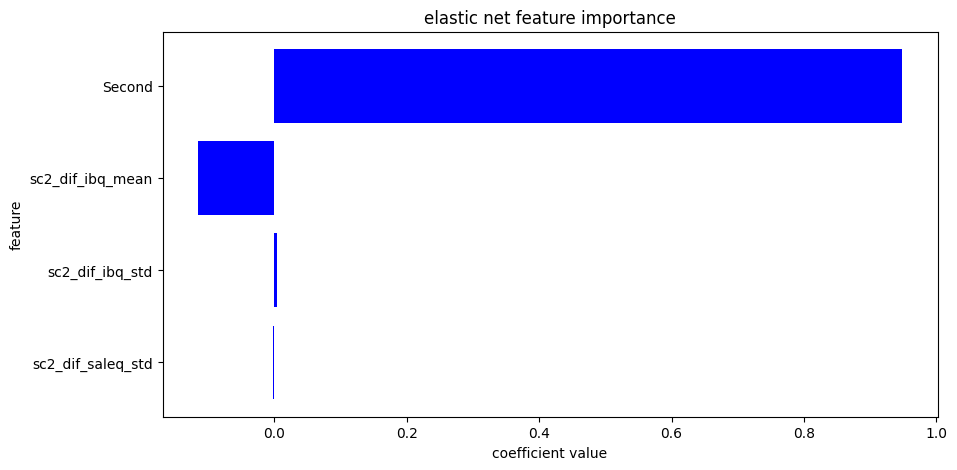

In [60]:
# to keep 'NGDP', 'Second', 'sc2_dif_ibq_mean', 'sc2_dif_ibq_std', 'sc2_dif_saleq_std'

to_retain = ['NGDP', 'Second', 'sc2_dif_ibq_mean', 'sc2_dif_ibq_std', 'sc2_dif_saleq_std','YEAR', 'QUARTER', 'YQ']

results3 = train_elastic_net_bayesian(train_acct9[to_retain].fillna(0), test_acct9[to_retain].fillna(0),w=10,h=5,test_target=filtered_gdpchg['NGDP'])

0.89188

macro variables:
Best Alpha: 0.000197
Best L1 Ratio: 0.1162
In-Sample RMSE: 1.5652
Out-of-Sample RMSE: 1.4530
1.09763


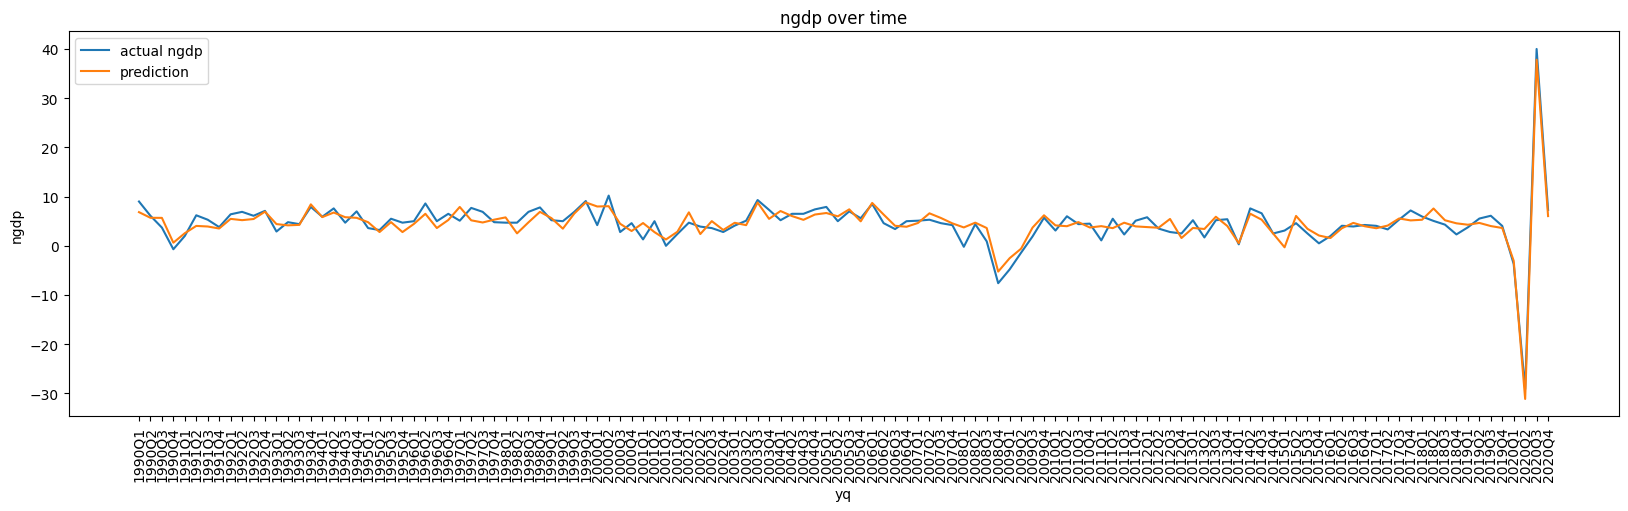

In [61]:
plot_ngdp_over_time(results3)

In [62]:
# retrieve coefficient

results3['feature_importance']

{'Second': 0.9487190858457917,
 'sc2_dif_ibq_mean': -0.11586332559405325,
 'sc2_dif_ibq_std': 0.0033706075758863615,
 'sc2_dif_saleq_std': -0.0018670348630865517}

The three selected accounting variables enhance the predictive power of the BEA second estimate by capturing real-time business performance metrics that macroeconomic and market variables alone cannot fully reflect. The fact that these variables lower RMSE even more than market-based predictors suggests that corporate financials provide more direct and immediate signals of economic activity, particularly during economic shocks like COVID-19.

**Mean Quarter-over-Quarter Change in Income Before Extraordinary Items Scaled by Sales (sc2_dif_ibq_mean)**  
This measures how much corporate earnings fluctuate from one quarter to the next, relative to sales, excluding one-time gains or losses (e.g., asset sales, write-offs). A higher value means profits are increasing more rapidly than revenue, while a lower or negative value suggests that profits are shrinking relative to sales.  

The negative coefficient suggests that when corporate profits rise faster than revenue, it may indicate cost-cutting measures rather than real business expansion. Companies often reduce hiring, cut wages, or delay investments to maintain or grow profits, which can slow overall economic growth. In downturns, firms may artificially sustain profitability by lowering expenses rather than increasing demand, leading to weaker GDP growth.  

During COVID-19, firms that maintained profits despite declining sales often did so through aggressive cost-cutting measures such as layoffs, automation, and supplier renegotiations. Since GDP decline in 2020 was largely driven by lower consumer spending and business investment, these profit boosts did not translate into a stronger economy. Instead, higher sc2_dif_ibq_mean values correlated with weaker GDP growth because firms sustained profits artificially rather than through genuine expansion.


**Standard Deviation of Quarter-over-Quarter Change in Income Before Extraordinary Items Scaled by Sales (sc2_dif_ibq_std)**  
This variable measures how volatile corporate earnings are from quarter to quarter, relative to sales, capturing the level of earnings instability. Higher values indicate greater unpredictability in corporate profitability, while lower values suggest more consistent earnings growth.  

The small positive coefficient suggests that earnings volatility is sometimes linked to stronger GDP growth, likely due to the potential for rapid rebounds. Economic disruptions, such as COVID-19, caused extreme fluctuations in corporate earnings—some industries (e.g., airlines, hospitality) saw sharp declines, while others (e.g., e-commerce, logistics) experienced surges. Companies that adapted quickly to shifting demand (e.g., digital transformation, cost restructuring) saw significant earnings fluctuations. This variable likely helped the model capture the uneven effects of economic disruptions across industries, refining GDP predictions.


**Standard Deviation of Quarter-over-Quarter Change in Sales Scaled by Sales (sc2_dif_saleq_std)**  
This captures how volatile a company’s revenue is over time, relative to its own sales, showing whether sales are stable or fluctuating significantly. A higher value means sales vary greatly from quarter to quarter, while a lower value indicates more consistent revenue.  

The negative coefficient suggests that high sales volatility is linked to weaker GDP growth, which makes sense because erratic revenue streams often reflect economic instability. When businesses face demand uncertainty—such as during COVID-19—sales become more unpredictable, which can hinder investment, hiring, and long-term economic growth. Companies with steady revenue flows can plan ahead, while those experiencing extreme fluctuations may cut costs or hold back on expansion, contributing to slower overall GDP growth.


**Before including 2020:**

**Use only Second Estimate:**

train set result:

in-sample rmse: 1.5792

out-of-sample rmse: 1.2979

**Use Second Estimate + 4 additional accounting variable:**

test set result:

in-sample rmse: 1.5535

out-of-sample rmse: 1.2320

**After including 2020:**

**Use only Second Estimate:**

train set result:

in-sample rmse: 1.5792

out-of-sample rmse: 1.5388

**Use Second Estimate + 4 additional accounting variables:**

test set result:

in-sample rmse: 1.5535

out-of-sample rmse: 1.3216

Accounting information is indeed useful for GDP growth prediction, as it enhances the model's predictive power even during economic shocks. While the BEA second estimate remains the strongest predictor, accounting-based features provide additional firm-level insights that macroeconomic indicators alone may not fully capture. These variables reflect business cycle effects, corporate adaptation strategies, and financial stability, which are particularly valuable in times of economic uncertainty. Their ability to reduce RMSE significantly, even during shocks like COVID-19, confirms their relevance in improving GDP forecasts.

---

**Model version 3**

**Model**: Elastic Net

**Variables**: 

- BEA Second Estimate
- Mean Quarter-over-Quarter Change in Income Before Extraordinary Items Scaled by Sales
- Standard Deviation of Quarter-over-Quarter Change in Income Before Extraordinary Items Scaled by Sales
- Standard Deviation of Quarter-over-Quarter Change in Sales Scaled by Sales

**Hyperparameters**: best alpha: 0.065332, best l1_ratio: 0.9988

**In-sample rmse**: 1.5535

**Out-of-sample rmse**: 1.3216

---


In [63]:
# retain only relevant variables in the dataset for later model selection

to_drop3 = list(set(train_acct9.columns) - set(to_retain))
train_acct10, test_acct10 = drop_columns(train_acct9, test_acct9, to_drop3)

,YQ,NGDP,YEAR,QUARTER,Second,sc2_dif_ibq_mean,sc2_dif_ibq_std,sc2_dif_saleq_std
0,1990Q1,9.000000,1990,1,7.008200,-0.105069,4.296213,2.465123
1,1990Q2,6.100000,1990,2,5.815300,-0.041491,2.694753,4.800675
2,1990Q3,3.700000,1990,3,5.802500,0.727016,41.846778,28.950129
3,1990Q4,-0.700000,1990,4,0.486900,0.037396,2.430168,0.455550
4,1991Q1,2.000000,1991,1,2.512800,-0.019089,0.949976,0.690914


,YQ,NGDP,YEAR,QUARTER,Second,sc2_dif_ibq_mean,sc2_dif_ibq_std,sc2_dif_saleq_std
0,2016Q1,0,2016,1,1.432400,0.414920,32.202859,3.866616
1,2016Q2,0,2016,2,3.432500,-0.373392,31.427095,4.688108
2,2016Q3,0,2016,3,4.581800,-0.354325,29.427630,1.101805
3,2016Q4,0,2016,4,3.915900,-0.302143,28.416448,23.062892
4,2017Q1,0,2017,1,3.396000,-0.787604,29.858315,5.961293


==================================================================**SUMMARY**=========================================================================

**Baseline model**

**Model**: Elastic Net

**Variables**: 

- BEA Second Estimate

**Hyperparameters**: best alpha: 0.000197, best l1_ratio: 0.1162

**In-sample rmse**: 1.5792

**Out-of-sample rmse**: 1.5388

---

**Model version 2**

**Model**: Elastic Net

**Variables**: 

- BEA Second Estimate
  
- 24-month return on value-weighted market index

- Average volatility index

- Standard deviation of disposable personal income

**Hyperparameters**: best alpha: 0.000197, best l1_ratio: 0.1162

**In-sample rmse**: 1.5652

**Out-of-sample rmse**: 1.4530

---

**Model version 3**

**Model**: Elastic Net

**Variables**: 

- BEA Second Estimate
- Mean Quarter-over-Quarter Change in Income Before Extraordinary Items Scaled by Sales
- Standard Deviation of Quarter-over-Quarter Change in Income Before Extraordinary Items Scaled by Sales
- Standard Deviation of Quarter-over-Quarter Change in Sales Scaled by Sales

**Hyperparameters**: best alpha: 0.065332, best l1_ratio: 0.9988

**In-sample rmse**: 1.5535

**Out-of-sample rmse**: 1.3216

=======================================================================================================================================================

## **5. Comparing Different Models (Ridge, Lasso, Random Forest, XGBoost, etc.)**

Now, we will use the finalized dataset, which includes **BEA Second Estimate**, **Mean Quarter-over-Quarter Change in Income Before Extraordinary Items Scaled by Sales**, **Standard Deviation of Quarter-over-Quarter Change in Income Before Extraordinary Items Scaled by Sales**, and **Standard Deviation of Quarter-over-Quarter Change in Sales Scaled by Sales**. We will compare the performance of different models on this dataset to determine the best-performing model for our final selection.

|   iter    |  target   |   alpha   |
-------------------------------------
| 1         | -8.644    | 6.965     |
| 2         | -8.529    | 2.861     |
| 3         | -7.222    | 2.269     |
| 4         | -8.65     | 5.513     |
| 5         | -8.642    | 7.195     |
| 6         | -7.224    | 2.27      |
| 7         | -5.643    | 1.636     |
| 8         | -4.033    | 0.6663    |
| 9         | -3.617    | 0.001022  |
| 10        | -3.606    | 0.1155    |
| 11        | -8.571    | 9.999     |
| 12        | -3.602    | 0.09161   |
| 13        | -3.602    | 0.09344   |
| 14        | -3.602    | 0.09403   |
| 15        | -3.608    | 0.1268    |
| 16        | -3.6      | 0.07629   |
| 17        | -3.6      | 0.07412   |
| 18        | -3.6      | 0.07373   |
| 19        | -3.6      | 0.07372   |
| 20        | -3.6      | 0.07274   |
| 21        | -3.6      | 0.07168   |
| 22        | -3.6      | 0.07222   |
| 23        | -3.6      | 0.07218   |
| 24        | -3.6      | 0.07208   |
| 25        

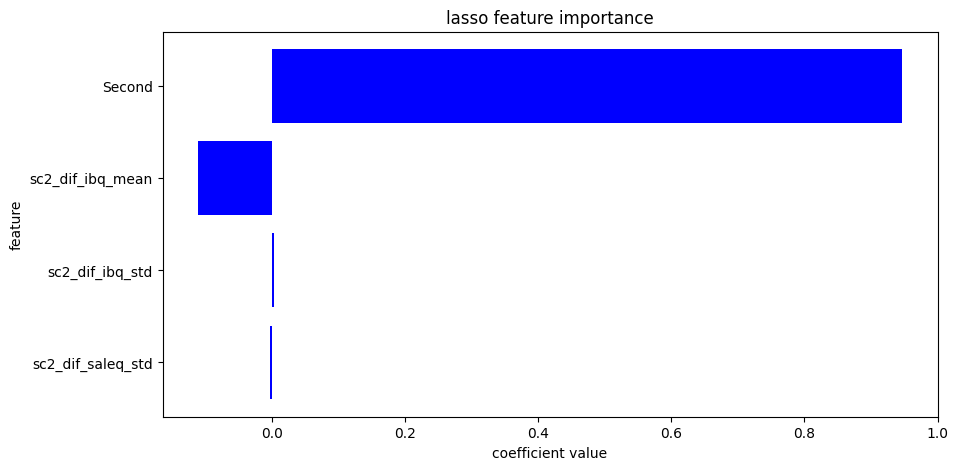

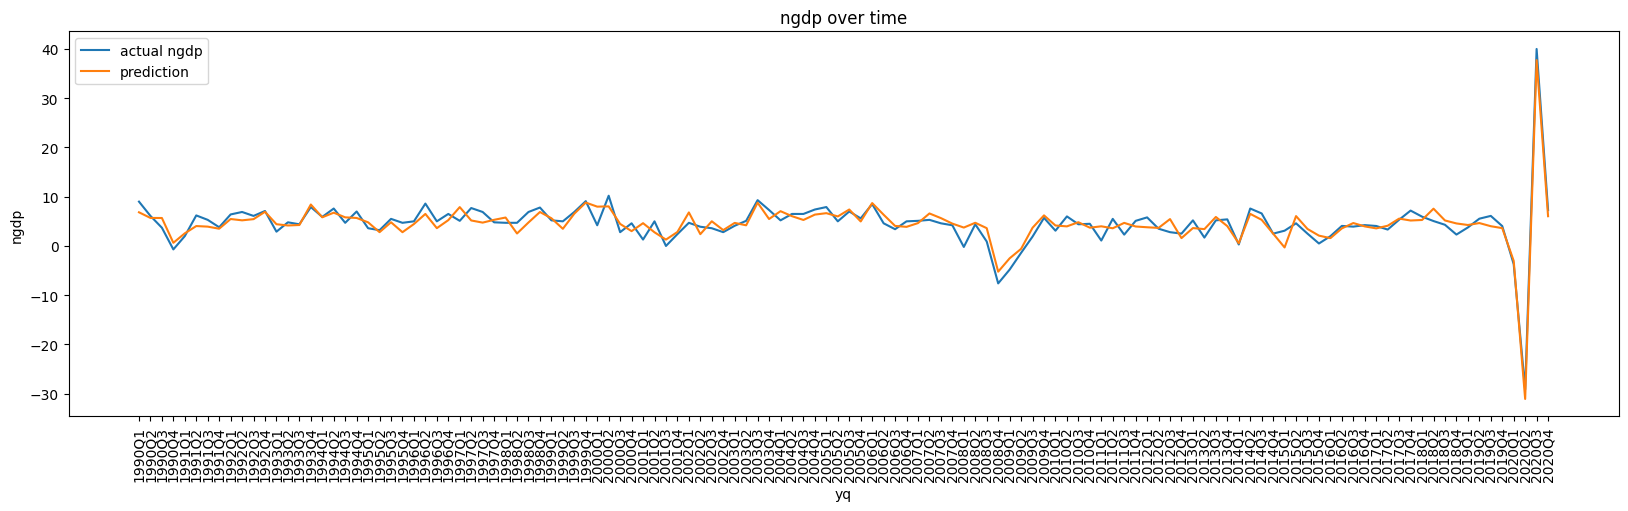

In [64]:
# LASSO 
results_lasso = train_lasso_bayesian(train_acct10, test_acct10, w=10, h=5)
plot_ngdp_over_time(results_lasso)

|   iter    |  target   |   alpha   |
-------------------------------------
| 1         | -3.604    | 6.965     |
| 2         | -3.606    | 2.861     |
| 3         | -3.608    | 2.269     |
| 4         | -3.603    | 5.513     |
| 5         | -3.604    | 7.195     |
| 6         | -3.609    | 9.999     |
| 7         | -3.604    | 4.463     |
| 8         | -3.603    | 6.041     |
| 9         | -3.603    | 5.178     |
| 10        | -3.603    | 5.738     |
| 11        | -3.603    | 5.637     |
| 12        | -3.603    | 5.638     |
| 13        | -3.603    | 5.64      |
| 14        | -3.603    | 5.641     |
| 15        | -3.603    | 5.64      |
| 16        | -3.603    | 5.641     |
| 17        | -3.603    | 5.662     |
| 18        | -3.603    | 5.621     |
| 19        | -3.603    | 5.671     |
| 20        | -3.603    | 5.618     |
| 21        | -3.603    | 5.668     |
| 22        | -3.603    | 5.618     |
| 23        | -3.603    | 5.621     |
| 24        | -3.603    | 5.667     |
| 25        

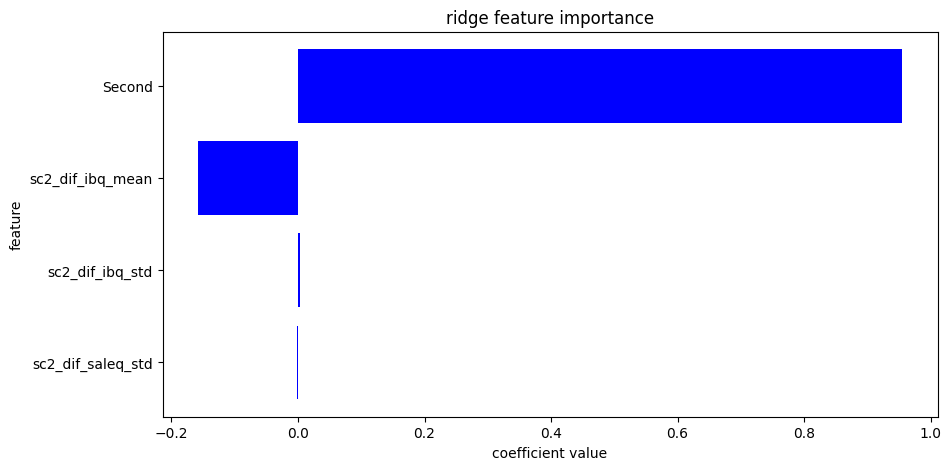

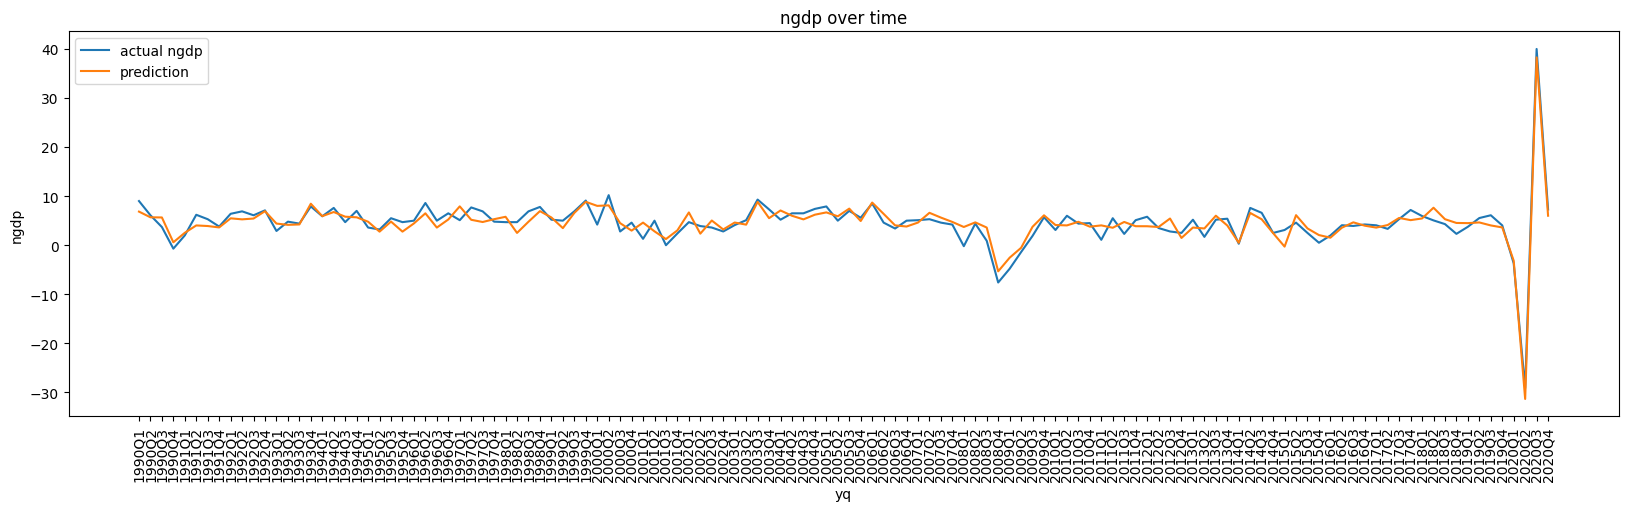

In [65]:
# RIDGE 
results_ridge = train_ridge_bayesian(train_acct10, test_acct10, w=10, h=5)
plot_ngdp_over_time(results_ridge)

|   iter    |  target   | max_fe... | n_esti... |
-------------------------------------------------
| 1         | -4.661    | 0.7268    | 178.8     |
| 2         | -5.651    | 0.3042    | 298.1     |
| 3         | -4.694    | 0.7475    | 240.4     |
| 4         | -4.448    | 0.9827    | 358.2     |
| 5         | -4.682    | 0.5328    | 226.5     |
| 6         | -4.459    | 0.9448    | 391.0     |
| 7         | -5.658    | 0.3279    | 444.9     |
| 8         | -4.44     | 0.8439    | 356.8     |
| 9         | -5.733    | 0.2509    | 122.7     |
| 10        | -5.899    | 0.1127    | 50.11     |
| 11        | -5.688    | 0.3625    | 500.0     |
| 12        | -5.709    | 0.1093    | 199.9     |
| 13        | -4.401    | 0.8995    | 160.5     |
| 14        | -5.622    | 0.1797    | 409.7     |
| 15        | -5.63     | 0.25      | 377.7     |
| 16        | -5.67     | 0.2487    | 168.9     |
| 17        | -4.392    | 0.9652    | 156.2     |
| 18        | -5.634    | 0.216     | 396.7     |


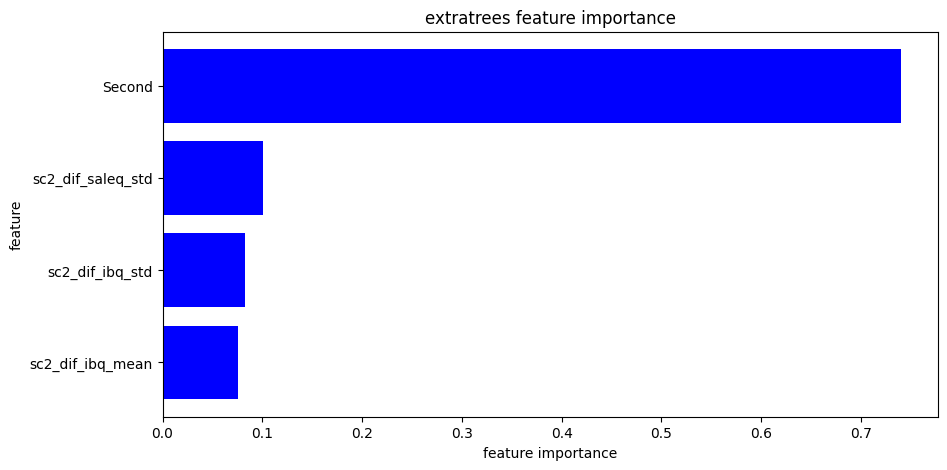

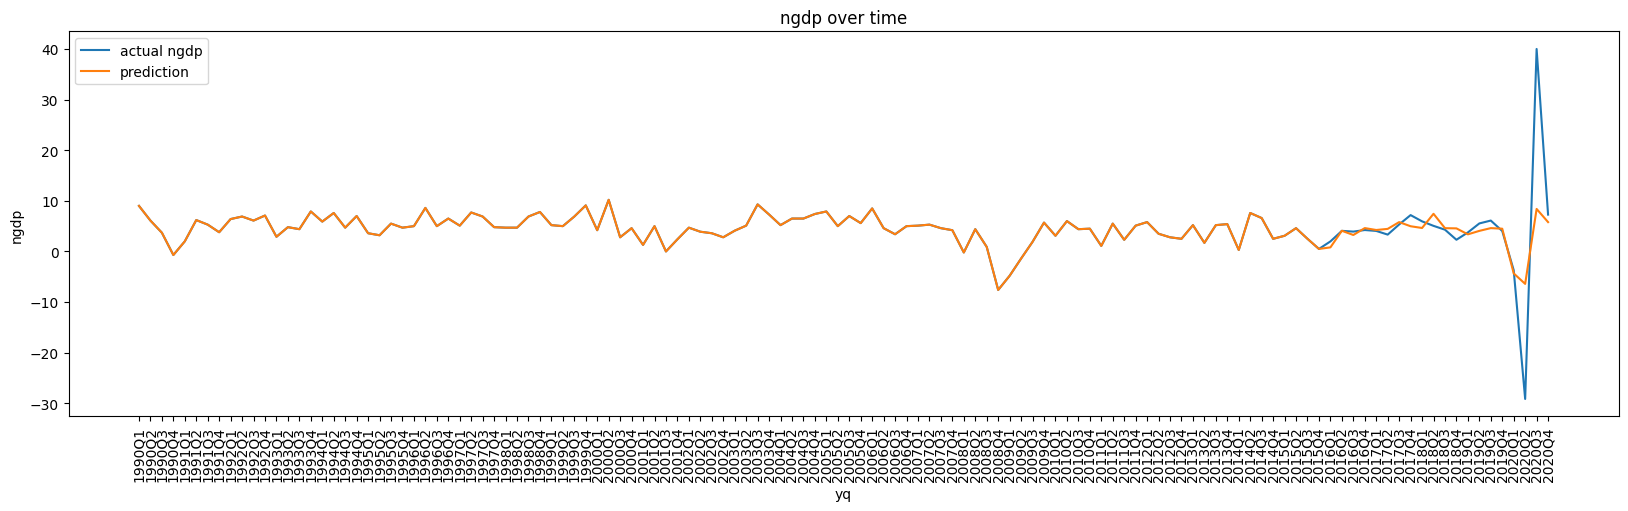

In [66]:
# ExtraTrees (A variant of random forest. It is more randomized than traditional random forest, and can fix overfitting issue more effectively.)
# Given our small train test set, it seems to be more suitable than regular random forest 

results_xtratree = train_extratrees_bayesian(train_acct10, test_acct10, w=10, h=5)
plot_ngdp_over_time(results_xtratree)

|   iter    |  target   |   alpha   | reg_la... |
-------------------------------------------------
| 1         | -8.644    | 6.965     | 2.861     |
| 2         | -8.202    | 2.269     | 5.513     |
| 3         | -8.641    | 7.195     | 4.231     |
| 4         | -8.574    | 9.808     | 6.848     |
| 5         | -8.633    | 4.809     | 3.921     |
| 6         | -6.946    | 0.8313    | 6.328     |
| 7         | -6.427    | 0.01412   | 6.785     |
| 8         | -6.996    | 0.003738  | 9.709     |
| 9         | -3.658    | 0.06414   | 0.03926   |
| 10        | -4.565    | 0.05747   | 1.755     |
| 11        | -5.657    | 1.616     | 0.01056   |
| 12        | -3.847    | 0.02348   | 0.516     |
| 13        | -3.686    | 0.004972  | 0.1439    |
| 14        | -8.644    | 5.645     | 9.976     |
| 15        | -8.572    | 9.931     | 0.113     |
| 16        | -3.658    | 0.01033   | 0.02177   |
| 17        | -3.697    | 0.204     | 0.04559   |
| 18        | -3.666    | 0.08795   | 0.05737   |


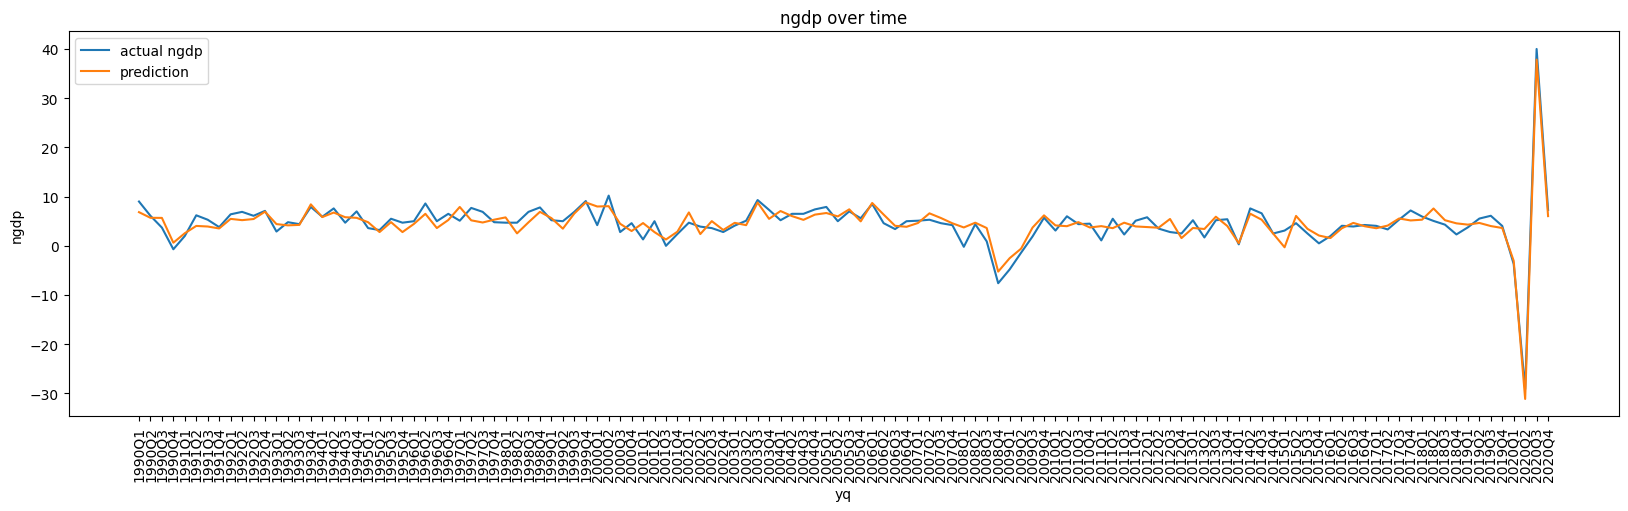

In [67]:
# XGBOOST - use XGBoost's linear booster (gblinear) instead of decision trees (gbtree)
results_boost =  train_xgboost_linear_bayesian(train_acct10, test_acct10, w=10, h=5)
plot_ngdp_over_time(results_boost)

### **Model Performance Comparison**  

| **Model**     | **Best Hyperparameters** | **In-Sample RMSE** | **Out-of-Sample RMSE** |
|--------------|-------------------------|--------------------|----------------------|
| **Lasso**     | α = **0.071459**         | **1.5538**         | **1.3232**          |
| **Ridge**     | α = **5.641146**         | **1.5523**         | **1.3158**          |
| **ExtraTrees** | n_estimators = **156**, max_features = **0.9652** | **0.0000** | **8.7835** |
| **XGBoost**   | α (L1) = **0.058533**, λ (L2) = **0.003066** | **1.5534**         | **1.3204**          |



ExtraTrees (a variant of Random Forest) performed the worst in terms of out-of-sample RMSE. The main reason lies in how traditional tree-based models work. During training, the model splits nodes based on the training samples it has seen, minimizing impurity at each leaf node. At prediction time, the model takes the average target value of the training samples that fall into each leaf and assigns it to the test sample that ends up in the same leaf.

This mechanism causes a fundamental limitation: if the range of target values in the training set is smaller than in the test set, the model's predictions will be constrained within that range. This is evident in the line plot of ExtraTrees predictions, where test period predictions never exceed the target NGDP range observed during training. While newer tree-based models have introduced methods to mitigate this issue, traditional decision trees struggle in scenarios where there is a **GDP shock in the test period that was not present in the training period**. 

In contrast, **linear models do not have this constraint**. Instead of averaging within leaf nodes, they predict based on learned coefficients, allowing them to extrapolate beyond the range observed in the training data. This is particularly crucial for capturing extreme economic shifts, such as the **COVID-19 shock** present in the test set but not in the training set.

Recognizing this limitation, we switched **XGBoost's base model from decision trees to a linear booster**, which significantly improved RMSE compared to its tree-based version. Now, we will proceed with **blending and stacking** using linear models to determine which ensemble method results in the best out-of-sample RMSE.

### **i. Simple Average Blending of 4 Linear Models (Elastic Net, Lasso, Ridge, XGBoost linear booster)**

In [68]:
# Simple Averaging

pred_enet = results3['test_prediction']
pred_lasso = results_lasso['test_prediction']
pred_ridge = results_ridge['test_prediction']
pred_xgb = results_boost['test_prediction']

blended_prediction = (pred_enet + pred_lasso + pred_ridge + pred_xgb) / 4

blended_rmse = mean_squared_error(filtered_gdpchg['NGDP'], blended_prediction, squared=False)

print(f"Blended Model RMSE: {blended_rmse:.4f}")

Blended Model RMSE: 1.3188


### **ii. Weighted Average Blending of 4 Linear Models (Elastic Net, Lasso, Ridge, XGBoost linear booster)**

In [69]:
# Assign weight according to their performance

w_enet = 0.2
w_lasso = 0.1
w_ridge = 0.4
w_xgb = 0.3

blended_prediction_weighted = (
    w_enet * pred_enet + 
    w_lasso * pred_lasso + 
    w_ridge * pred_ridge + 
    w_xgb * pred_xgb
)

blended_rmse_weighted = mean_squared_error(filtered_gdpchg['NGDP'], blended_prediction_weighted, squared=False)

print(f"Weighted Blended Model RMSE: {blended_rmse_weighted:.4f}")


Weighted Blended Model RMSE: 1.3174


### **iii. Stacking of 4 Linear Models (Elastic Net, Lasso, Ridge, XGBoost linear booster)**

In [70]:
# Define base models
base_models = [
    ('lasso', Lasso(alpha=0.071459, random_state=123, max_iter=10000)),
    ('ridge', Ridge(alpha=5.641146, random_state=123)),
    ('xgboost', XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=123))
]

# Define meta-model
meta_model = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=123, max_iter=10000)

# Create Stacking Regressor
stacking_model = StackingRegressor(estimators=base_models, final_estimator=meta_model, cv=5, n_jobs=-1)

# Train the model & make predictions
stacking_model.fit(train_acct10.drop(['YQ','YEAR','QUARTER','NGDP'],axis=1), train_acct10["NGDP"])

stacked_train_pred = stacking_model.predict(train_acct10.drop(['YQ','YEAR','QUARTER','NGDP'],axis=1))
stacked_test_pred = stacking_model.predict(test_acct10.drop(['YQ','YEAR','QUARTER','NGDP'],axis=1))

# Evaluate
train_rmse_stack = mean_squared_error(train_acct10["NGDP"], stacked_train_pred, squared=False)
test_rmse_stack = mean_squared_error(filtered_gdpchg["NGDP"], stacked_test_pred, squared=False)

print(f"Stacking Model RMSE - Train: {train_rmse_stack:.4f}")
print(f"Stacking Model RMSE - Test: {test_rmse_stack:.4f}")


Stacking Model RMSE - Train: 1.9685
Stacking Model RMSE - Test: 1.9554


### **Submission**

In [71]:
# Submit to Kaggle Competition

submission['NGDP'] = results_ridge['test_prediction']

display(submission)

submission.to_csv("submission.csv",index=False)

processing_time = time.time() - now

print(f"This project takes {processing_time/60} minutes to run.")

,YQ,NGDP
0,2016Q1,1.533800
1,2016Q2,3.565355
2,2016Q3,4.658622
3,2016Q4,3.977543
4,2017Q1,3.588729
5,2017Q2,4.111863
6,2017Q3,5.558708
7,2017Q4,5.108604
8,2018Q1,5.450381
9,2018Q2,7.637738


This project takes 4.3199433326721195 minutes to run.


## == **FINAL RANKING BASED ON TEST SET RMSE** ==

#### **1. Ridge**: 0.88674 

#### **2. Weighted Blending**: 0.88846 

#### **3. Blending**: 0.89287

#### **4. Elastic Net**: 0.89510 

#### **5. XGBoost**: 0.89682 

#### **6. Lasso**: 0.90144 

Ridge has the best performance, achieving the lowest RMSE, while Lasso has the worst. Ridge likely performs well because it applies L2 regularization, preventing excessive shrinkage of coefficients and maintaining important predictive signals. In contrast, Lasso aggressively shrinks some coefficients to zero, possibly discarding useful information, leading to worse generalization.

Elastic Net, which combines L1 (Lasso) and L2 (Ridge) penalties, balances between the two, ranking in the middle. Blending improves generalizability by averaging predictions from multiple models, outperforming Elastic Net. Weighted Blending, where Ridge has a higher weight, further improves performance, reinforcing Ridge’s robustness.

XGBoost, despite its advanced optimization, performs only slightly better than Lasso. This suggests that its additional regularization settings (L1 and L2 tuning) did not provide a significant advantage over Ridge or Elastic Net. Since XGBoost was used with a linear booster rather than decision trees, this result implies that standard linear models like Ridge already capture most of the relevant information effectively, and the additional flexibility from XGBoost’s optimization might not be necessary for this dataset. The fact that Ridge outperforms XGBoost (linear booster) suggests that regularization is more critical to performance than complex optimization techniques in this scenario. XGBoost’s ability to automatically handle feature importance and regularization might not have provided much additional benefit compared to a well-tuned Ridge regression.

Given our dataset with carefully chosen 4 variables and 104 observations, Ridge emerges as the best model, offering the strongest predictive performance while maintaining stability and interpretability.